# Machine Learning Engineer Nanodegree
## Capstone Project
# &#x1F4D1; &nbsp; P6: Sberbank Russian Housing Market

## Links and Code Library
- [Sberbank Russian Housing Market](https://www.kaggle.com/c/sberbank-russian-housing-market)
- [Model evaluation: quantifying the quality of predictions](http://scikit-learn.org/stable/modules/model_evaluation.html)

### Create the notebook style

In [7]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: honeydew;} 
a {color: #31c831; font-family: 'Roboto';} 
h1 {color: forestgreen; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;}
h4 {color: #31c831; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #ccc;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: forestgreen;}      
div.output_stderr pre {background-color: ghostwhite;}  
div.output_stderr {background-color: slategrey;}                        
</style>
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: forestgreen; background: honeydew; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>      

### Import Libraries

In [8]:
hide_code = ''
#########################################
### IMPORT LIBRARIES FOR THIS PROJECT ###
#########################################
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import scipy

import seaborn as sns
import matplotlib.pylab as plt

from random import random
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML, SVG

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import KFold, ParameterGrid, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

import keras as ks
from keras.models import Sequential, load_model, Model
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM, GlobalAveragePooling1D
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


### Create a set of functions

In [9]:
hide_code
# Fit the Regressor
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

# Plot the Neural network fitting history
def history_plot(fit_history):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(211)
    plt.plot(fit_history.history['loss'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_loss'], color='#228B22', label = 'test')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title('Loss Function');  
    
    plt.subplot(212)
    plt.plot(fit_history.history['mean_absolute_error'], color='#348ABD', label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], color='#228B22', label = 'test')
    plt.xlabel("Epochs")
    plt.ylabel("MAE")    
    plt.legend()
    plt.title('Mean Absolute Error');   

# Get values of the metrics
def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    separator1, separator2 = '<_>'*18, '-'*10
    print(separator1, '\n', regressor, '\n'+separator1)
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print(separator2)
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print(separator2)
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print(separator2)
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print(separator2)
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))
    
def scores2(regressor, target, target_predict):
    separator1, separator2 = '<_>'*18, '-'*10
    print(separator1, '\n', regressor, '\n'+separator1)
    print("EV score:", explained_variance_score(target, target_predict))
    print(separator2)
    print("R2 score:", r2_score(target, target_predict))
    print(separator2)
    print("MSE score:", mean_squared_error(target, target_predict))
    print(separator2)
    print("MAE score:", mean_absolute_error(target, target_predict))
    print(separator2)
    print("MdAE score:", median_absolute_error(target, target_predict))

## Capstone Proposal Overview 
In this [`capstone project proposal`](https://olgabelitskaya.github.io/MLE_ND_P6_PP.pdf), the goals are stated to leverage what we've learned throughout the **Nanodegree program** to author a proposal for solving a problem of our choice by applying **machine learning** algorithms and techniques. A **project proposal** encompasses seven key points:

- The project's **domain background**: the field of research where the project is derived;
- A **problem statement**: a problem being investigated for which a solution will be defined;
- The **datasets and inputs**: data or inputs being used for the problem;
- A **solution statement**: the solution proposed for the problem given;
- A **benchmark model**: some simple or historical model or result to compare the defined solution to;
- A set of **evaluation metrics**: functional representations for how the solution can be measured;
- An outline of the **project design**: how the solution will be developed and results obtained.

The full [`project report`](https://olgabelitskaya.github.io/MLE_ND_P6_PR.pdf) about results will be completed and published as well.

## Domain Background
**Housing costs** demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their budgets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about reality prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.

Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as a number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.

## Problem Statement 
Sberbank is challenging programmers to develop algorithms which use a broad spectrum of features to predict real prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

## Datasets and Inputs
The basis for the investigation is a large number of economic indicators for pricing and prices themselves (`train.csv` and `test.csv`). Macroeconomic variables are collected in a separate file for transaction dates (`macro.csv`). In addition, the detailed description of variables is provided (`data_dictionary.txt`).

For practical reasons, I have not analyzed all the data and have chosen the following independent
variables:
1. the dollar rate, which traditionally affects the Russian real estate market;
2. the distance in km from the Kremlin (the closer to the center of the city, the more expensive);
3. indicators characterizing the availability of urban infrastructure nearby (schools, medical and sports centers, supermarkets, etc.) ;
4. indicators of a particular living space (number of rooms, floor, etc.);
5. proximity to transport nodes (for example, to the metro);
6. indicators of population density and employment in the region of housing accommodation.

All these economic indicators have a strong influence on price formation and can be used as a basic set for regression analysis. Examples of **numerical variables**: the distance to the metro, the distance to the school, the dollar rate at the transaction moment, the area of the living space. Examples of **categorical variables**: neighborhoods, the nearest metro station, the number of rooms.

The goal of the project is to predict the price of housing using the chosen set of numerical and categorical variables. The predicted target is not discrete, for the training set all the values of this dependent variable are given, and therefore it is necessary to apply the regression algorithms of supervised learning.

### Data Description (data_dictionary.txt)

In [4]:
hide_code
# Display the description file
HTML('''<div id="data">
<p><iframe src="data_dictionary.txt" frameborder="3" height="300" width="99%"></iframe></p>
</div>''')

### Load and Display the Data

In [19]:
hide_code
# Load the dataset
macro = pd.read_csv('macro.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
hide_code
# Display the data tables
macro[100:110].T[1:15]

100        101        102        103        104  \
oil_urals                 82.87      82.87      82.87      82.87      82.87   
gdp_quart                9995.8     9995.8     9995.8     9995.8     9995.8   
gdp_quart_growth            4.1        4.1        4.1        4.1        4.1   
cpi                       319.8      319.8      319.8      319.8      319.8   
ppi                       350.2      350.2      350.2      350.2      350.2   
gdp_deflator                NaN        NaN        NaN        NaN        NaN   
balance_trade            16.604     16.604     16.604     16.604     16.604   
balance_trade_growth       14.1       14.1       14.1       14.1       14.1   
usdrub                  29.1525    29.0261       29.1    28.9194    29.0239   
eurrub                  39.2564    39.4051    39.5008    39.5233    39.3691   
brent                     84.83      84.77      84.72      86.15      87.17   
net_capital_export          NaN        NaN        NaN        NaN        NaN   
gdp_annual              38807.2    38807.2    38807.2    38807.2    38807.2   
gdp_annual_growth    -0.0782086 -0.0782086 -0.0782086 -0.0782086 -0.0782086   

                            105        106        107        108        109  
oil_urals                 82.87      82.87      82.87      82.87      82.87  
gdp_quart                9995.8     9995.8     9995.8     9995.8     9995.8  
gdp_quart_growth            4.1        4.1        4.1        4.1        4.1  
cpi                       319.8      319.8      319.8      319.8      319.8  
ppi                       350.2      350.2      350.2      350.2      350.2  
gdp_deflator                NaN        NaN        NaN        NaN        NaN  
balance_trade            16.604     16.604     16.604     16.604     16.604  
balance_trade_growth       14.1       14.1       14.1       14.1       14.1  
usdrub                   29.092     29.092     29.092    29.1835    29.1398  
eurrub                  39.2524    39.2524    39.2524    39.3214    39.1532  
brent                     85.99      85.99      85.99      84.23       84.8  
net_capital_export          NaN        NaN        NaN        NaN        NaN  
gdp_annual              38807.2    38807.2    38807.2    38807.2    38807.2  
gdp_annual_growth    -0.0782086 -0.0782086 -0.0782086 -0.0782086 -0.0782086

In [21]:
hide_code
# Display the data tables
train[200:208].T[1:15]

200             201         202             203  \
timestamp       2011-10-25      2011-10-25  2011-10-25      2011-10-25   
full_sq                 38              33          30              76   
life_sq                 19              14          18              51   
floor                   15               8           3               2   
max_floor              NaN             NaN         NaN             NaN   
material               NaN             NaN         NaN             NaN   
build_year             NaN             NaN         NaN             NaN   
num_room               NaN             NaN         NaN             NaN   
kitch_sq               NaN             NaN         NaN             NaN   
state                  NaN             NaN         NaN             NaN   
product_type    Investment      Investment  Investment      Investment   
sub_area      Horoshevskoe  Juzhnoe Butovo     Marfino  Juzhnoportovoe   
area_m         8.56843e+06     2.61551e+07  2.1044e+06     4.57959e+06   
raion_popul          56535          178264       26943           71715   

                               204          205          206  \
timestamp               2011-10-26   2011-10-26   2011-10-26   
full_sq                         44           35           72   
life_sq                         29           21           45   
floor                            8            5           10   
max_floor                      NaN          NaN          NaN   
material                       NaN          NaN          NaN   
build_year                     NaN          NaN          NaN   
num_room                       NaN          NaN          NaN   
kitch_sq                       NaN          NaN          NaN   
state                          NaN          NaN          NaN   
product_type            Investment   Investment   Investment   
sub_area      Vostochnoe Izmajlovo    Lefortovo   Krylatskoe   
area_m                     3.8e+06  8.99364e+06  1.21645e+07   
raion_popul                  76308        89971        78507   

                             207  
timestamp             2011-10-26  
full_sq                       32  
life_sq                       18  
floor                          6  
max_floor                    NaN  
material                     NaN  
build_year                   NaN  
num_room                     NaN  
kitch_sq                     NaN  
state                        NaN  
product_type          Investment  
sub_area      Chertanovo Juzhnoe  
area_m               9.28244e+06  
raion_popul               143661

## Solution Statement
### Selection of Features

In [22]:
hide_code
# Create lists of the features
X_list_num = ['timestamp',
              'full_sq', 'num_room', 'area_m', 
              'kremlin_km', 'big_road2_km', 'big_road1_km',
              'workplaces_km',
              'stadium_km', 'swim_pool_km', 'fitness_km', 
              'detention_facility_km', 'cemetery_km',
              'radiation_km', 'oil_chemistry_km',
              'theater_km', 'exhibition_km', 'museum_km', 
              'park_km', 'public_healthcare_km',  
              'metro_min_walk','metro_km_avto', 
              'bus_terminal_avto_km', 'public_transport_station_min_walk',
              'railroad_station_walk_min', 'railroad_station_avto_km',
              'kindergarten_km', 'school_km', 'preschool_km',
              'university_km', 'additional_education_km',
              'shopping_centers_km', 'big_market_km',
              'ekder_all', 'work_all', 'young_all']

X_list_cat = ['sub_area', 'ID_metro', 
              'office_raion', 'sport_objects_raion',
              'raion_popul', 'healthcare_centers_raion',
              'school_education_centers_raion', 
              'preschool_education_centers_raion']

target_train = train['price_doc']

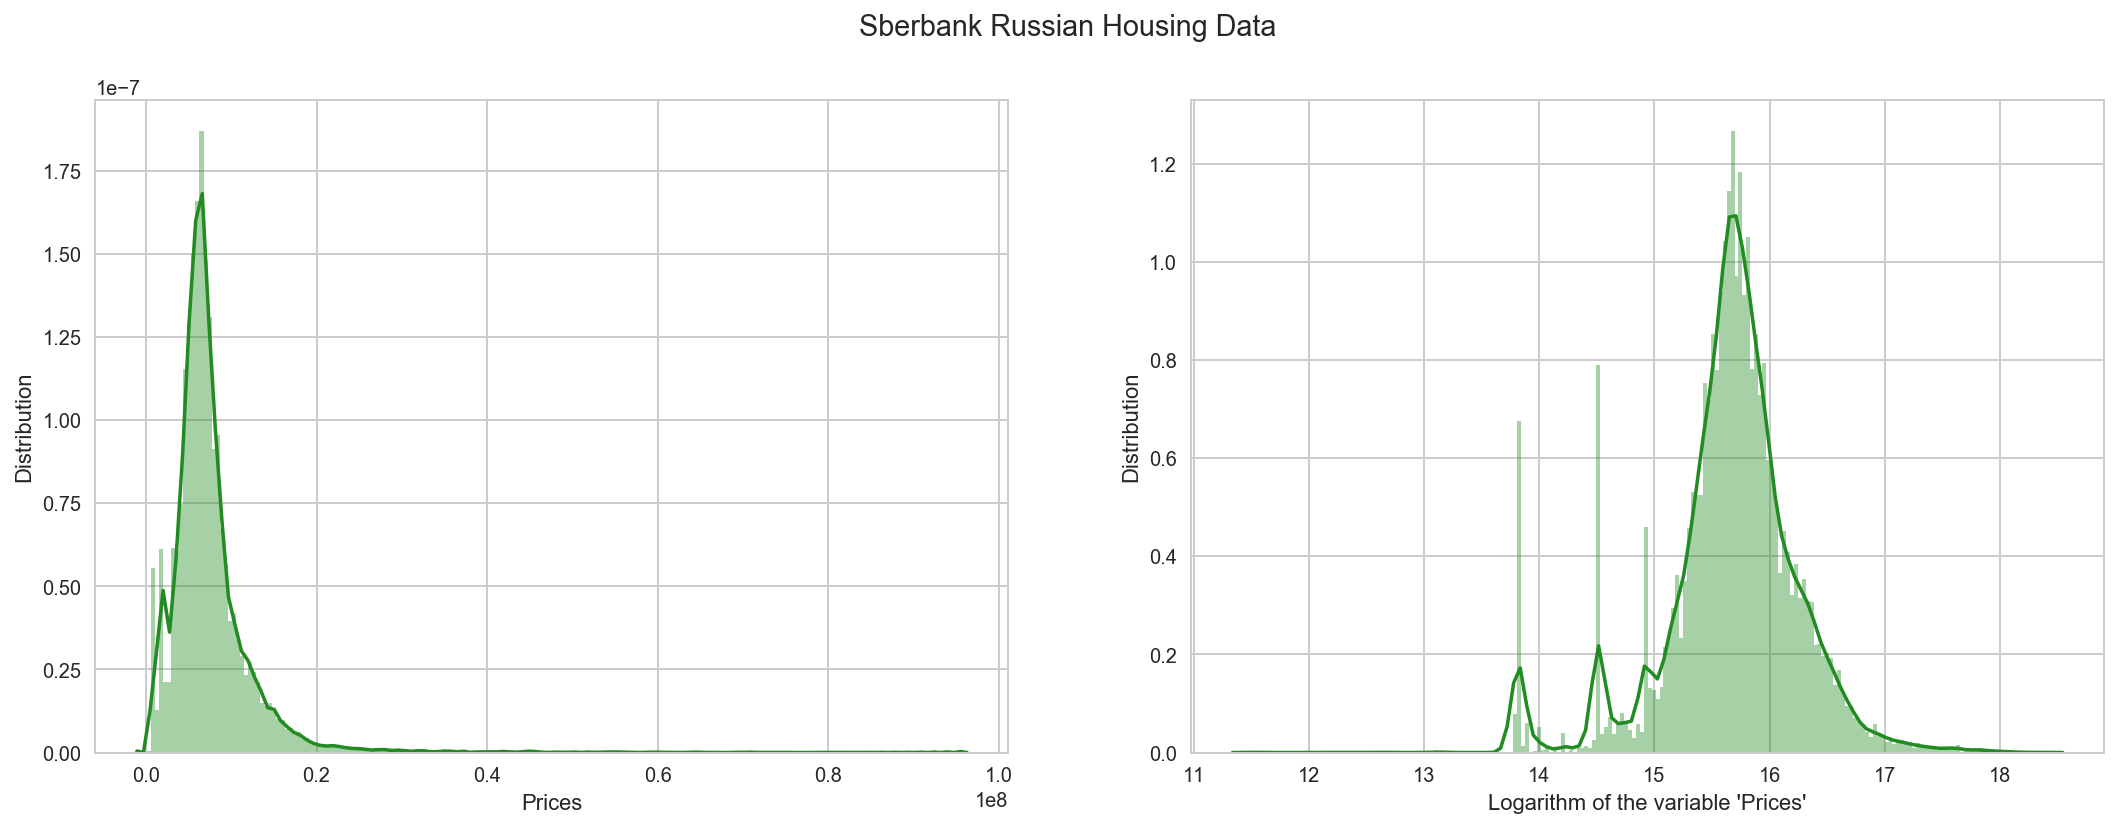

In [53]:
hide_code
# Create the distribution plot for the target
plt.style.use('seaborn-whitegrid')
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.distplot(target_train, bins=200, color='#228B22', ax=ax1)
ax1.set_xlabel("Prices")
ax1.set_ylabel("Distribution")

sns.distplot(np.log(target_train), bins=200, color='#228B22', ax=ax2)
ax2.set_xlabel("Logarithm of the variable 'Prices'")
ax2.set_ylabel("Distribution")

plt.suptitle('Sberbank Russian Housing Data');

In [24]:
hide_code
# Create the table of descriptive statistics
print ("Sberbank Russian Housing Dataset Statistics: \n")
print ("Number of houses = ", len(target_train))
print ("Number of features = ", len(list(train[X_list_num+X_list_cat].keys())))
print ("Minimum house price = ", np.min(target_train))
print ("Maximum house price = ", np.max(target_train))
print ("Mean house price = ", "%.2f" % np.mean(target_train))
print ("Median house price = ", "%.2f" % np.median(target_train))
print ("Standard deviation of house prices =", "%.2f" % np.std(target_train))

Sberbank Russian Housing Dataset Statistics: 

Number of houses =  30471
Number of features =  44
Minimum house price =  100000
Maximum house price =  111111112
Mean house price =  7123035.28
Median house price =  6274411.00
Standard deviation of house prices = 4780032.89


### Fill in Missing Values

In [25]:
hide_code
# Find out the number of missing values
train[X_list_num].isnull().sum()

timestamp                               0
full_sq                                 0
num_room                             9572
area_m                                  0
kremlin_km                              0
big_road2_km                            0
big_road1_km                            0
workplaces_km                           0
stadium_km                              0
swim_pool_km                            0
fitness_km                              0
detention_facility_km                   0
cemetery_km                             0
radiation_km                            0
oil_chemistry_km                        0
theater_km                              0
exhibition_km                           0
museum_km                               0
park_km                                 0
public_healthcare_km                    0
metro_min_walk                         25
metro_km_avto                           0
bus_terminal_avto_km                    0
public_transport_station_min_walk 

In [26]:
hide_code
# Find out the number of missing values
test[X_list_num].isnull().sum()

timestamp                             0
full_sq                               0
num_room                              0
area_m                                0
kremlin_km                            0
big_road2_km                          0
big_road1_km                          0
workplaces_km                         0
stadium_km                            0
swim_pool_km                          0
fitness_km                            0
detention_facility_km                 0
cemetery_km                           0
radiation_km                          0
oil_chemistry_km                      0
theater_km                            0
exhibition_km                         0
museum_km                             0
park_km                               0
public_healthcare_km                  0
metro_min_walk                       34
metro_km_avto                         0
bus_terminal_avto_km                  0
public_transport_station_min_walk     0
railroad_station_walk_min            34


In [27]:
hide_code
# Create dataframes for sets of features
df_train = pd.DataFrame(train, columns=X_list_num)
df_train_cat = pd.DataFrame(train, columns=X_list_num+X_list_cat)

df_test = pd.DataFrame(test, columns=X_list_num)
df_test_cat = pd.DataFrame(test, columns=X_list_num+X_list_cat)

df_train['prices'] = target_train
df_train_cat['prices'] = target_train

# Delete rows with a lot of missing values
df_train = df_train.dropna(subset=['num_room'])
df_train_cat = df_train_cat.dropna(subset=['num_room'])

# Fill in missing values by interpolation
df_train['metro_min_walk'] = \
df_train['metro_min_walk'].interpolate(method='linear')
df_train_cat['metro_min_walk'] = \
df_train_cat['metro_min_walk'].interpolate(method='linear')

df_train['railroad_station_walk_min'] = \
df_train['railroad_station_walk_min'].interpolate(method='linear')
df_train_cat['railroad_station_walk_min'] = \
df_train_cat['railroad_station_walk_min'].interpolate(method='linear')

df_test['metro_min_walk'] = \
df_test['metro_min_walk'].interpolate(method='linear')
df_test_cat['metro_min_walk'] = \
df_test_cat['metro_min_walk'].interpolate(method='linear')

df_test['railroad_station_walk_min'] = \
df_test['railroad_station_walk_min'].interpolate(method='linear')
df_test_cat['railroad_station_walk_min'] = \
df_test_cat['railroad_station_walk_min'].interpolate(method='linear')

# Display the number of rows in the final training set
len(df_train)

20899

### Categorical and Macro Features
#### Add the Macro Feature

In [28]:
hide_code
# Create a dictionary 'Date => Currency rate'
usdrub_pairs = dict(zip(list(macro['timestamp']), list(macro['usdrub'])))
# salary_pairs = dict(zip(list(macro['timestamp']), list(macro['salary'])))

# Replace the data by currency rates in the training and testing sets
df_train['timestamp'].replace(usdrub_pairs,inplace=True)
df_train_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_test['timestamp'].replace(usdrub_pairs,inplace=True)
df_test_cat['timestamp'].replace(usdrub_pairs,inplace=True)

df_train.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_train_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

df_test.rename(columns={'timestamp' : 'usdrub'}, inplace=True)
df_test_cat.rename(columns={'timestamp' : 'usdrub'}, inplace=True)

#### Preprocess Categorical Features

In [29]:
hide_code
# Display categorical features
separator = '<_>'*38
for df in [df_train_cat, df_test_cat]:
    print ('\n', separator)
    
    print('\nsub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))


 <_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub area
Number of categories: 146
{'Sviblovo', 'Juzhnoportovoe', 'Staroe Krjukovo', 'Poselenie Klenovskoe', 'Ochakovo-Matveevskoe', 'Rostokino', "Sokol'niki", 'Dorogomilovo', 'Savelovskoe', 'Kurkino', 'Dmitrovskoe', 'Gagarinskoe', 'Butyrskoe', 'Filevskij Park', 'Severnoe Izmajlovo', 'Losinoostrovskoe', 'Poselenie Shhapovskoe', 'Pechatniki', 'Kosino-Uhtomskoe', 'Troickij okrug', 'Poselenie Voskresenskoe', 'Poselenie Desjonovskoe', "Mar'ino", 'Mozhajskoe', 'Bibirevo', 'Kapotnja', 'Ajeroport', 'Chertanovo Juzhnoe', 'Matushkino', 'Perovo', 'Novokosino', 'Nekrasovka', 'Poselenie Moskovskij', 'Poselenie Rogovskoe', 'Chertanovo Severnoe', 'Severnoe Medvedkovo', 'Solncevo', 'Ivanovskoe', 'Juzhnoe Medvedkovo', "Moskvorech'e-Saburovo", 'Levoberezhnoe', 'Poselenie Voronovskoe', 'Poselenie Kievskij', 'Severnoe Butovo', 'Alekseevskoe', 'Timirjazevskoe', 'Nagatino-Sadovniki', 'Nizhe

In [30]:
# Find the missing category in the testing set
hide_code
for feature in X_list_cat:
    for element in list(set(df_test_cat[feature])):
        if element not in list(set(df_train_cat[feature])): 
            print (feature, element)

ID_metro 224


In [31]:
hide_code
# Replace categorical values of'ID_metro' by discrete numbers 
ID_metro_cat = pd.factorize(df_train_cat['ID_metro'])
df_train_cat['ID_metro'] = ID_metro_cat[0]

ID_metro_pairs = dict(zip(list(ID_metro_cat[1]), list(set(ID_metro_cat[0]))))
ID_metro_pairs[224] = 219

df_test_cat['ID_metro'].replace(ID_metro_pairs,inplace=True)

In [32]:
hide_code
# Replace categorical values of other categorical features by discrete numbers
for feature in X_list_cat:
    if feature !='ID_metro':
        feature_cat = pd.factorize(df_train_cat[feature])
        df_train_cat[feature] = feature_cat[0]
        feature_pairs = dict(zip(list(feature_cat[1]), list(set(feature_cat[0]))))
        df_test_cat[feature].replace(feature_pairs,inplace=True)

In [33]:
hide_code
# Display the result of preprocessing for categorical features 
for df in [df_train_cat, df_test_cat]:
    print ('\n', separator)
    
    print('\nsub area')
    print('Number of categories:', len(set(df['sub_area'])))
    print(set(df['sub_area']))

    print('\nID metro')
    print('Number of categories:', len(set(df['ID_metro'])))
    print(set(df['ID_metro']))

    print('\noffice raion')
    print('Number of categories:', len(set(df['office_raion'])))
    print(set(df['office_raion']))

    print('\nsport objects raion')
    print('Number of categories:', len(set(df['sport_objects_raion'])))
    print(set(df_train_cat['sport_objects_raion']))

    print('\nraion popul')
    print('Number of categories:', len(set(df['raion_popul'])))
    print(set(df['raion_popul']))

    print('\nhealthcare centers raion')
    print('Number of categories:', len(set(df_train_cat['healthcare_centers_raion'])))
    print(set(df['healthcare_centers_raion']))

    print('\nschool education centers raion')
    print('Number of categories:', len(set(df['school_education_centers_raion'])))
    print(set(df['school_education_centers_raion']))

    print('\npreschool education centers raion')
    print('Number of categories:', len(set(df['preschool_education_centers_raion'])))
    print(set(df['preschool_education_centers_raion']))


 <_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub area
Number of categories: 146
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145}

ID metro
Number of categories: 219
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,

In [34]:
hide_code
# Apply one hot encoding for the training set
df_train_cat1 = df_train_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_train_cat[[column]])
    transform = encode.transform(df_train_cat[[column]])
    
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_train_cat[column].value_counts().index])
    transform = transform.set_index(df_train_cat.index.values)
    
    df_train_cat1 = pd.concat([df_train_cat1, transform], axis=1)
    df_train_cat1 = df_train_cat1.drop(column, 1)

In [35]:
hide_code
# Apply one hot encoding for the testing set
df_test_cat1 = df_test_cat
encode = OneHotEncoder(sparse=False)

for column in X_list_cat:
    encode.fit(df_test_cat[[column]])
    transform = encode.transform(df_test_cat[[column]])
    
    transform = pd.DataFrame(transform, 
                             columns=[(column+"_"+str(i)) for i in df_test_cat[column].value_counts().index])
    transform = transform.set_index(df_test_cat.index.values)
    
    df_test_cat1 = pd.concat([df_test_cat1, transform], axis=1)
    df_test_cat1 = df_test_cat1.drop(column, 1)

#### Check Encoding

In [36]:
hide_code
# Display the example of encoded values
df_train_cat1.iloc[:, 623:636][:3].as_matrix()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [37]:
hide_code
# Check these values without one hot encoding
df_train_cat['preschool_education_centers_raion'][:3]

7672    0
8056    1
8111    2
Name: preschool_education_centers_raion, dtype: int64

#### Add Missing Columns with Zero Values

In [39]:
hide_code
# Display the number of features in the training and testing datasets
print('Shape of the train data frame:', df_train_cat1.shape)
print('Shape of the test data frame:', df_test_cat1.shape)

Shape of the train data frame: (20899, 636)
Shape of the test data frame: (7662, 626)


In [40]:
hide_code
print("Features in the train data, but not in the test data:")
for element in list(df_train_cat1):
    if element not in list(df_test_cat1):
        print(element)

Features in the train data, but not in the test data:
prices
sub_area_136
ID_metro_188
ID_metro_205
ID_metro_216
ID_metro_214
ID_metro_183
ID_metro_179
ID_metro_153
ID_metro_217
raion_popul_136


In [41]:
hide_code
print("Features in the test data, but not in the train data:")
for element in list(df_test_cat1):
    if element not in list(df_train_cat1):
        print(element)

Features in the test data, but not in the train data:
ID_metro_219


In [42]:
hide_code
# Fill in by zeros the missing columns in the training and testing datasets
for column in ['sub_area_136',' ID_metro_188', 'ID_metro_205', 'ID_metro_216', 'ID_metro_214',
              'ID_metro_183',' ID_metro_179', 'ID_metro_153', 'ID_metro_217', 'raion_popul_136']:
    df_test_cat1[column] = 0
    
df_train_cat1['ID_metro_219'] = 0

print('Columns with zero values were added.\n')
print('Shape of the train data frame:', df_train_cat1.shape)
print('Shape of the test data frame:', df_test_cat1.shape)

Columns with zero values were added.

Shape of the train data frame: (20899, 637)
Shape of the test data frame: (7662, 636)


### Display Correlation

In [43]:
hide_code
# Display the feature correlation with the target
pearson = df_train.corr(method='pearson')
corr_with_prices = pearson.ix[-1][:-1]
corr_with_prices[abs(corr_with_prices).argsort()[::-1]]

full_sq                              0.593829
num_room                             0.476337
kremlin_km                          -0.290126
stadium_km                          -0.238431
detention_facility_km               -0.233395
university_km                       -0.222964
theater_km                          -0.222873
workplaces_km                       -0.220889
swim_pool_km                        -0.220480
exhibition_km                       -0.212144
radiation_km                        -0.208256
museum_km                           -0.203846
park_km                             -0.201636
metro_min_walk                      -0.200058
fitness_km                          -0.197702
metro_km_avto                       -0.194751
shopping_centers_km                 -0.182459
public_healthcare_km                -0.182388
big_road2_km                        -0.178865
bus_terminal_avto_km                -0.176601
ekder_all                            0.169331
area_m                            

In [44]:
hide_code
# Display the most correlated features
features_list2 = corr_with_prices[abs(corr_with_prices).argsort()[::-1]][:10].index.values.tolist()
print('The most correlated with prices:\n', features_list2)

The most correlated with prices:
 ['full_sq', 'num_room', 'kremlin_km', 'stadium_km', 'detention_facility_km', 'university_km', 'theater_km', 'workplaces_km', 'swim_pool_km', 'exhibition_km']


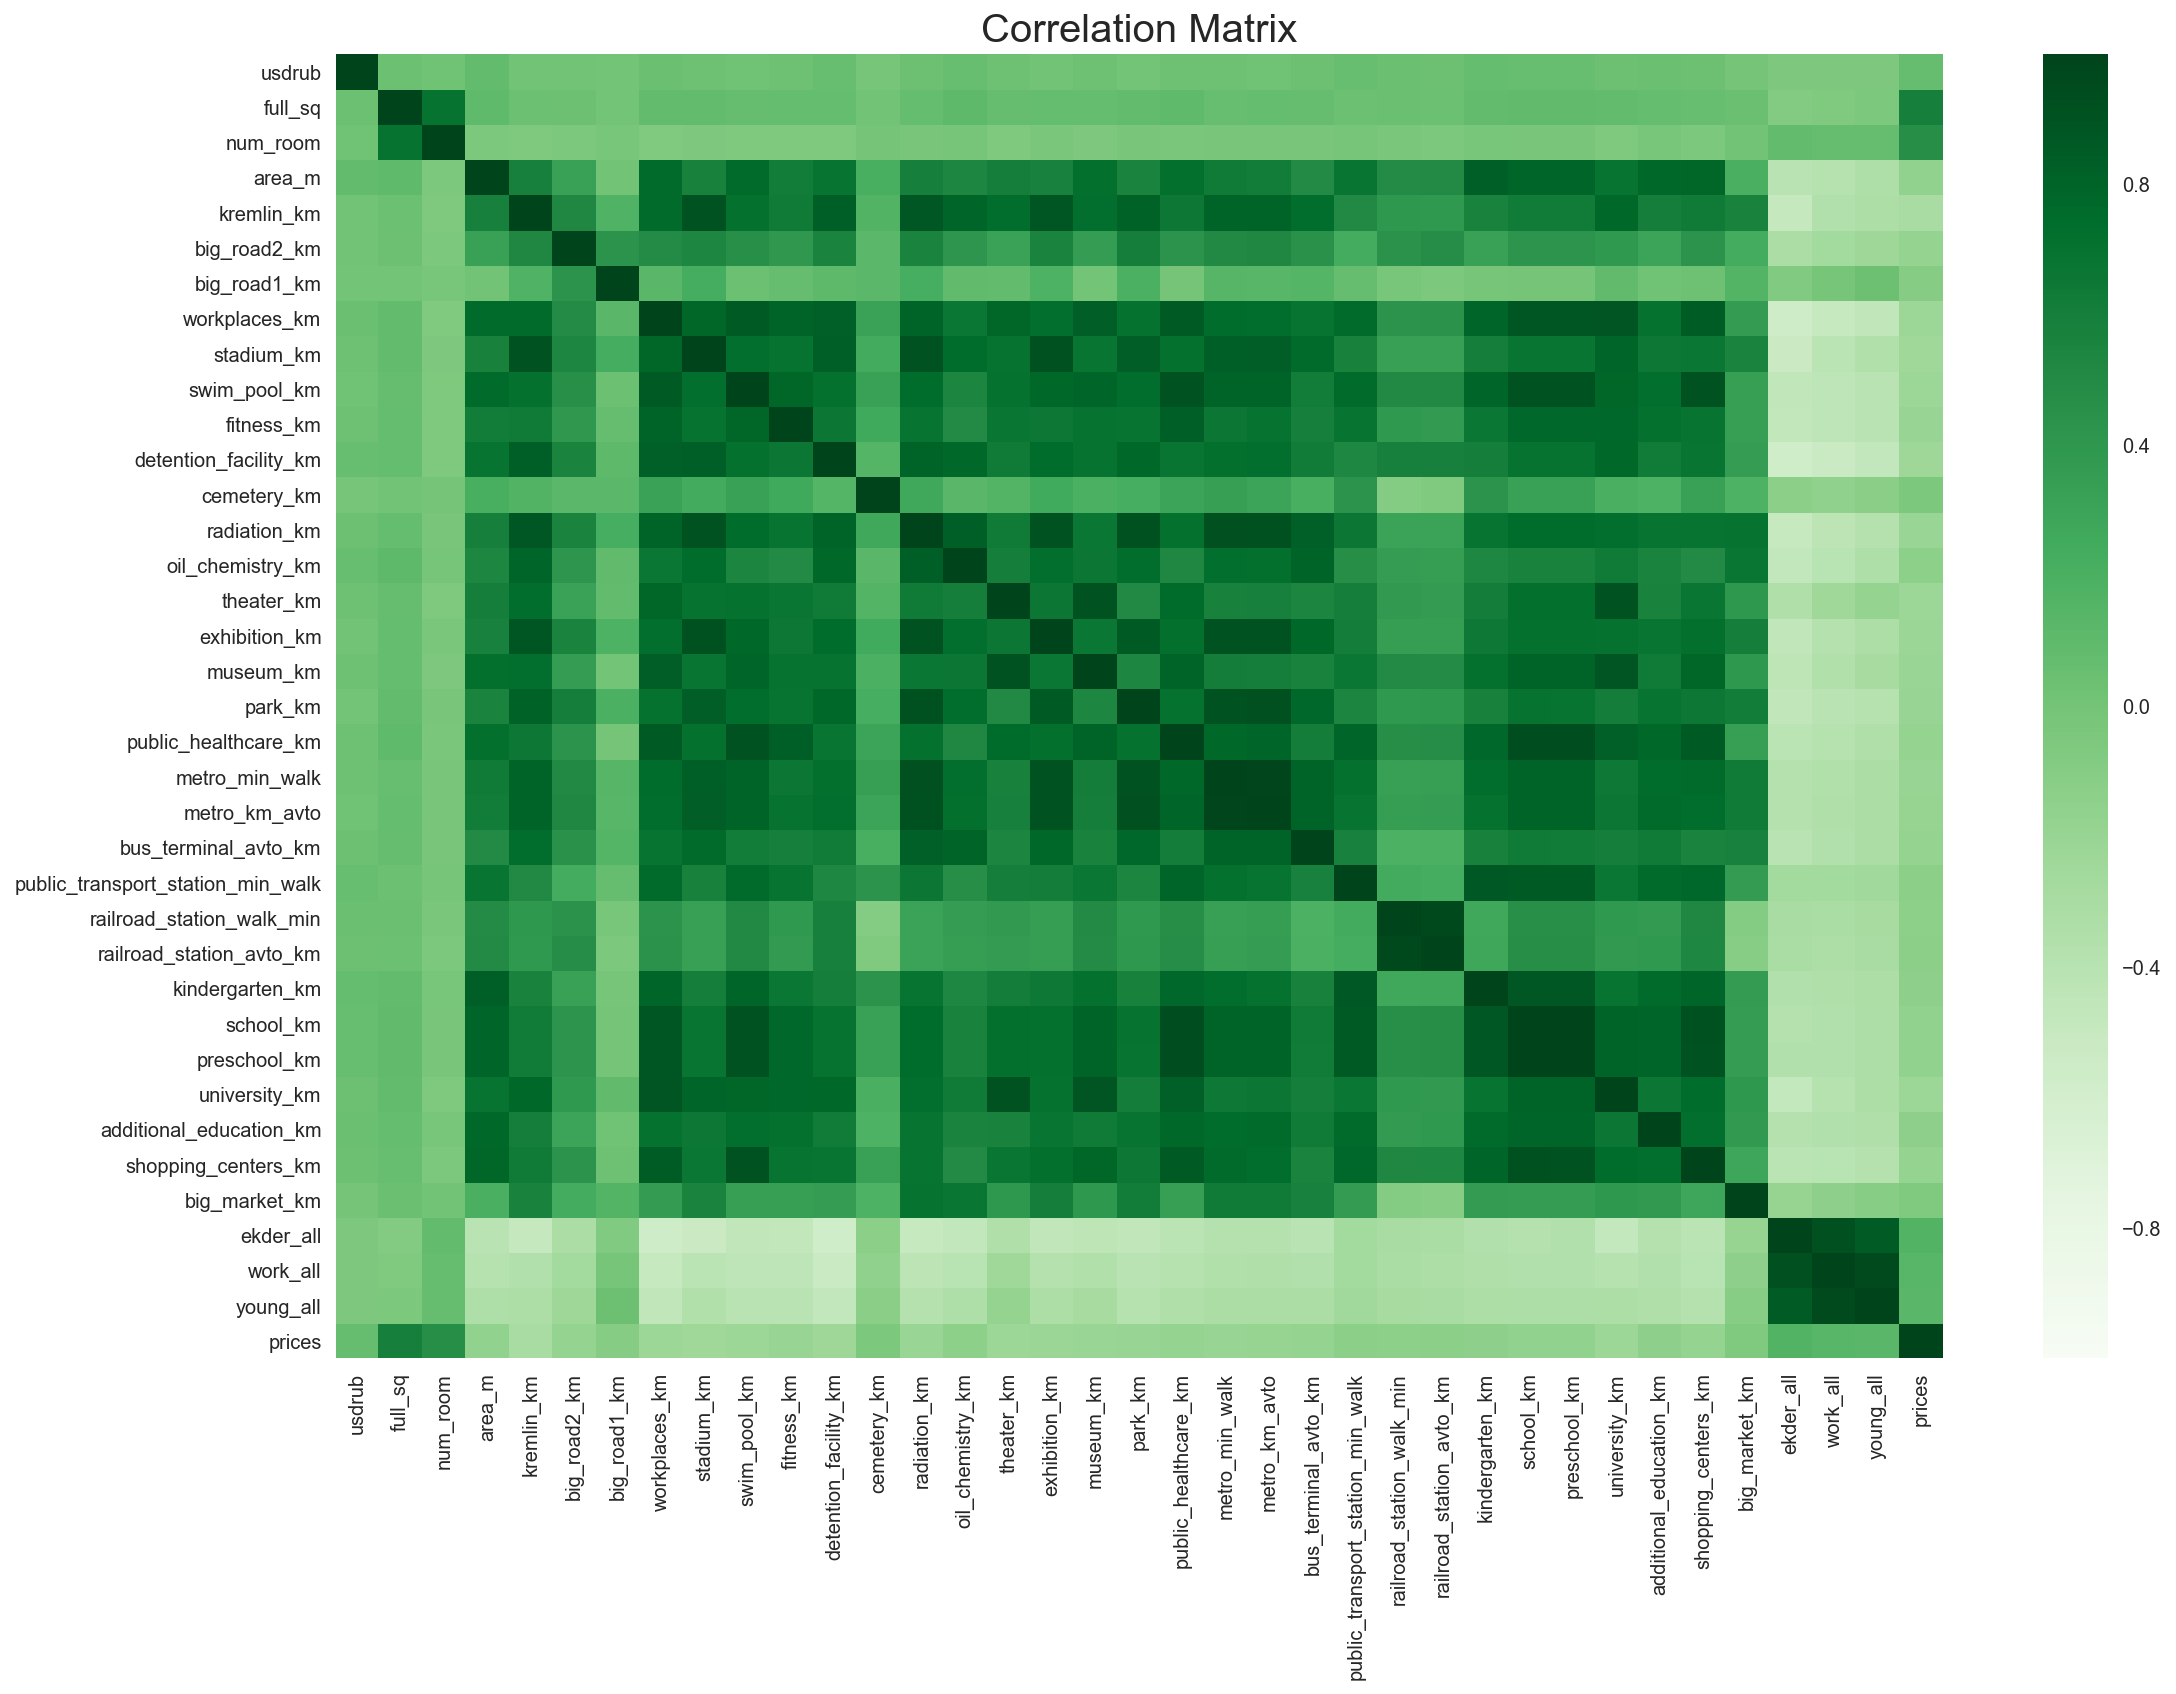

In [46]:
hide_code
# Display the correlation matrix of features
plt.figure(figsize=(18, 12))
train_corr = df_train.corr()
sns.heatmap(train_corr, cmap=plt.cm.Greens,
            xticklabels=train_corr.columns.values,
            yticklabels=train_corr.columns.values)
plt.title("Correlation Matrix", fontsize=20);

### Scale, Shuffle and Split the Data

In [47]:
hide_code
# Create the feature and target arrays 
target_train = df_train['prices'].as_matrix()

features_train = df_train.drop('prices', 1).as_matrix()
features_test = df_test.as_matrix()

features_train_cat = df_train_cat.drop('prices', 1).as_matrix()
features_test_cat = df_test_cat.as_matrix()

features_train_cat_enc = df_train_cat1.drop('prices', 1).as_matrix()
features_test_cat_enc = df_test_cat1.as_matrix()

In [48]:
hide_code
# Split the data
print(separator, '\n\nNumeric Features')
X_train, X_test, y_train, y_test = \
train_test_split(features_train, target_train, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric Features


((16719, 36), (4180, 36))

In [49]:
hide_code
# Split the data
print(separator, '\n\nNumeric and Categorical Features')
X_train_cat, X_test_cat, y_train_cat, y_test_cat = \
train_test_split(features_train_cat, target_train, test_size = 0.2, random_state = 1)
X_train_cat.shape, X_test_cat.shape

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Categorical Features


((16719, 44), (4180, 44))

In [50]:
hide_code
# Split the data
print(separator, '\n\nNumeric and Encoded Categorical Features')
X_train_cat_enc, X_test_cat_enc, y_train_cat_enc, y_test_cat_enc = \
train_test_split(features_train_cat_enc, target_train, test_size = 0.2, random_state = 1)
X_train_cat_enc.shape, X_test_cat_enc.shape

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Encoded Categorical Features


((16719, 636), (4180, 636))

In [51]:
hide_code
# Scale the data
scale_X = RobustScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

scale_y = RobustScaler()
y_train = scale_y.fit_transform(y_train.reshape(-1,1))
y_test = scale_y.transform(y_test.reshape(-1,1))

scale_X_cat = RobustScaler()
X_train_cat = scale_X_cat.fit_transform(X_train_cat)
X_test_cat = scale_X_cat.transform(X_test_cat)

scale_y_cat = RobustScaler()
y_train_cat = scale_y_cat.fit_transform(y_train_cat.reshape(-1,1))
y_test_cat = scale_y_cat.transform(y_test_cat.reshape(-1,1))

scale_X_cat_enc = RobustScaler()
X_train_cat_enc = scale_X_cat_enc.fit_transform(X_train_cat_enc)
X_test_cat_enc = scale_X_cat_enc.transform(X_test_cat_enc)

scale_y_cat_enc = RobustScaler()
y_train_cat_enc = scale_y_cat_enc.fit_transform(y_train_cat_enc.reshape(-1,1))
y_test_cat_enc = scale_y_cat_enc.transform(y_test_cat_enc.reshape(-1,1))

## Benchmark Models 
To compare the prediction quality, I chose the most effective (for financial indicators) regression ensemble algorithms and different types of neural networks: multilayer perceptrons, convolutional and recurrent neural networks. In addition, I was wondering what the highest accuracy rate will be achieved by each of the presented algorithms and whether the predicted trends of price change for all used types of techniques will coincide.
### Regressors; Scikit-Learn
#### Tuning Parameters

In [37]:
hide_code
# Tuning parameters max_depth & n_estimators
print(separator, '\n\nNumeric Features', '\nGradient Boosting Regressor')
param_grid_gbr = {'max_depth': [3, 4, 5], 'n_estimators': range(36, 361, 36)}
gridsearch_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, n_jobs=5)\
                             .fit(X_train, y_train)
gridsearch_gbr.best_params_

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric Features 
Gradient Boosting Regressor


{'max_depth': 4, 'n_estimators': 360}

In [82]:
hide_code
# Tuning parameters n_estimators
print ('Bagging Regressor')
param_grid_br = {'n_estimators': range(36, 361, 36)}
gridsearch_br = GridSearchCV(BaggingRegressor(), param_grid_br, n_jobs=5)\
                            .fit(X_train, y_train)
gridsearch_br.best_params_

Bagging Regressor


{'n_estimators': 360}

In [35]:
hide_code
# Tuning parameters max_depth & n_estimators
print(separator, '\n\nNumeric and Categorical Features', '\nGradient Boosting Regressor')
param_grid_gbr_cat = {'max_depth': [3, 4, 5], 'n_estimators': range(44, 441, 44)}
gridsearch_gbr_cat = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr_cat, n_jobs=5)\
                                 .fit(X_train_cat, y_train_cat)
gridsearch_gbr_cat.best_params_

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Categorical Features 
Gradient Boosting Regressor


{'max_depth': 3, 'n_estimators': 396}

In [36]:
hide_code
# Tuning parameters n_estimators
print ('Bagging Regressor')
param_grid_br_cat = {'n_estimators': range(44, 441, 44)}
gridsearch_br_cat = GridSearchCV(BaggingRegressor(), param_grid_br_cat, n_jobs=5)\
                                .fit(X_train_cat, y_train_cat)
gridsearch_br_cat.best_params_

Bagging Regressor


{'n_estimators': 308}

In [40]:
hide_code
# Tuning parameters max_depth & n_estimators
print(separator, '\n\nNumeric and Encoded Categorical Features', '\nGradient Boosting Regressor')
param_grid_gbr_cat_enc = {'max_depth': [3, 4, 5], 'n_estimators': [159, 318, 636]}
gridsearch_gbr_cat_enc = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr_cat_enc, n_jobs=5)\
                                     .fit(X_train_cat_enc, y_train_cat_enc)
gridsearch_gbr_cat_enc.best_params_

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 

Numeric and Encoded Categorical Features 
Gradient Boosting Regressor


{'max_depth': 4, 'n_estimators': 318}

In [44]:
hide_code
# Tuning parameters n_estimators
print ('Bagging Regressor')
param_grid_br_cat_enc = {'n_estimators': [159, 318, 636]}
gridsearch_br_cat_enc = GridSearchCV(BaggingRegressor(), param_grid_br_cat_enc, n_jobs=5)\
                                    .fit(X_train_cat_enc, y_train_cat_enc)
gridsearch_br_cat_enc.best_params_

Bagging Regressor


{'n_estimators': 159}

#### Fit the Regressors

In [52]:
hide_code
# Fit the Regressors and display the results
print(separator, '\nNumeric Features')
y_train_gbr, y_test_gbr = regression(GradientBoostingRegressor(max_depth=4, n_estimators=360), 
                                     X_train, X_test, y_train)

y_train_br, y_test_br = regression(BaggingRegressor(n_estimators=360), 
                                   X_train, X_test, y_train)

scores('GradientBoostingRegressor', y_train, y_test, y_train_gbr, y_test_gbr)
scores('BaggingRegressor', y_train, y_test, y_train_br, y_test_br)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 GradientBoostingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.86189746402
EV score. Test:  0.721644432542
----------
R2 score. Train:  0.86189746402
R2 score. Test:  0.721556599713
----------
MSE score. Train:  0.251150449123
MSE score. Test:  0.557138481552
----------
MAE score. Train:  0.31458911313
MAE score. Test:  0.400431641448
----------
MdAE score. Train:  0.174402117839
MdAE score. Test:  0.199087274723
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 BaggingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.955826396488
EV score. Test:  0.720534589992
----------
R2 score. Train:  0.95580147046
R2 score. Test:  0.720181451713
----------
MSE score. Train:  0.0803785424046
MSE score. Test:  0.559890020528
-----

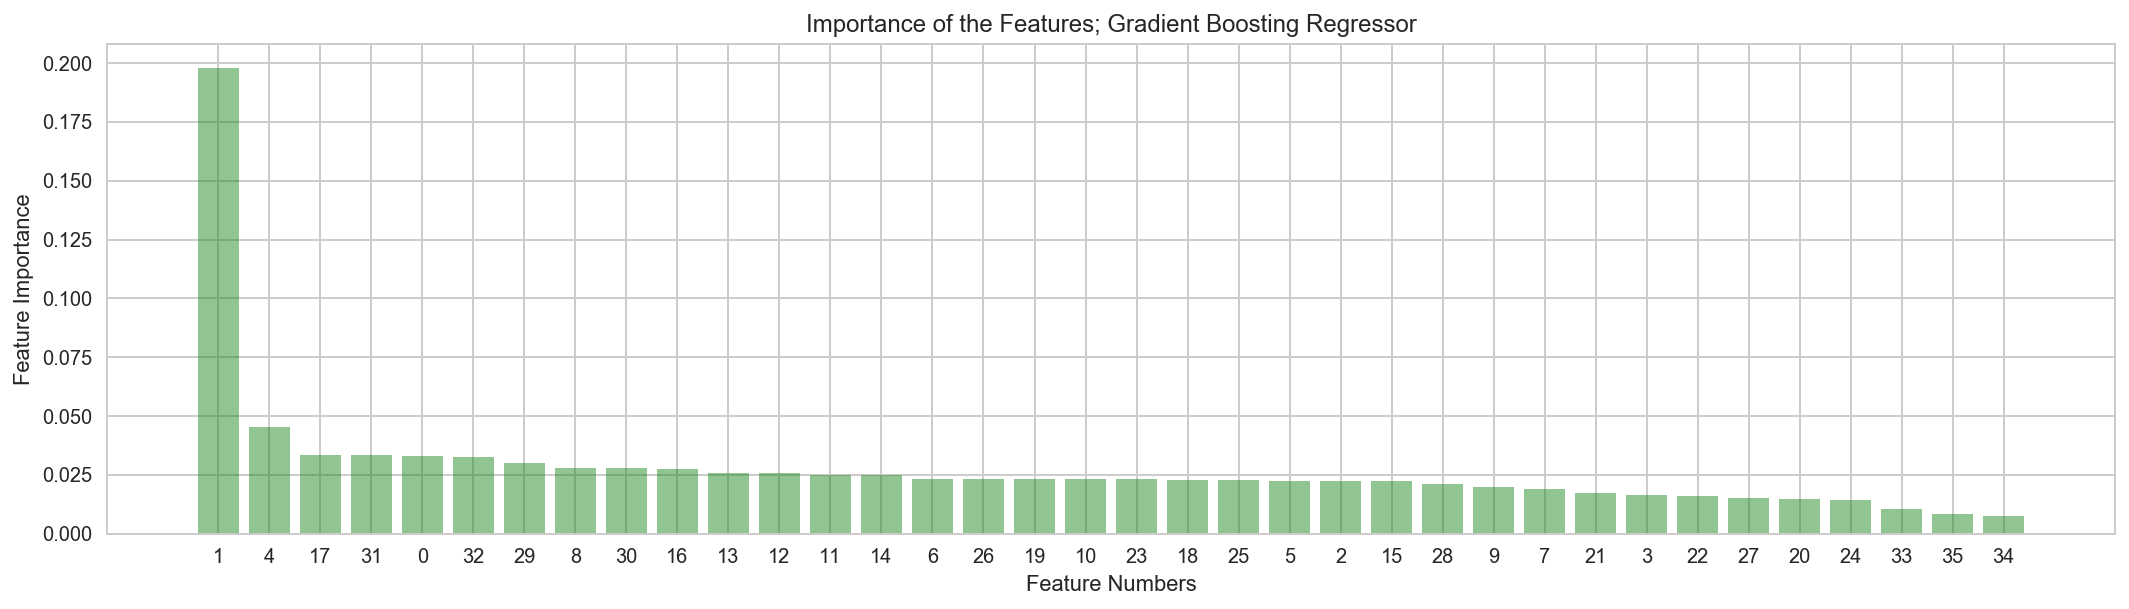

In [54]:
hide_code
# Display the feature importance
importances = GradientBoostingRegressor(max_depth=4, n_estimators=360)\
.fit(X_train, y_train).feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (18, 4.5))
plt.bar(range(X_train.shape[1]), importances[indices], 
        color="forestgreen", align="center", alpha=0.5)
plt.xlabel("Feature Numbers")
plt.ylabel("Feature Importance")
plt.xticks(range(X_train.shape[1]), indices)
plt.title("Importance of the Features; Gradient Boosting Regressor");

In [55]:
hide_code
# Fit the Regressors and display the results
print(separator, '\nNumeric and Categorical Features')
y_train_cat_gbr, y_test_cat_gbr = \
regression(GradientBoostingRegressor(max_depth=3, n_estimators=396), 
           X_train_cat, X_test_cat, y_train_cat)

y_train_cat_br, y_test_cat_br = \
regression(BaggingRegressor(n_estimators=308), X_train_cat, X_test_cat, y_train_cat)

scores('GradientBoostingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_gbr, y_test_cat_gbr)
scores('BaggingRegressor', 
       y_train_cat, y_test_cat, y_train_cat_br, y_test_cat_br)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 GradientBoostingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.819256487057
EV score. Test:  0.715290007466
----------
R2 score. Train:  0.819256487057
R2 score. Test:  0.715205172911
----------
MSE score. Train:  0.328696458248
MSE score. Test:  0.569847076119
----------
MAE score. Train:  0.352419590753
MAE score. Test:  0.407385151208
----------
MdAE score. Train:  0.190394737254
MdAE score. Test:  0.204452251533
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 BaggingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.955986879205
EV score. Test:  0.7171803317
----------
R2 score. Train:  0.955961981087
R2 score. Test:  0.71677769112
----------
MSE score. Train:  0.0800866410591
MSE score. Test:  0.5

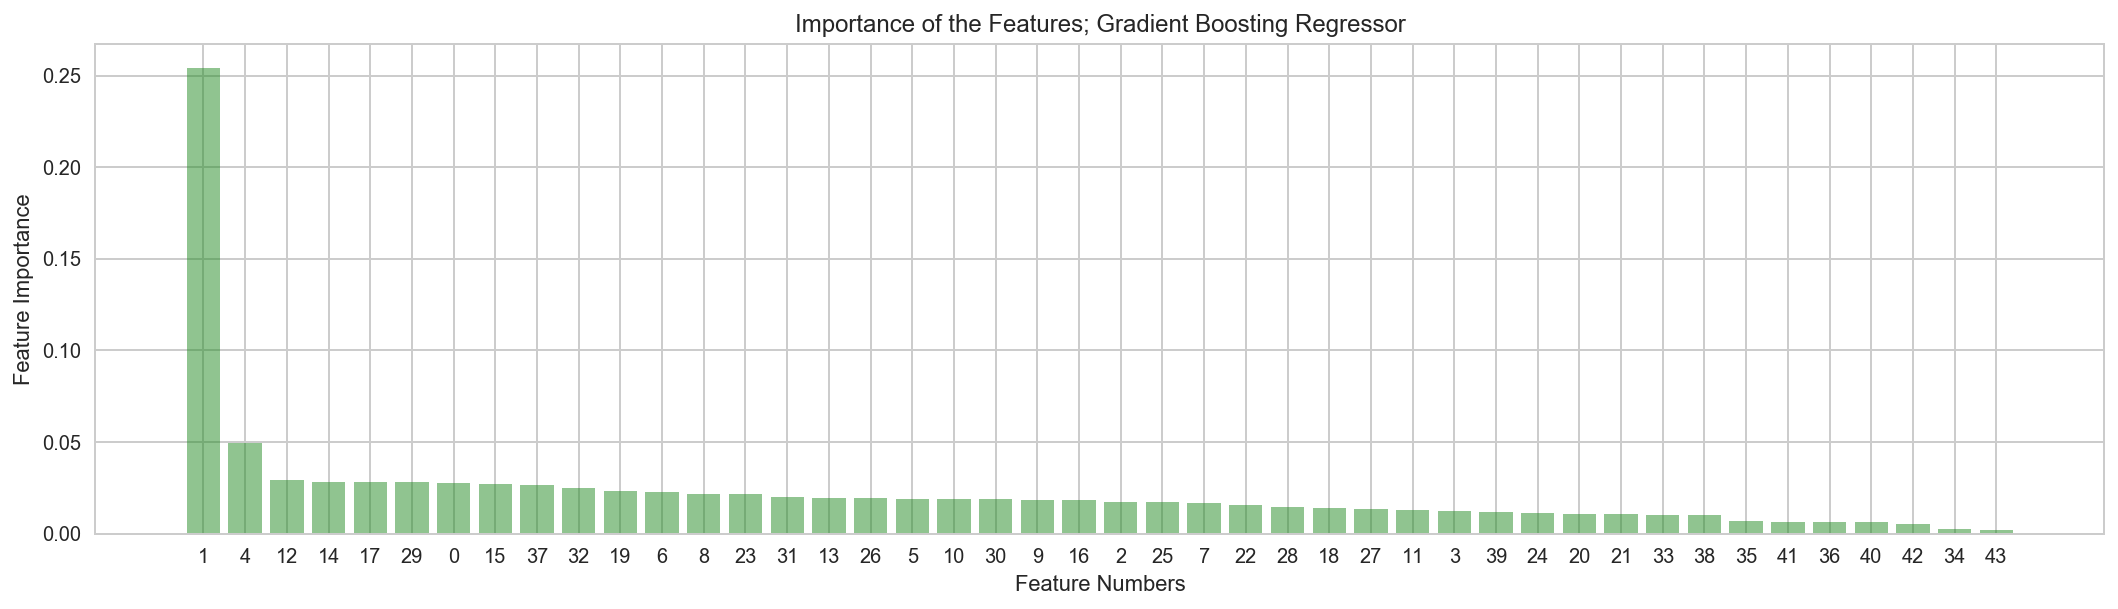

In [56]:
hide_code
# Display the feature importance
importances_cat = GradientBoostingRegressor(max_depth=3, n_estimators=396)\
.fit(X_train_cat, y_train_cat).feature_importances_
indices_cat = np.argsort(importances_cat)[::-1]

plt.figure(figsize = (18, 4.5))
plt.bar(range(X_train_cat.shape[1]), importances_cat[indices_cat], 
        color="forestgreen", align="center", alpha=0.5)

plt.xlabel("Feature Numbers")
plt.ylabel("Feature Importance")
plt.xticks(range(X_train_cat.shape[1]), indices_cat)
plt.title("Importance of the Features; Gradient Boosting Regressor");

In [57]:
hide_code
# Fit the Regressors and display the results
print(separator, '\nNumeric and Encoded Categorical Features')
y_train_cat_enc_gbr, y_test_cat_enc_gbr = \
regression(GradientBoostingRegressor(max_depth=4, n_estimators=318), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

y_train_cat_enc_br, y_test_cat_enc_br = \
regression(BaggingRegressor(n_estimators=159), 
           X_train_cat_enc, X_test_cat_enc, y_train_cat_enc)

scores('GradientBoostingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_gbr, y_test_cat_enc_gbr)
scores('BaggingRegressor', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_br, y_test_cat_enc_br)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 GradientBoostingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.845218755194
EV score. Test:  0.709121970657
----------
R2 score. Train:  0.845218755194
R2 score. Test:  0.708988310381
----------
MSE score. Train:  0.281482008082
MSE score. Test:  0.582286420511
----------
MAE score. Train:  0.330491575879
MAE score. Test:  0.40506275826
----------
MdAE score. Train:  0.180651597294
MdAE score. Test:  0.200914245033
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 BaggingRegressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.954966077819
EV score. Test:  0.71894376878
----------
R2 score. Train:  0.954941935928
R2 score. Test:  0.718590722945
----------
MSE score. Train:  0.0819416743358
MSE score. T

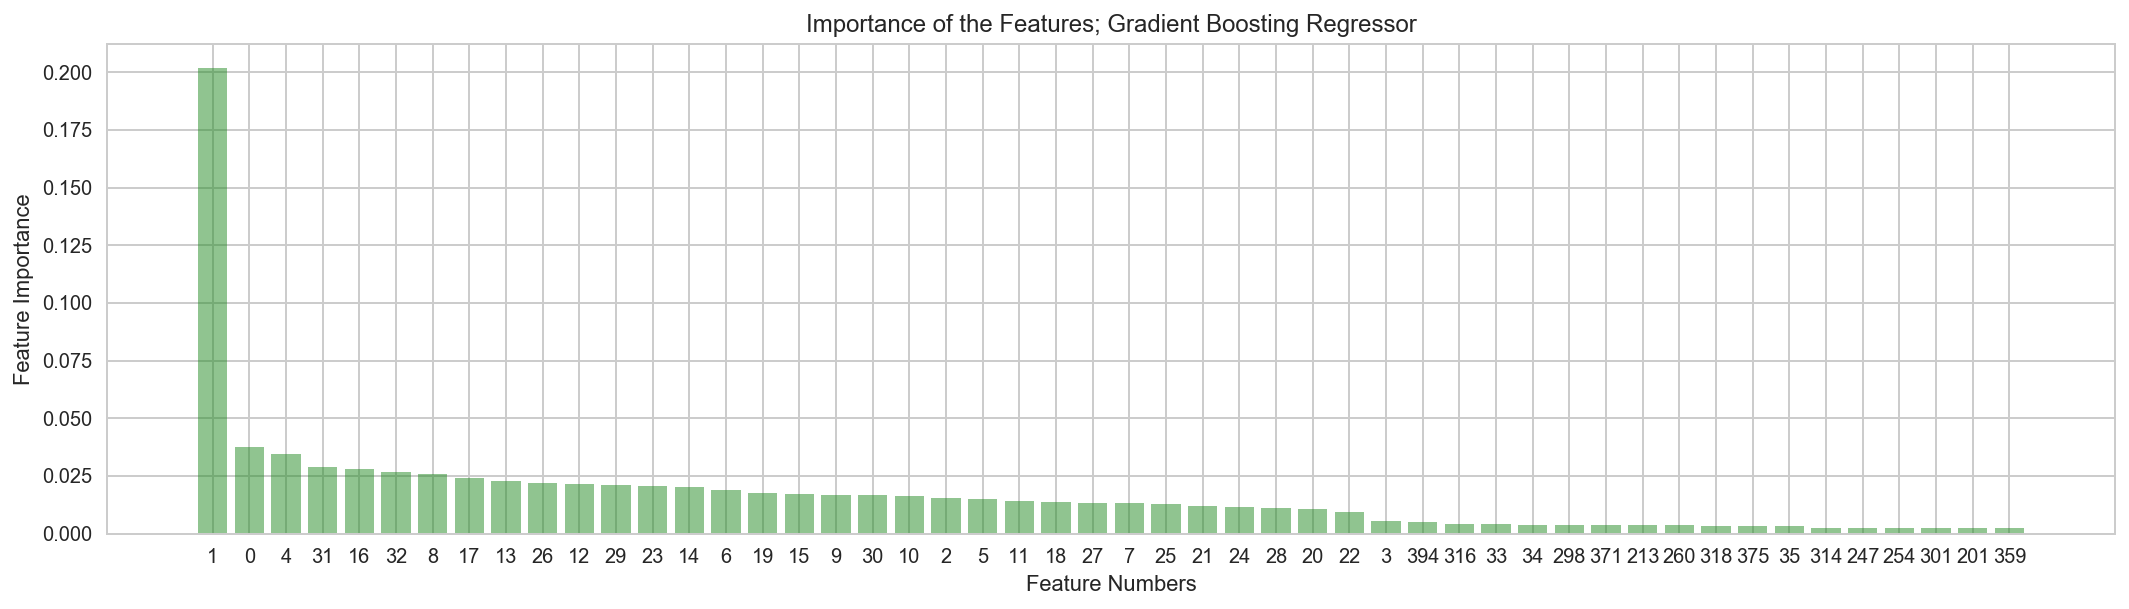

In [58]:
hide_code
# Display the feature importance
importances_cat_enc = GradientBoostingRegressor(max_depth=4, n_estimators=318)\
.fit(X_train_cat_enc, y_train_cat_enc).feature_importances_
indices_cat_enc = np.argsort(importances_cat_enc)[::-1][:50]

plt.figure(figsize = (18, 4.5))
plt.bar(range(50), importances_cat_enc[indices_cat_enc], 
        color="forestgreen", align="center", alpha=0.5)

plt.xlabel("Feature Numbers")
plt.ylabel("Feature Importance")
plt.xticks(range(50), indices_cat_enc)
plt.title("Importance of the Features; Gradient Boosting Regressor");

#### MLP Regressors

In [59]:
hide_code
# Fit the MLPRegressor and display the results
mlpr = MLPRegressor(hidden_layer_sizes=(324,), max_iter=200, 
                    solver='lbfgs', alpha=0.01)
mlpr.fit(X_train, y_train)

y_train_mlpr = mlpr.predict(X_train)
y_test_mlpr = mlpr.predict(X_test)

print(separator, '\nNumeric Features')
scores('MLP Regressor', y_train, y_test, y_train_mlpr, y_test_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.694910776064
EV score. Test:  0.680885046244
----------
R2 score. Train:  0.694892133281
R2 score. Test:  0.680848839303
----------
MSE score. Train:  0.554862930022
MSE score. Test:  0.638590797529
----------
MAE score. Train:  0.428416748747
MAE score. Test:  0.44618573309
----------
MdAE score. Train:  0.237694934298
MdAE score. Test:  0.245737828173


In [60]:
hide_code
# Fit the MLPRegressor and display the results
mlpr_cat = MLPRegressor(hidden_layer_sizes=(396,), max_iter=200, 
                        solver='lbfgs', alpha=0.01)
mlpr_cat.fit(X_train_cat, y_train_cat)

y_train_cat_mlpr = mlpr_cat.predict(X_train_cat)
y_test_cat_mlpr = mlpr_cat.predict(X_test_cat)

print(separator, '\nNumeric and Categorical Features')
scores('MLP Regressor', y_train_cat, y_test_cat, y_train_cat_mlpr, y_test_cat_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.719583149838
EV score. Test:  0.686358903242
----------
R2 score. Train:  0.719526587422
R2 score. Test:  0.686102184079
----------
MSE score. Train:  0.510063215249
MSE score. Test:  0.628079359555
----------
MAE score. Train:  0.412818231241
MAE score. Test:  0.440370985747
----------
MdAE score. Train:  0.227854126194
MdAE score. Test:  0.236698757056


In [61]:
hide_code
# Fit the MLPRegressor and display the results
mlpr_cat_enc = MLPRegressor(hidden_layer_sizes=(318,), max_iter=200, 
                            solver='lbfgs', alpha=0.01)
mlpr_cat_enc.fit(X_train_cat_enc, y_train_cat_enc)

y_train_cat_enc_mlpr = mlpr_cat_enc.predict(X_train_cat_enc)
y_test_cat_enc_mlpr = mlpr_cat_enc.predict(X_test_cat_enc)

print(separator, '\nNumeric and Encoded Categorical Features')
scores('MLP Regressor', y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlpr, y_test_cat_enc_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.75972159642
EV score. Test:  0.692601879392
----------
R2 score. Train:  0.759705279323
R2 score. Test:  0.69253919866
----------
MSE score. Train:  0.436995067409
MSE score. Test:  0.615199512068
----------
MAE score. Train:  0.39652696672
MAE score. Test:  0.441295993342
----------
MdAE score. Train:  0.216830692474
MdAE score. Test:  0.234502222051


#### Display Predictions

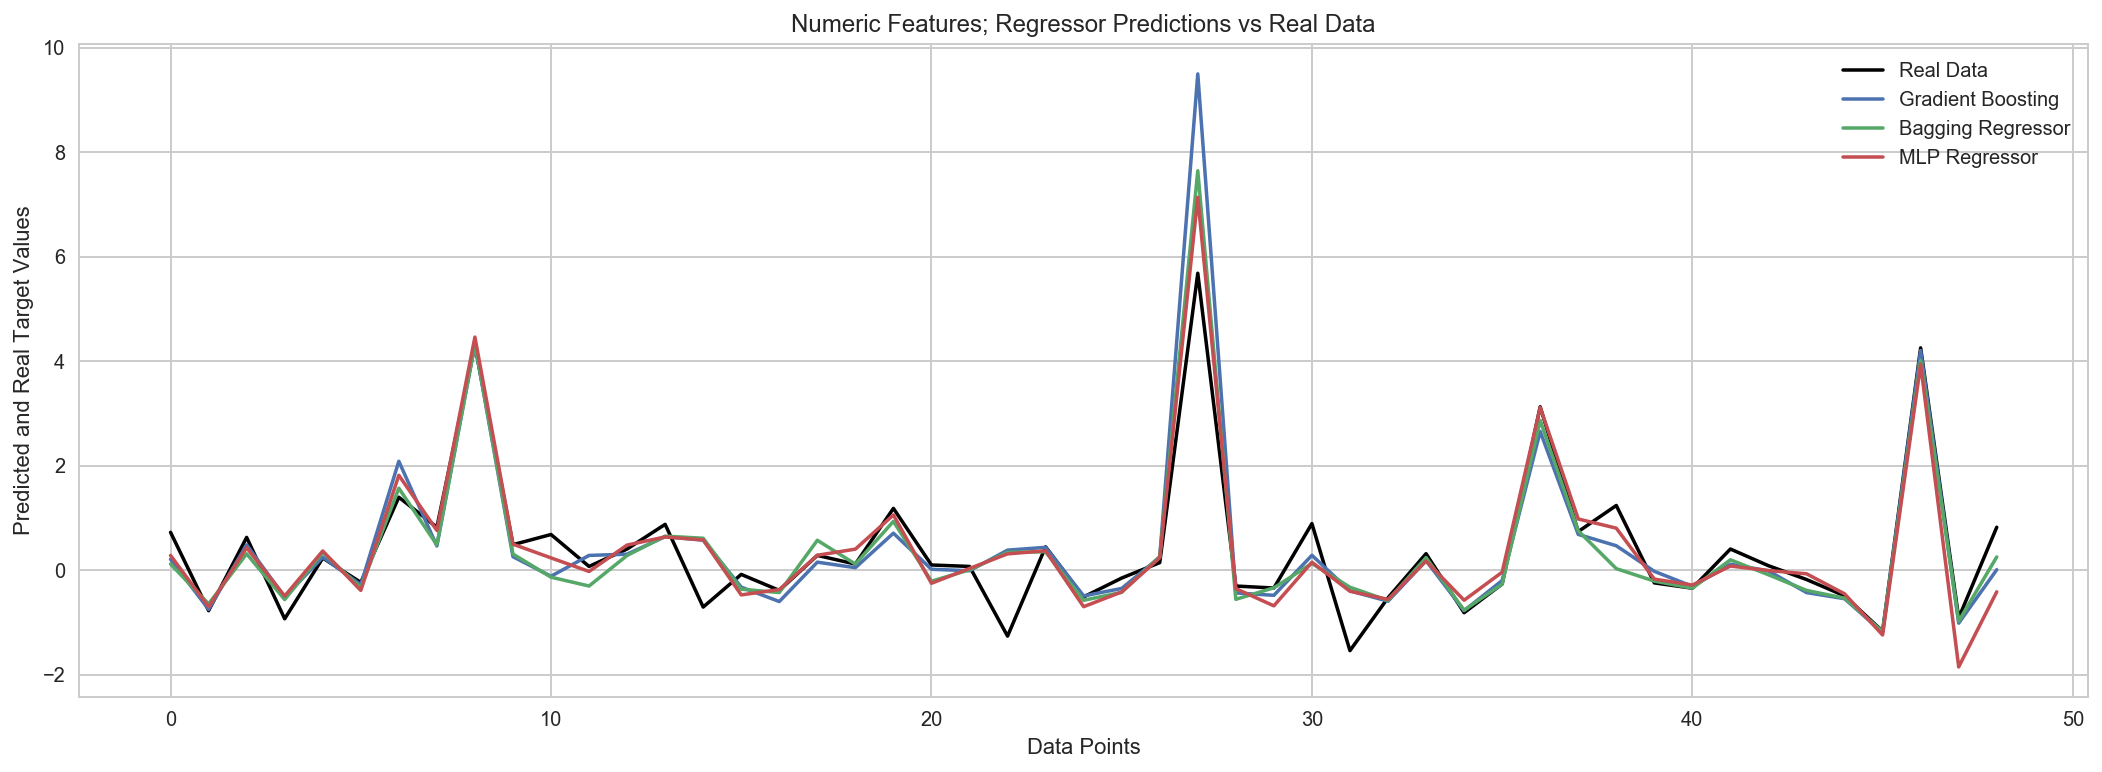

In [97]:
hide_code
# Plot predictions of the regressors with real values
plt.figure(figsize = (18, 6))
plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_br[1:50], label='Bagging Regressor')
plt.plot(y_test_mlpr[1:50], label='MLP Regressor')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric Features; Regressor Predictions vs Real Data");

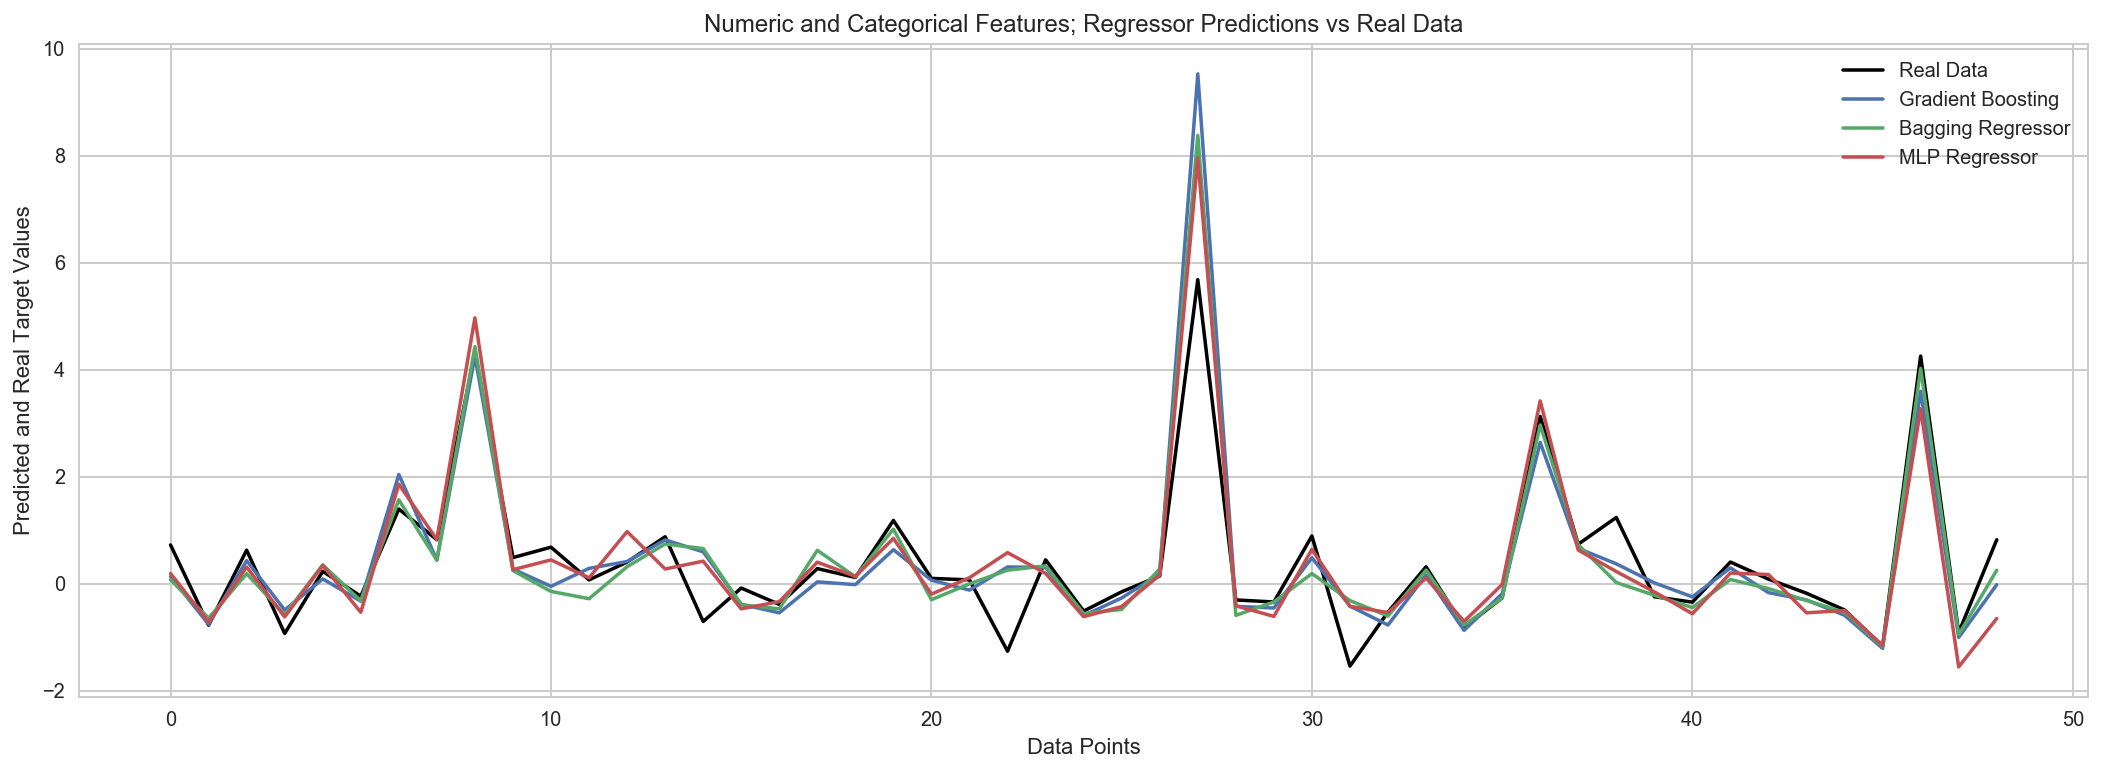

In [98]:
hide_code
# Plot predictions of the regressors with real values
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_mlpr[1:50], label='MLP Regressor')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric and Categorical Features; Regressor Predictions vs Real Data");

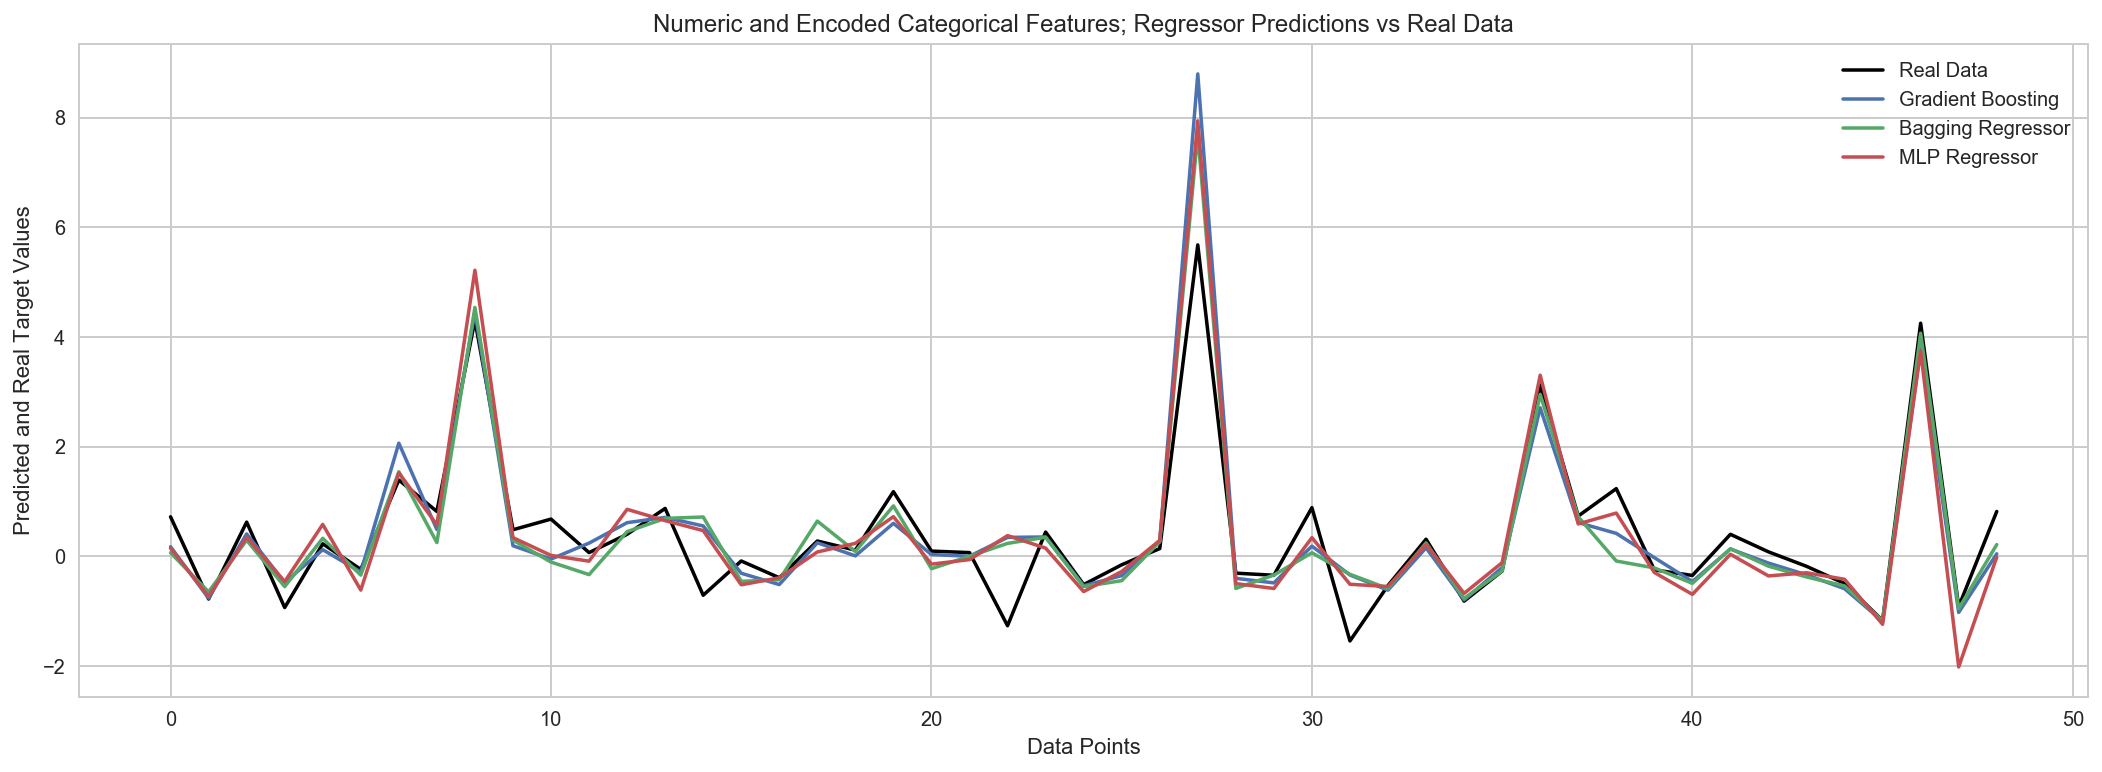

In [99]:
hide_code
# Plot predictions of the regressors with real values
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat_enc[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_gbr[1:50], label='Gradient Boosting')
plt.plot(y_test_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(y_test_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric and Encoded Categorical Features; Regressor Predictions vs Real Data");

### Neural Networks; Keras
#### MLP

In [69]:
hide_code
# Create the sequential model
def mlp_model():
    model = Sequential()

    model.add(Dense(108, activation='relu', input_dim=36))
    model.add(Dense(108, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
        
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
    return model

mlp_model = mlp_model()
# Create the checkpointer for saving the best results
mlp_checkpointer = ModelCheckpoint(filepath='weights.best.mlp.hdf5', 
                                   verbose=2, save_best_only=True)
# Fit the model
mlp_history = mlp_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test),
                            nb_epoch=15, batch_size=128, verbose=0, 
                            callbacks=[mlp_checkpointer])

Epoch 00000: val_loss improved from inf to 0.76336, saving model to weights.best.mlp.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss improved from 0.76336 to 0.75866, saving model to weights.best.mlp.hdf5
Epoch 00003: val_loss improved from 0.75866 to 0.67302, saving model to weights.best.mlp.hdf5
Epoch 00004: val_loss improved from 0.67302 to 0.61173, saving model to weights.best.mlp.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss improved from 0.61173 to 0.60404, saving model to weights.best.mlp.hdf5
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve


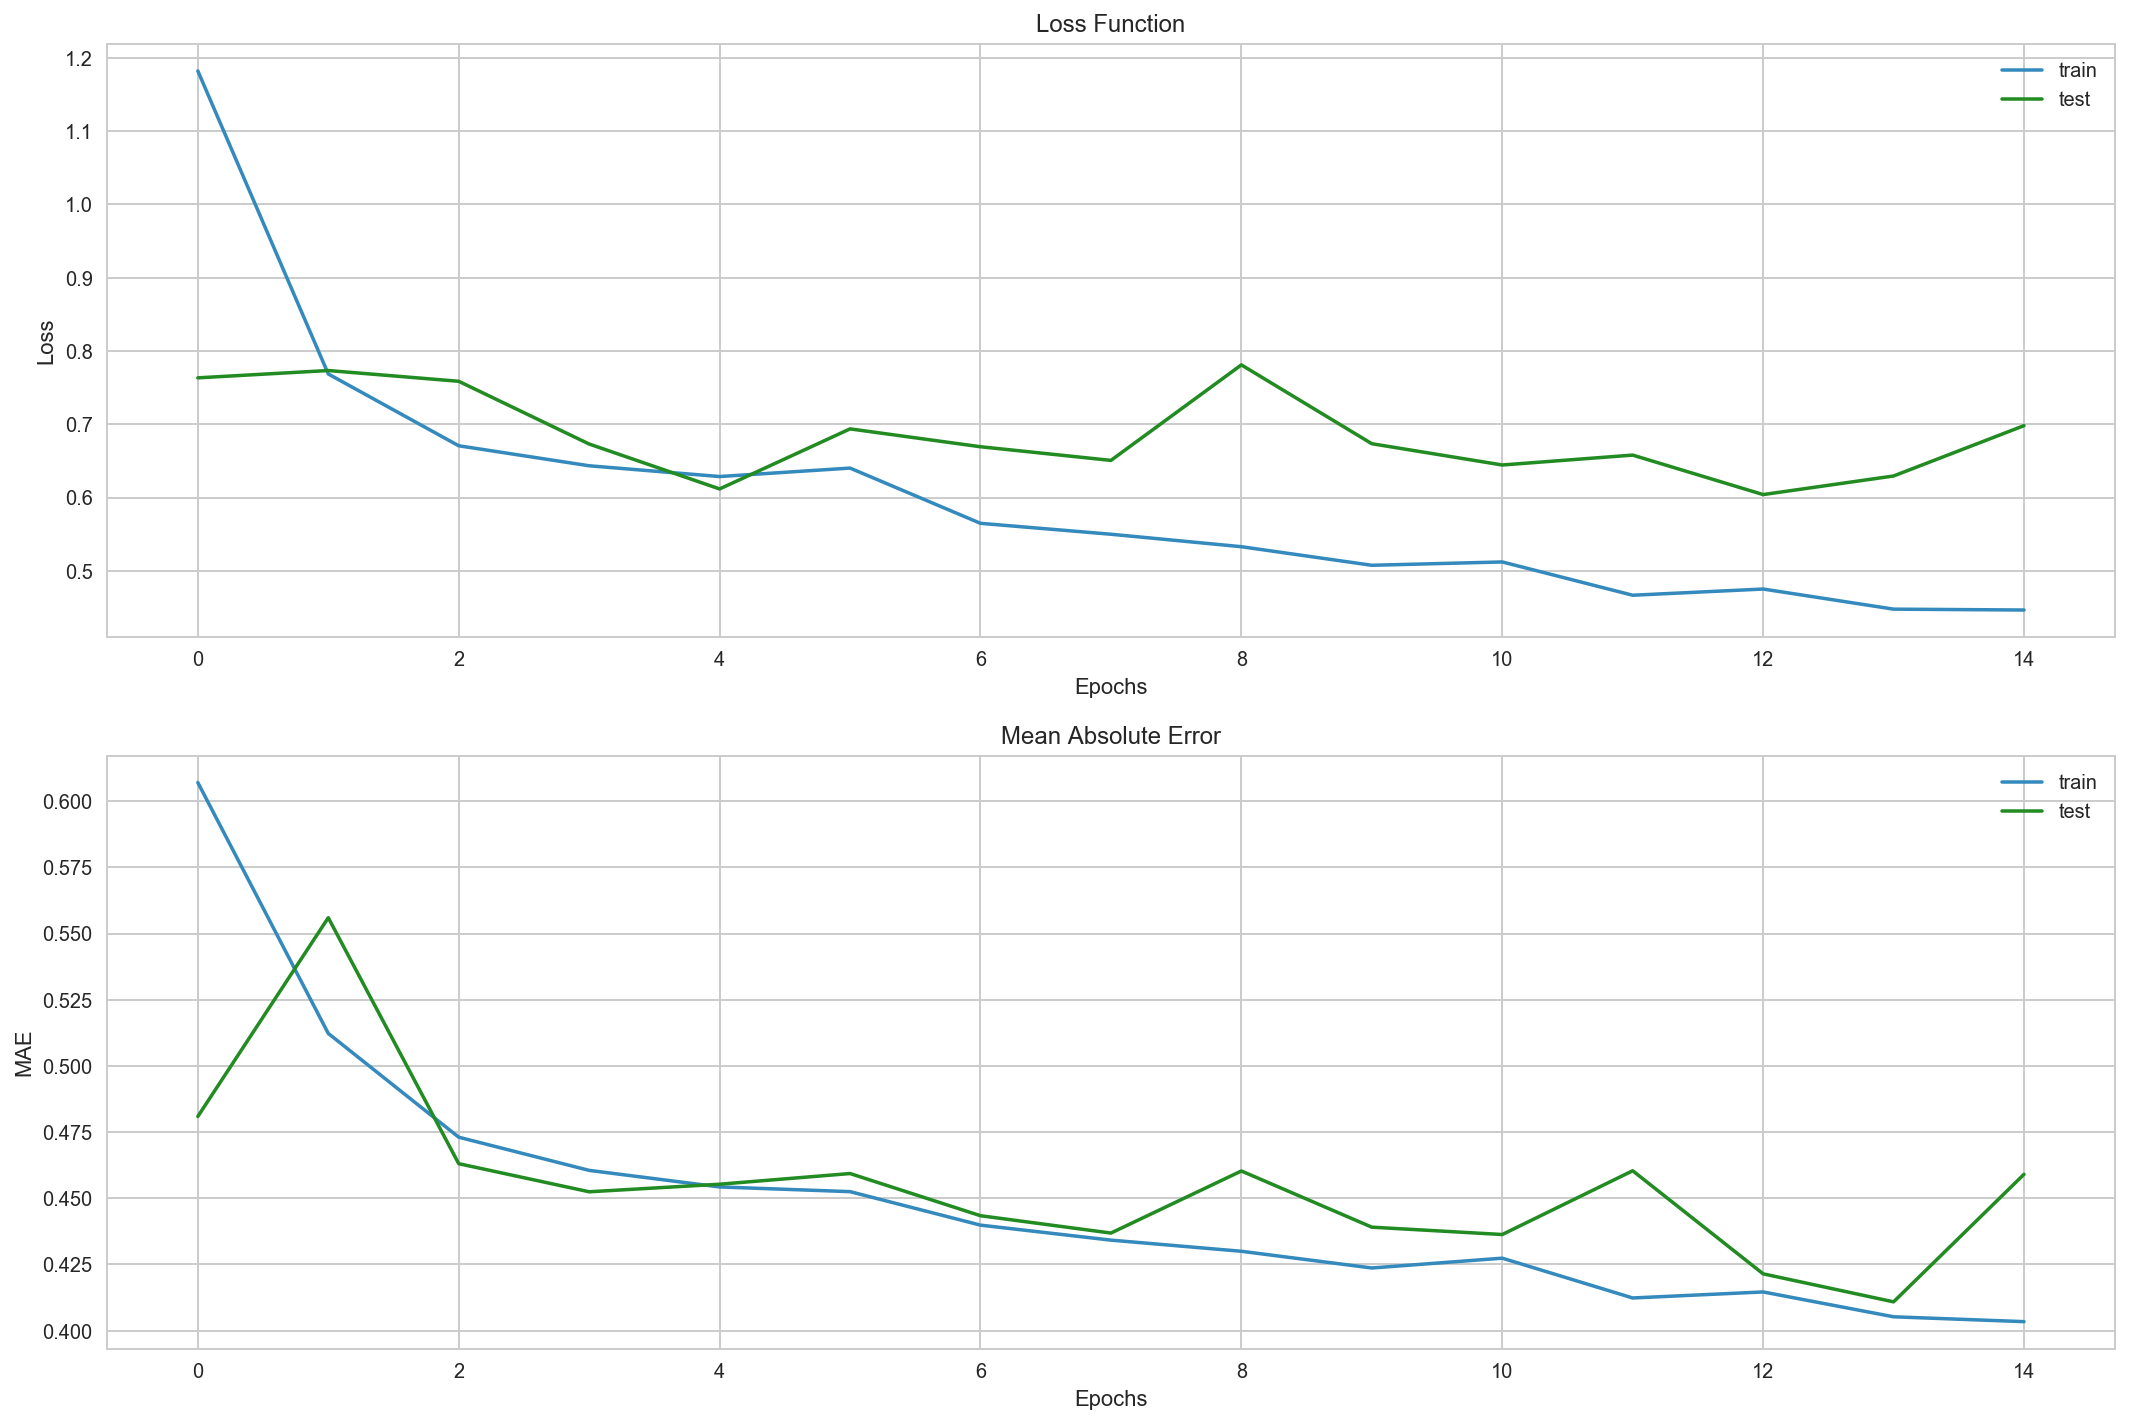

In [70]:
hide_code
# Plot the fitting history
history_plot(mlp_history)

In [72]:
hide_code
# Load the best model results 
mlp_model.load_weights('weights.best.mlp.hdf5')
# Create predictions
y_train_mlp = mlp_model.predict(X_train)
y_test_mlp = mlp_model.predict(X_test)
# Save the model
mlp_model.save('mlp_model_p6.h5')
# Display metrics
print(separator, '\nNumeric Features')
scores('MLP Model', y_train, y_test, y_train_mlp, y_test_mlp)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.779223535405
EV score. Test:  0.698338168765
----------
R2 score. Train:  0.778931084488
R2 score. Test:  0.69811728928
----------
MSE score. Train:  0.40203141111
MSE score. Test:  0.604038288873
----------
MAE score. Train:  0.379157690635
MAE score. Test:  0.421436345635
----------
MdAE score. Train:  0.196434131872
MdAE score. Test:  0.208848841455


In [73]:
hide_code
# Create the sequential model
def mlp_cat_model():
    model = Sequential()
    
    model.add(Dense(66, activation='relu', input_dim=44))
    model.add(Dense(66, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
    return model

mlp_cat_model = mlp_cat_model()
# Create the checkpointer for saving the best results
mlp_cat_checkpointer = ModelCheckpoint(filepath='weights.best.mlp_cat.hdf5', 
                                       verbose=2, save_best_only=True)
# Fit the model
mlp_cat_history = mlp_cat_model.fit(X_train_cat, y_train_cat, 
                                    validation_data=(X_test_cat, y_test_cat),
                                    nb_epoch=15, batch_size=128, verbose=0, 
                                    callbacks=[mlp_cat_checkpointer])

Epoch 00000: val_loss improved from inf to 0.73360, saving model to weights.best.mlp_cat.hdf5
Epoch 00001: val_loss improved from 0.73360 to 0.67631, saving model to weights.best.mlp_cat.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss improved from 0.67631 to 0.63774, saving model to weights.best.mlp_cat.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve


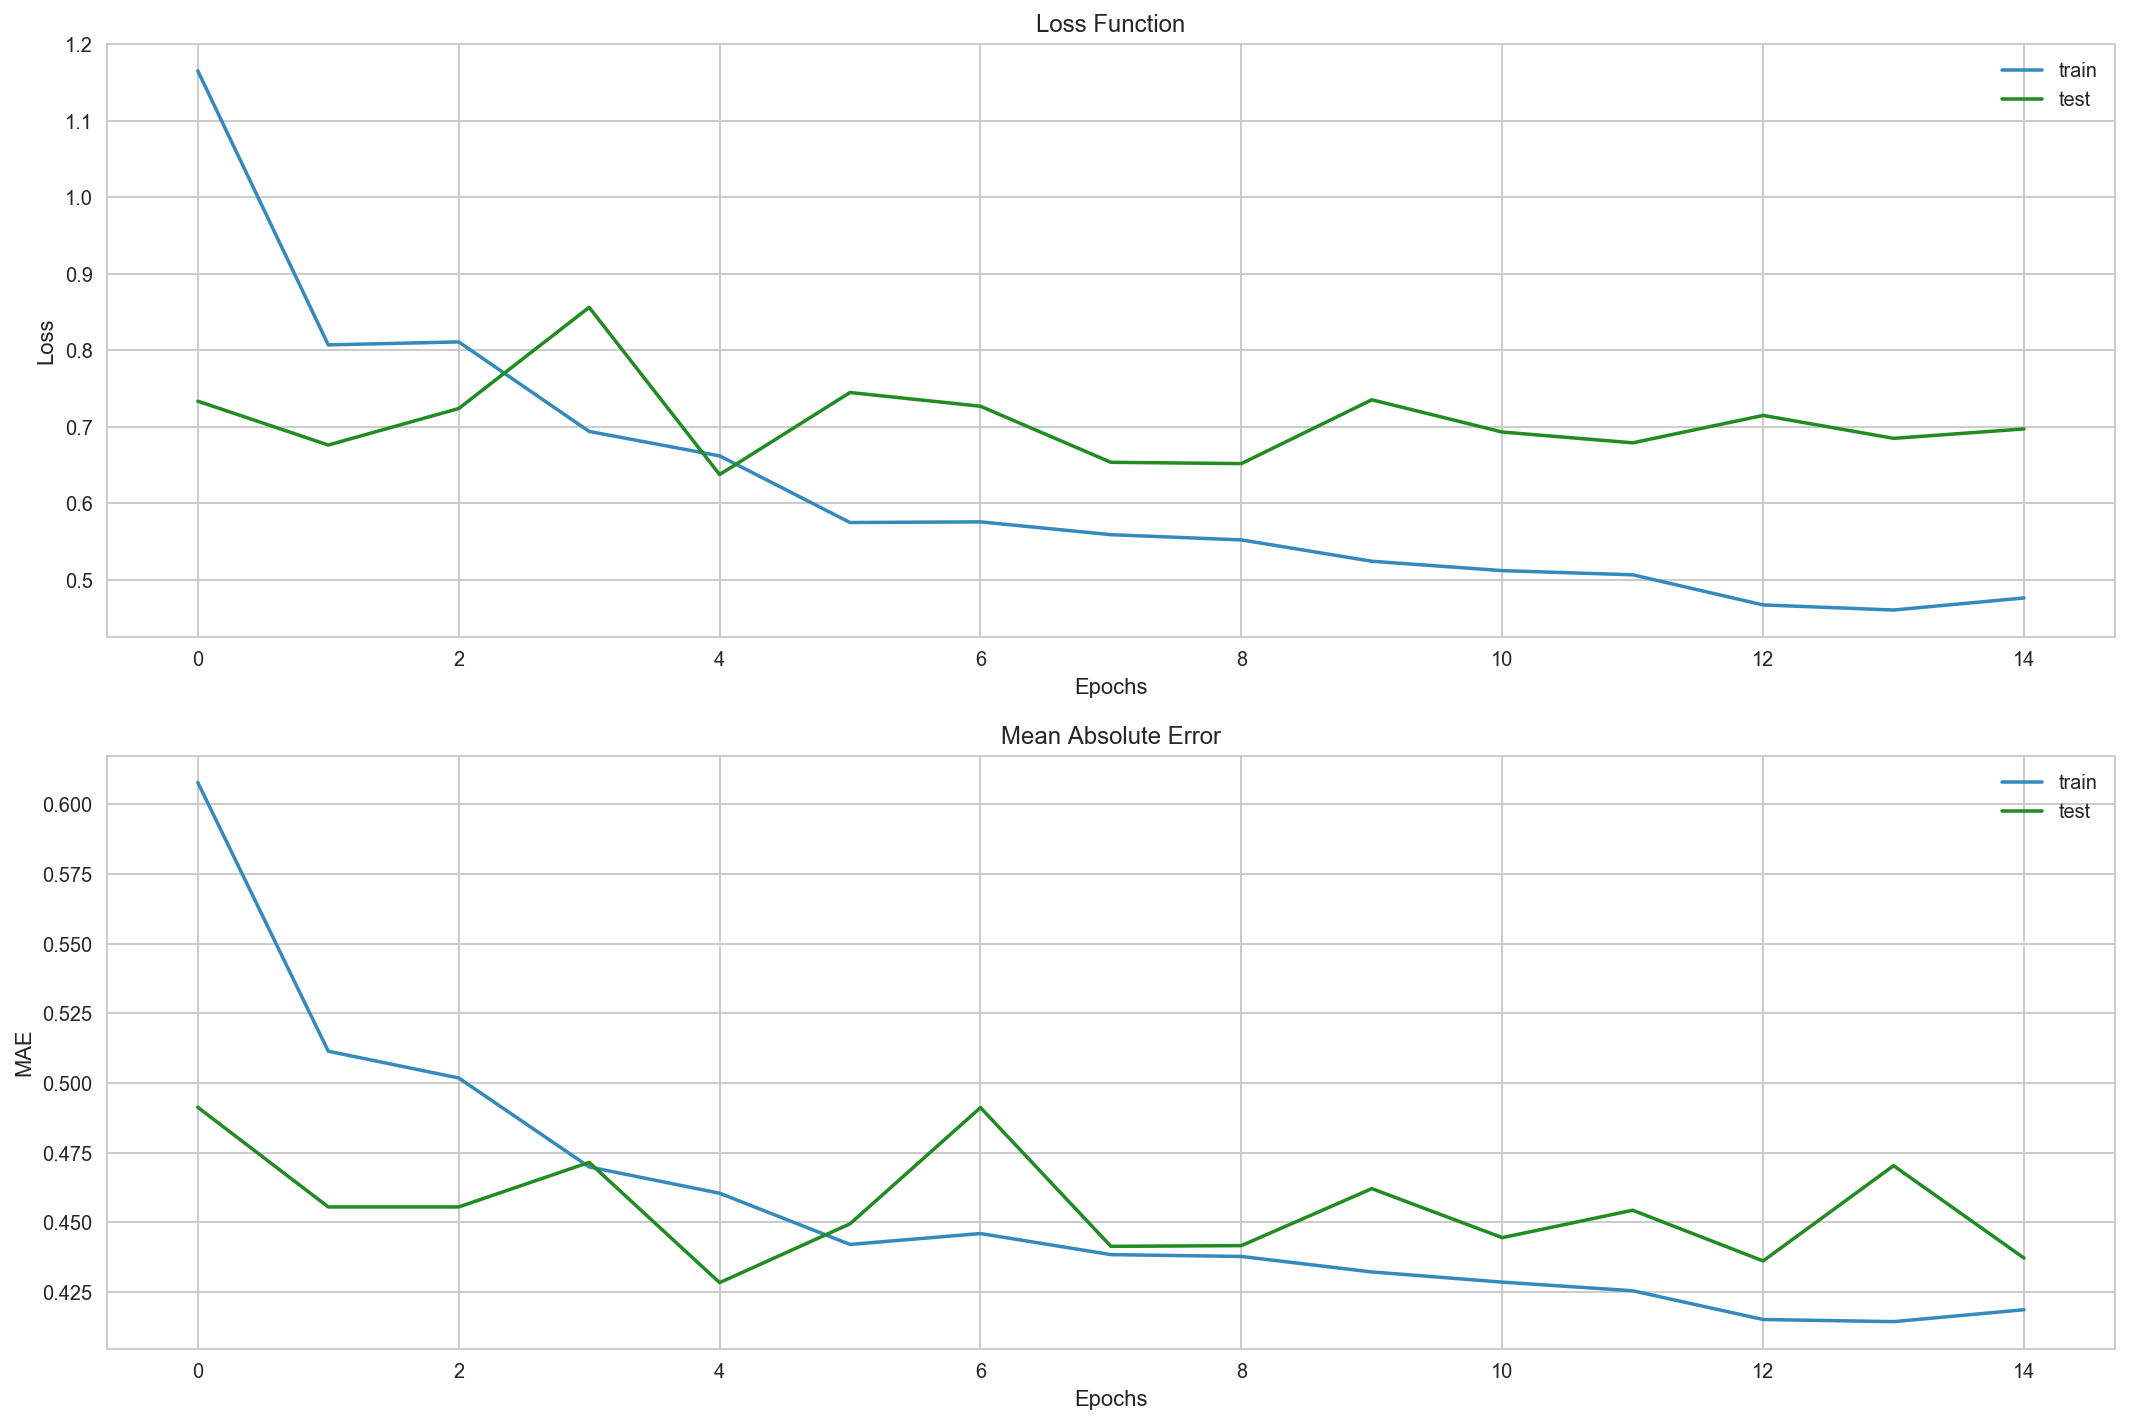

In [76]:
hide_code
# Plot the history
history_plot(mlp_cat_history)

In [77]:
hide_code
# Load the best model results
mlp_cat_model.load_weights('weights.best.mlp_cat.hdf5')
# Create predictions
y_train_cat_mlp = mlp_cat_model.predict(X_train_cat)
y_test_cat_mlp = mlp_cat_model.predict(X_test_cat)
# Save the model
mlp_cat_model.save('mlp_cat_model_p6.h5')
# Display metrics
print(separator, '\nNumeric and Categorical Features')
scores('MLP Model', 
       y_train_cat, y_test_cat, y_train_cat_mlp, y_test_cat_mlp)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.704571297143
EV score. Test:  0.682485665633
----------
R2 score. Train:  0.702571107308
R2 score. Test:  0.68127614646
----------
MSE score. Train:  0.540898104814
MSE score. Test:  0.637735796979
----------
MAE score. Train:  0.406731688191
MAE score. Test:  0.428346251441
----------
MdAE score. Train:  0.201488030752
MdAE score. Test:  0.210472592688


In [84]:
hide_code
# Create the sequential model
def mlp_cat_enc_model():
    model = Sequential()
    
    model.add(Dense(159, activation='relu', input_dim=636))
    model.add(Dense(159, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(318, activation='relu'))
    model.add(Dense(318, activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(636, activation='relu'))
    model.add(Dense(636, activation='relu'))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

mlp_cat_enc_model = mlp_cat_enc_model()
# Create the checkpointer for saving the best results
mlp_cat_enc_checkpointer = ModelCheckpoint(filepath='weights.best.mlp_cat_enc.hdf5', 
                                           verbose=2, save_best_only=True)
# Fit the model
mlp_cat_enc_history = mlp_cat_enc_model.fit(X_train_cat_enc, y_train_cat_enc, 
                                            validation_data=(X_test_cat_enc, y_test_cat_enc),
                                            nb_epoch=10, batch_size=128, verbose=0, 
                                            callbacks=[mlp_cat_enc_checkpointer])

Epoch 00000: val_loss improved from inf to 0.73537, saving model to weights.best.mlp_cat_enc.hdf5
Epoch 00001: val_loss improved from 0.73537 to 0.69073, saving model to weights.best.mlp_cat_enc.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss improved from 0.69073 to 0.61956, saving model to weights.best.mlp_cat_enc.hdf5
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve


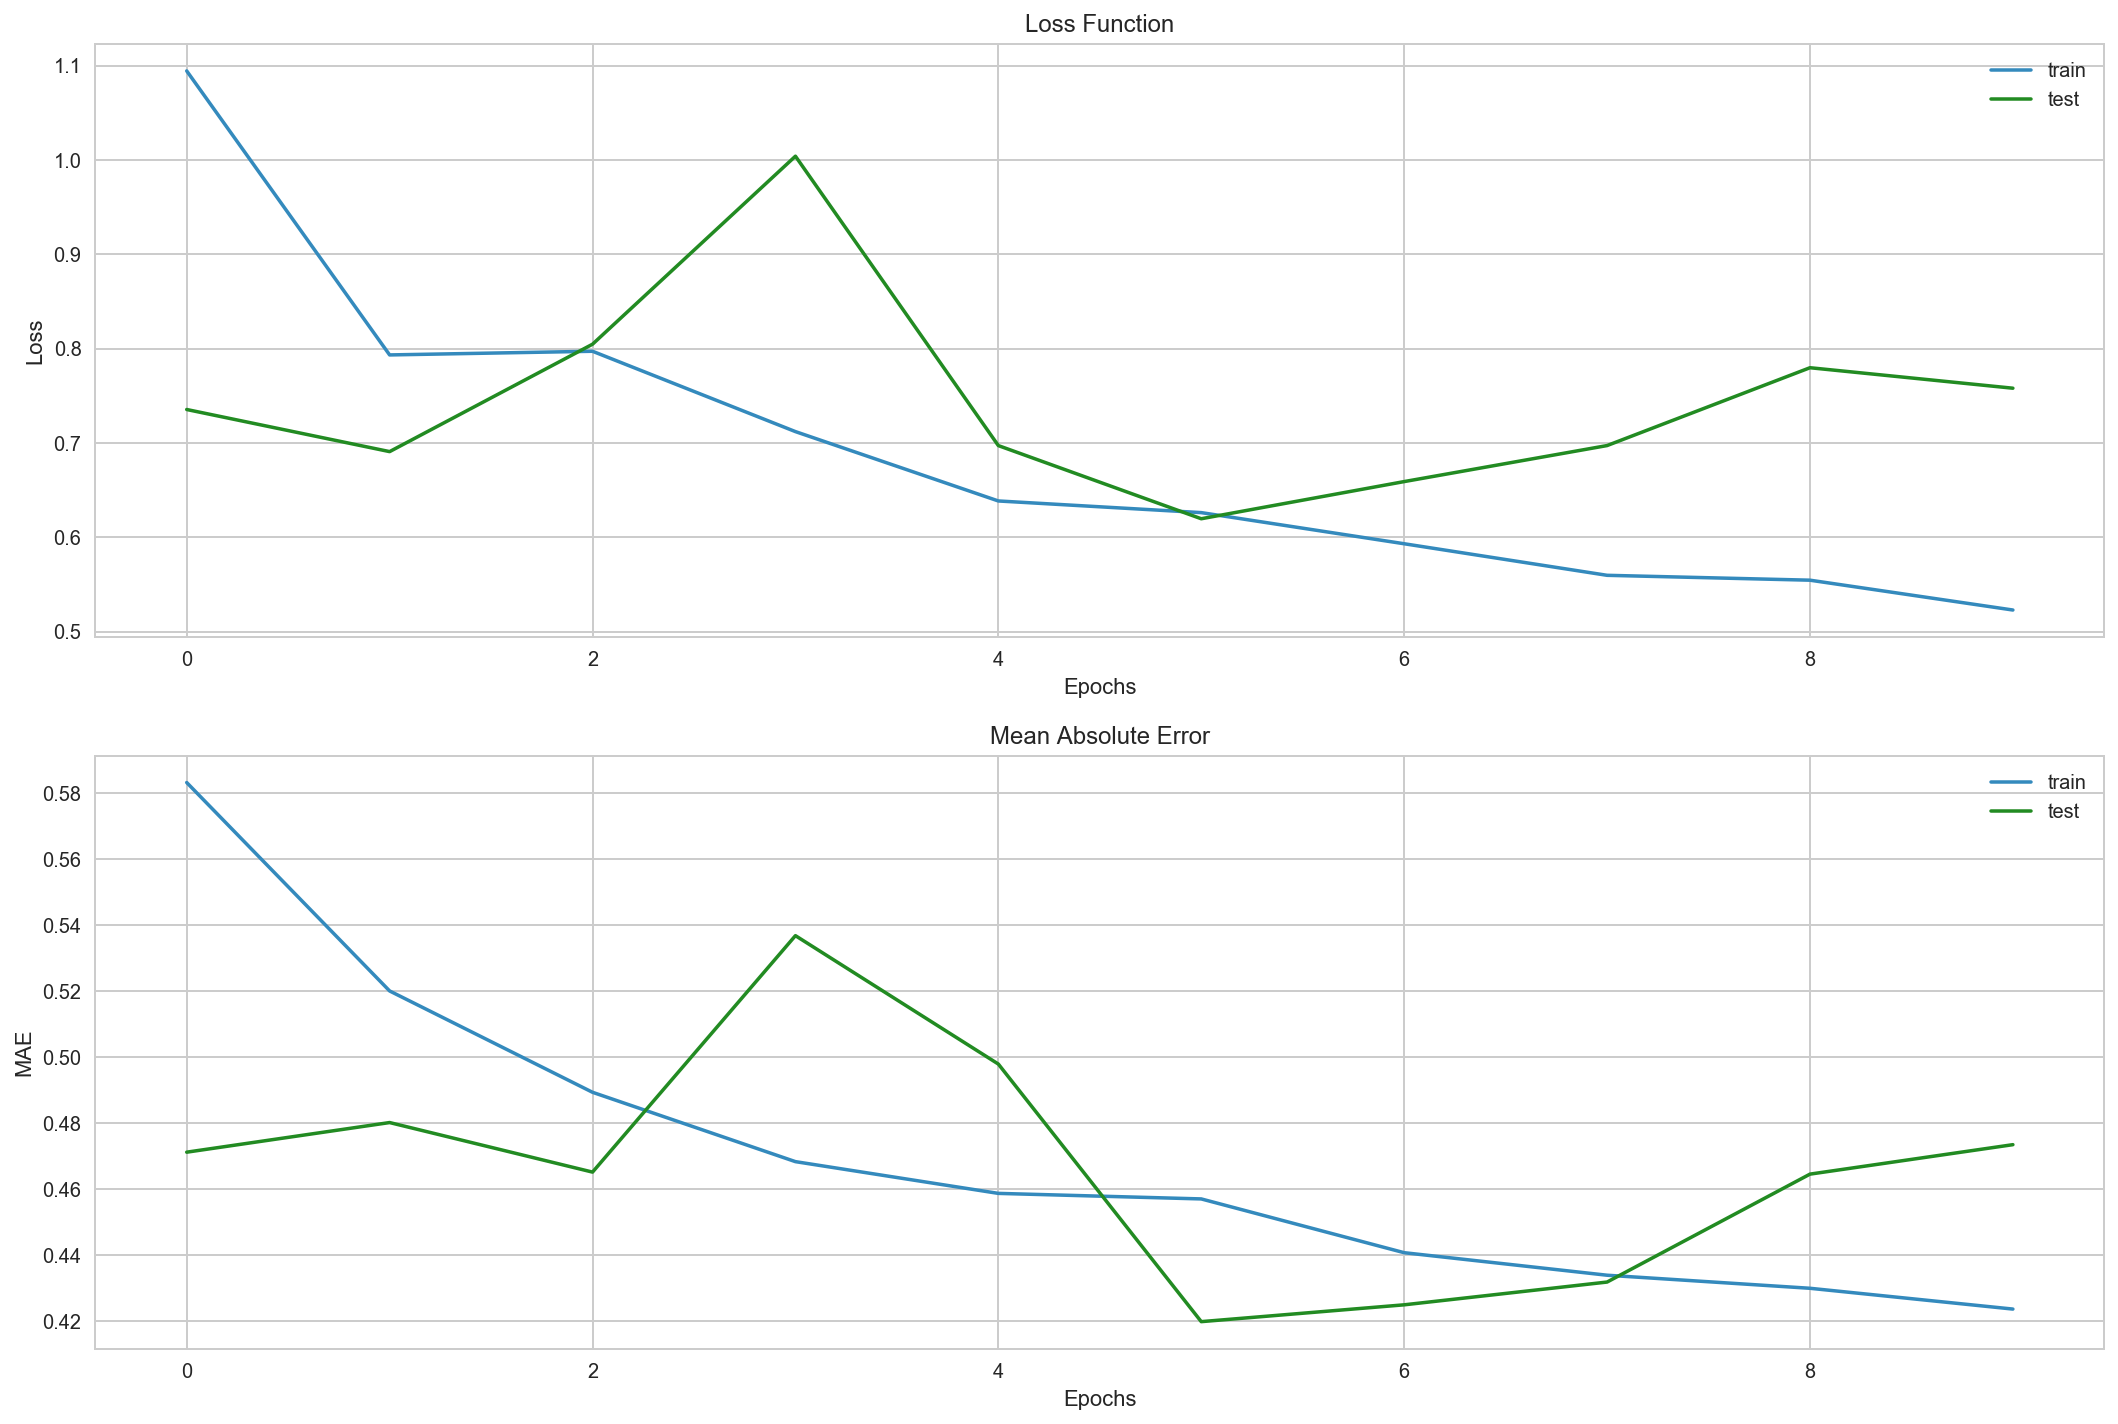

In [85]:
hide_code
# Plot the fitting history
history_plot(mlp_cat_enc_history)

In [86]:
hide_code
# Load the best model results
mlp_cat_enc_model.load_weights('weights.best.mlp_cat_enc.hdf5')
# Create predictions
y_train_cat_enc_mlp = mlp_cat_enc_model.predict(X_train_cat_enc)
y_test_cat_enc_mlp = mlp_cat_enc_model.predict(X_test_cat_enc)
# Save the model
mlp_cat_enc_model.save('mlp_cat_enc_model_p6.h5')
# Display metrics
print(separator, '\nNumeric and Encoded Categorical Features')
scores('MLP Model', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_mlp, y_test_cat_enc_mlp)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.734689078928
EV score. Test:  0.691835277638
----------
R2 score. Train:  0.732037794332
R2 score. Test:  0.690358803214
----------
MSE score. Train:  0.487310590091
MSE score. Test:  0.619562273787
----------
MAE score. Train:  0.386632017578
MAE score. Test:  0.419724791449
----------
MdAE score. Train:  0.190463358031
MdAE score. Test:  0.206511029184


#### CNN

In [87]:
hide_code
# Create the sequential model
def cnn_model():
    model = Sequential()
        
    model.add(Conv1D(36, 5, padding='valid', activation='relu', input_shape=(36, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(144, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(576, activation='relu', kernel_initializer='normal',))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
    return model

cnn_model = cnn_model()
# Create the checkpointer for saving the best results
cnn_checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                                   verbose=2, save_best_only=True)
# Fit the model
cnn_history = cnn_model.fit(X_train.reshape(-1, 36, 1), y_train, 
                            epochs=30, batch_size=128, verbose=0, callbacks=[cnn_checkpointer],
                            validation_data=(X_test.reshape(-1, 36, 1), y_test))

Epoch 00000: val_loss improved from inf to 0.81781, saving model to weights.best.cnn.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss improved from 0.81781 to 0.73380, saving model to weights.best.cnn.hdf5
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.73380 to 0.66884, saving model to weights.best.cnn.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss improved from 0.66884 to 0.66499, saving model to weights.best.cnn.hdf5
Epoch 00009: val_loss improved from 0.66499 to 0.65387, saving model to weights.best.cnn.hdf5
Epoch 00010: val_loss improved from 0.65387 to 0.63516, saving model to weights.best.cnn.hdf5
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss improved from 0.63516 to 0.60682, saving model to weights.best.cnn.hdf5
Epoc

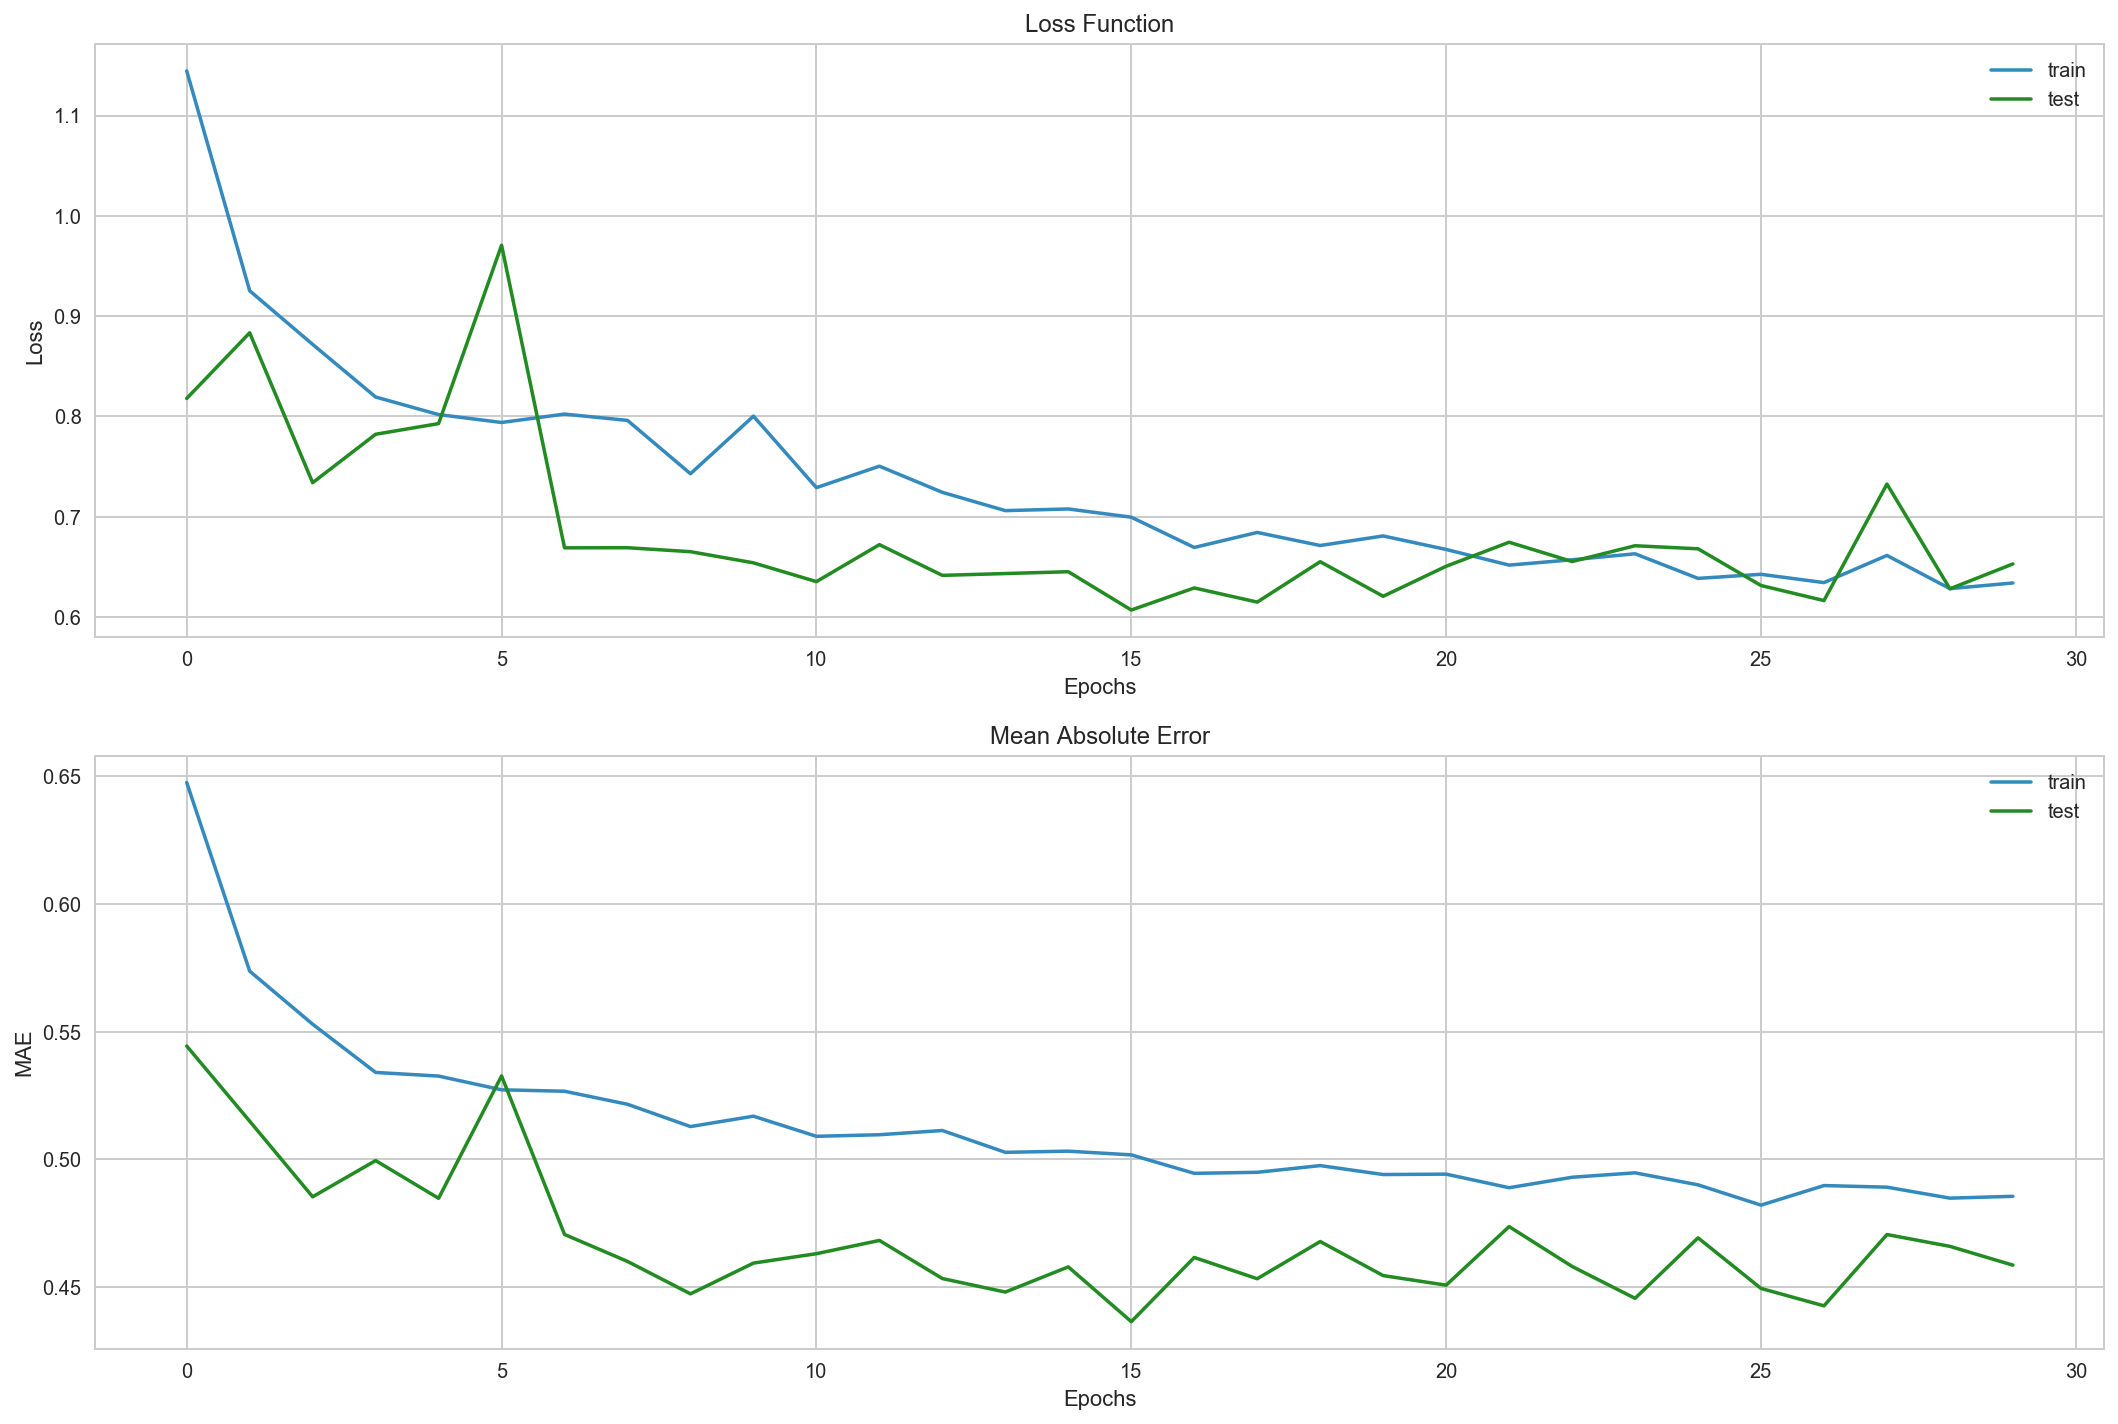

In [88]:
hide_code
# Plot the fitting history
history_plot(cnn_history)

In [89]:
hide_code
# Load the best model results
cnn_model.load_weights('weights.best.cnn.hdf5')
# Create predictions
y_train_cnn = cnn_model.predict(X_train.reshape(-1, 36, 1))
y_test_cnn = cnn_model.predict(X_test.reshape(-1, 36, 1))
# Save the model
cnn_model.save('cnn_model_p6.h5')
# Display metrics
print(separator, '\nNumeric Features')
scores('CNN Model', y_train, y_test, y_train_cnn, y_test_cnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.699713695737
EV score. Test:  0.697034861499
----------
R2 score. Train:  0.699305670988
R2 score. Test:  0.696729381167
----------
MSE score. Train:  0.546836560561
MSE score. Test:  0.606815359608
----------
MAE score. Train:  0.4208875195
MAE score. Test:  0.436519466436
----------
MdAE score. Train:  0.2136638896
MdAE score. Test:  0.222070650806


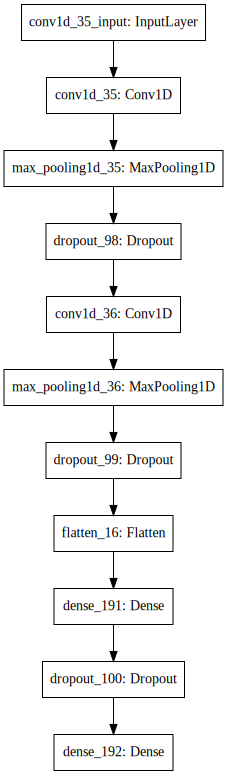

In [138]:
hide_code
# Display the example of the model architecture
SVG(model_to_dot(cnn_model).create(prog='dot', format='svg'))

In [90]:
hide_code
# Create the sequential model
def cnn_cat_model():
    model = Sequential()
        
    model.add(Conv1D(44, 5, padding='valid', activation='relu', input_shape=(44, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(156, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(624, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
    return model

cnn_cat_model = cnn_cat_model()
# Create the checkpointer for saving the best results
cnn_cat_checkpointer = ModelCheckpoint(filepath='weights.best.cnn_cat.hdf5', 
                                       verbose=2, save_best_only=True)
# Fit the model
cnn_cat_history = cnn_cat_model.fit(X_train_cat.reshape(-1, 44, 1), y_train_cat, 
                                    epochs=30, batch_size=128, verbose=0, callbacks=[cnn_cat_checkpointer],
                                    validation_data=(X_test_cat.reshape(-1, 44, 1), y_test_cat))

Epoch 00000: val_loss improved from inf to 0.97707, saving model to weights.best.cnn_cat.hdf5
Epoch 00001: val_loss improved from 0.97707 to 0.74051, saving model to weights.best.cnn_cat.hdf5
Epoch 00002: val_loss improved from 0.74051 to 0.67871, saving model to weights.best.cnn_cat.hdf5
Epoch 00003: val_loss improved from 0.67871 to 0.65546, saving model to weights.best.cnn_cat.hdf5
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss improved from 0.65546 to 0.63125, saving model to weights.best.cnn_cat.hdf5
Epoch 00008: val_loss improved from 0.63125 to 0.62668, saving model to weights.best.cnn_cat.hdf5
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss improved from 0.62668 to 0.61899, saving model to weights.best.cnn_cat.hdf5
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss improved from 0.61899 to 0.61320, saving model to weights.best.cnn_c

In [91]:
hide_code
# Display the model description
cnn_cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 40, 44)            264       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 20, 44)            0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 20, 44)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 18, 156)           20748     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 9, 156)            0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 9, 156)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1404)              0         
__________

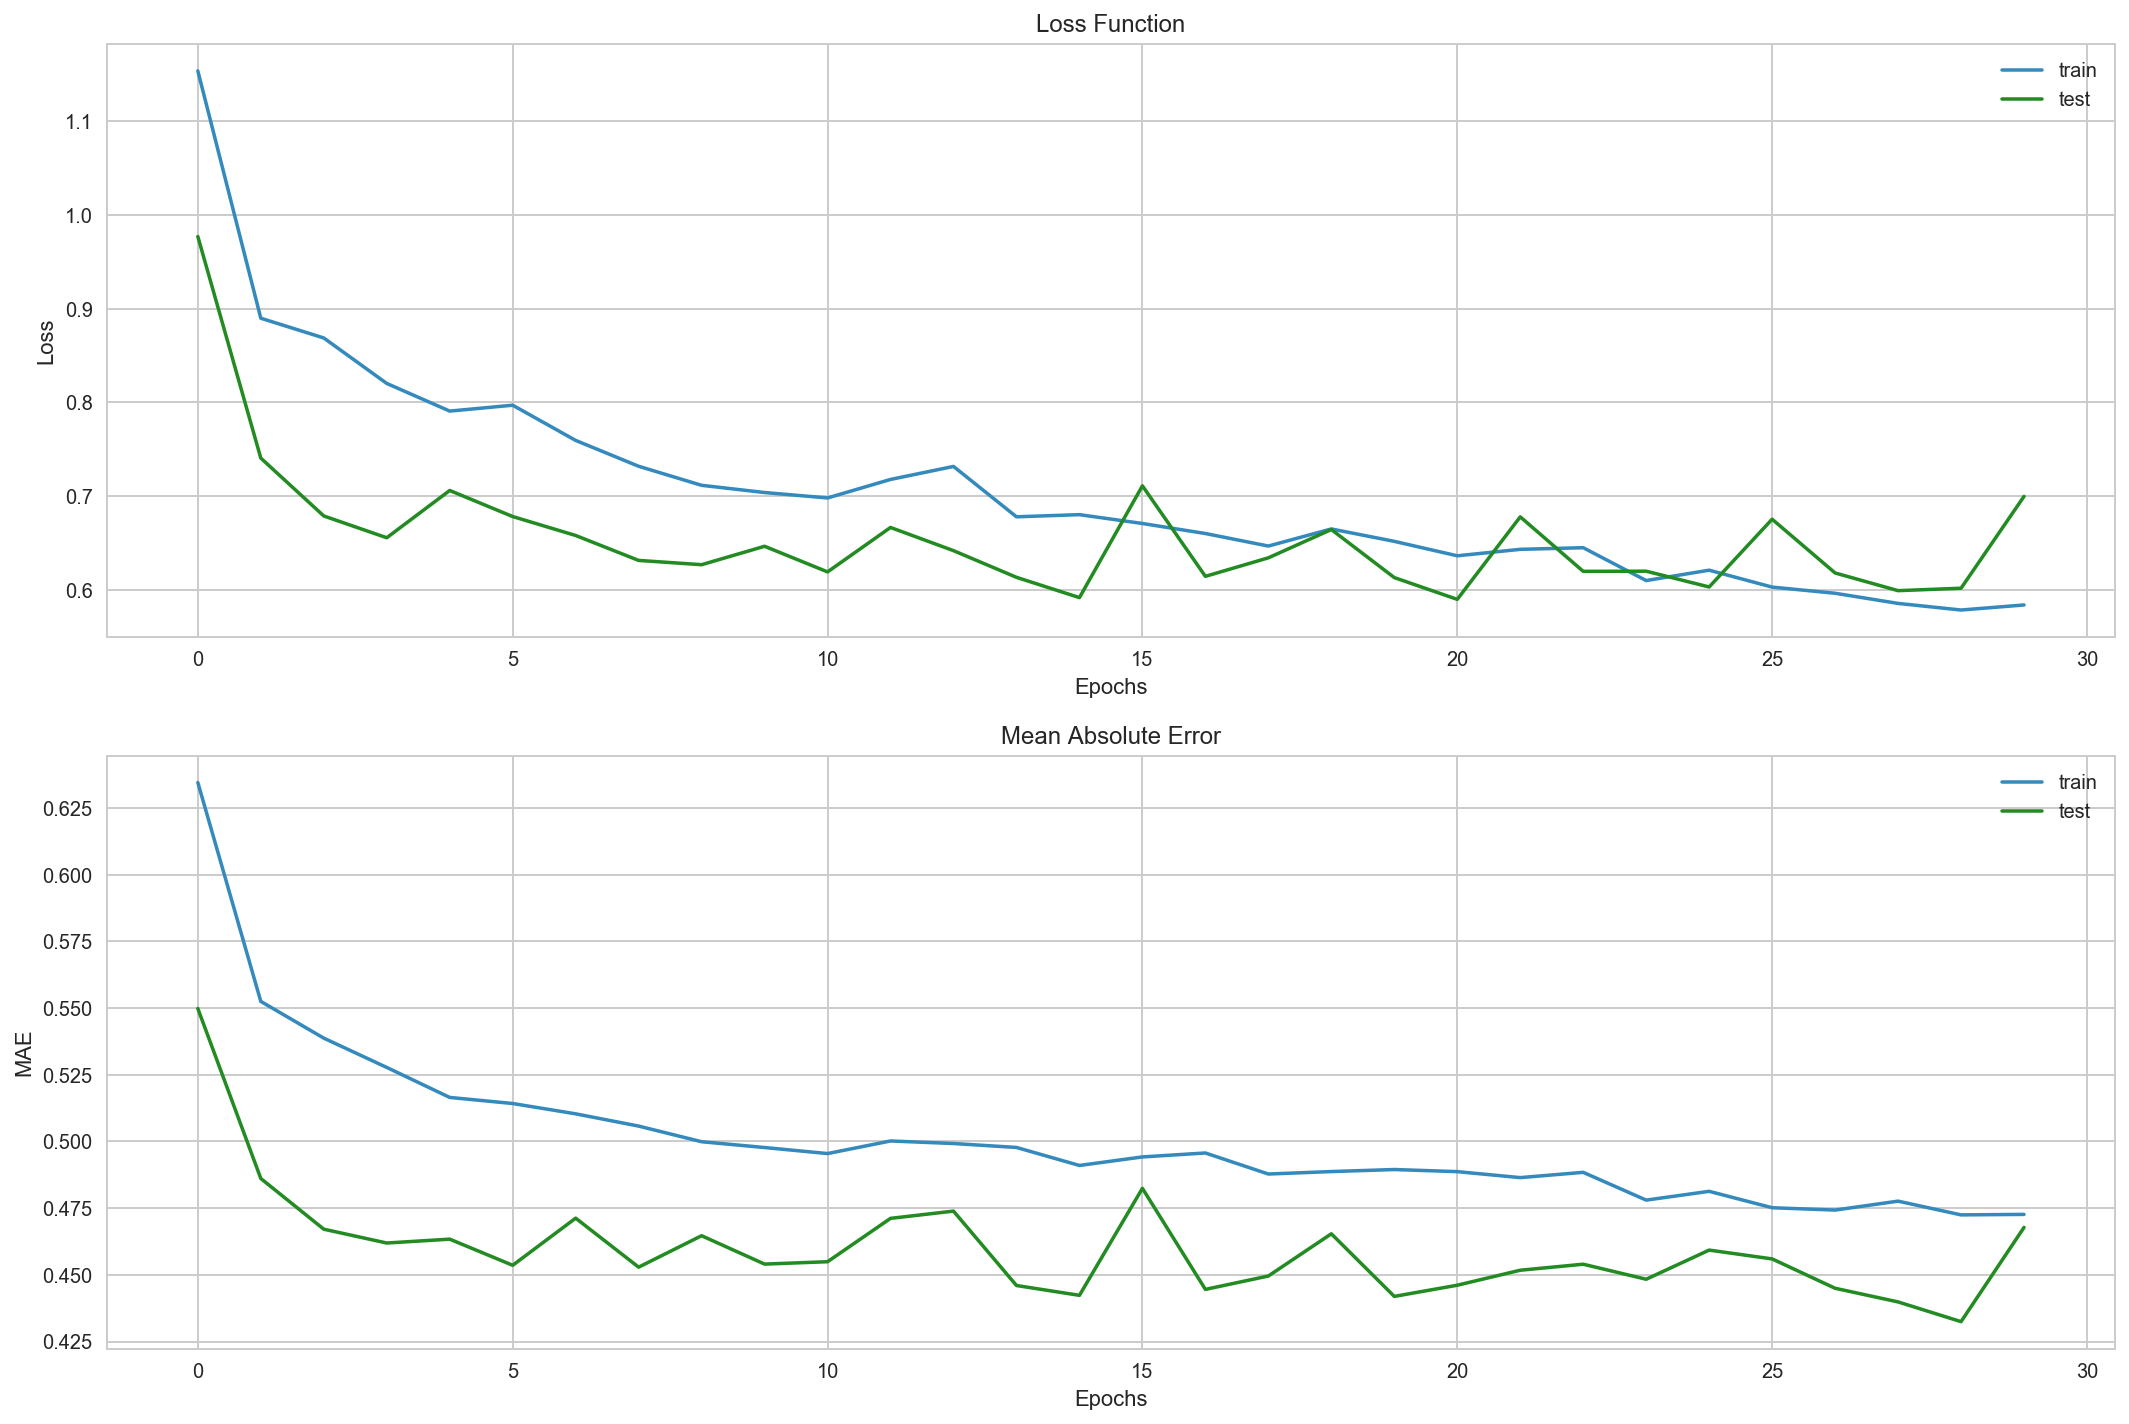

In [92]:
hide_code
# Plot the fitting history
history_plot(cnn_cat_history)

In [93]:
hide_code
# Load the best model results
cnn_cat_model.load_weights('weights.best.cnn_cat.hdf5')
# Create predictions
y_train_cat_cnn = cnn_cat_model.predict(X_train_cat.reshape(-1, 44, 1))
y_test_cat_cnn = cnn_cat_model.predict(X_test_cat.reshape(-1, 44, 1))
# Save the model
cnn_cat_model.save('cnn_cat_model_p6.h5')
# Display metrics
print(separator, '\nNumeric and Categorical Features')
scores('CNN Model', 
       y_train_cat, y_test_cat, y_train_cat_cnn, y_test_cat_cnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.726747213858
EV score. Test:  0.705324729462
----------
R2 score. Train:  0.726689734013
R2 score. Test:  0.70530614092
----------
MSE score. Train:  0.497036463272
MSE score. Test:  0.589654087693
----------
MAE score. Train:  0.423219330422
MAE score. Test:  0.446114645486
----------
MdAE score. Train:  0.21339753681
MdAE score. Test:  0.222501244565


In [94]:
hide_code
# Create the sequential model
def cnn_cat_enc_model():
    model = Sequential()
        
    model.add(Conv1D(159, 5, padding='valid', activation='relu', input_shape=(636, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(318, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(636, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
    return model

cnn_cat_enc_model = cnn_cat_enc_model()
# Create the checkpointer for saving the best results
cnn_cat_enc_checkpointer = ModelCheckpoint(filepath='weights.best.cnn_cat_enc.hdf5', 
                                           verbose=2, save_best_only=True)
# Fit the model
cnn_cat_enc_history = \
cnn_cat_enc_model.fit(X_train_cat_enc.reshape(-1, 636, 1), y_train_cat_enc, 
                      epochs=20, batch_size=128, verbose=0, callbacks=[cnn_cat_enc_checkpointer],
                      validation_data=(X_test_cat_enc.reshape(-1, 636, 1), y_test_cat_enc))

Epoch 00000: val_loss improved from inf to 0.81885, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00001: val_loss improved from 0.81885 to 0.70993, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00002: val_loss improved from 0.70993 to 0.69964, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00003: val_loss improved from 0.69964 to 0.68743, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00004: val_loss improved from 0.68743 to 0.68518, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00005: val_loss improved from 0.68518 to 0.62465, saving model to weights.best.cnn_cat_enc.hdf5
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss improved from 0.62465 to 0.61656, saving model to weights.best.cnn

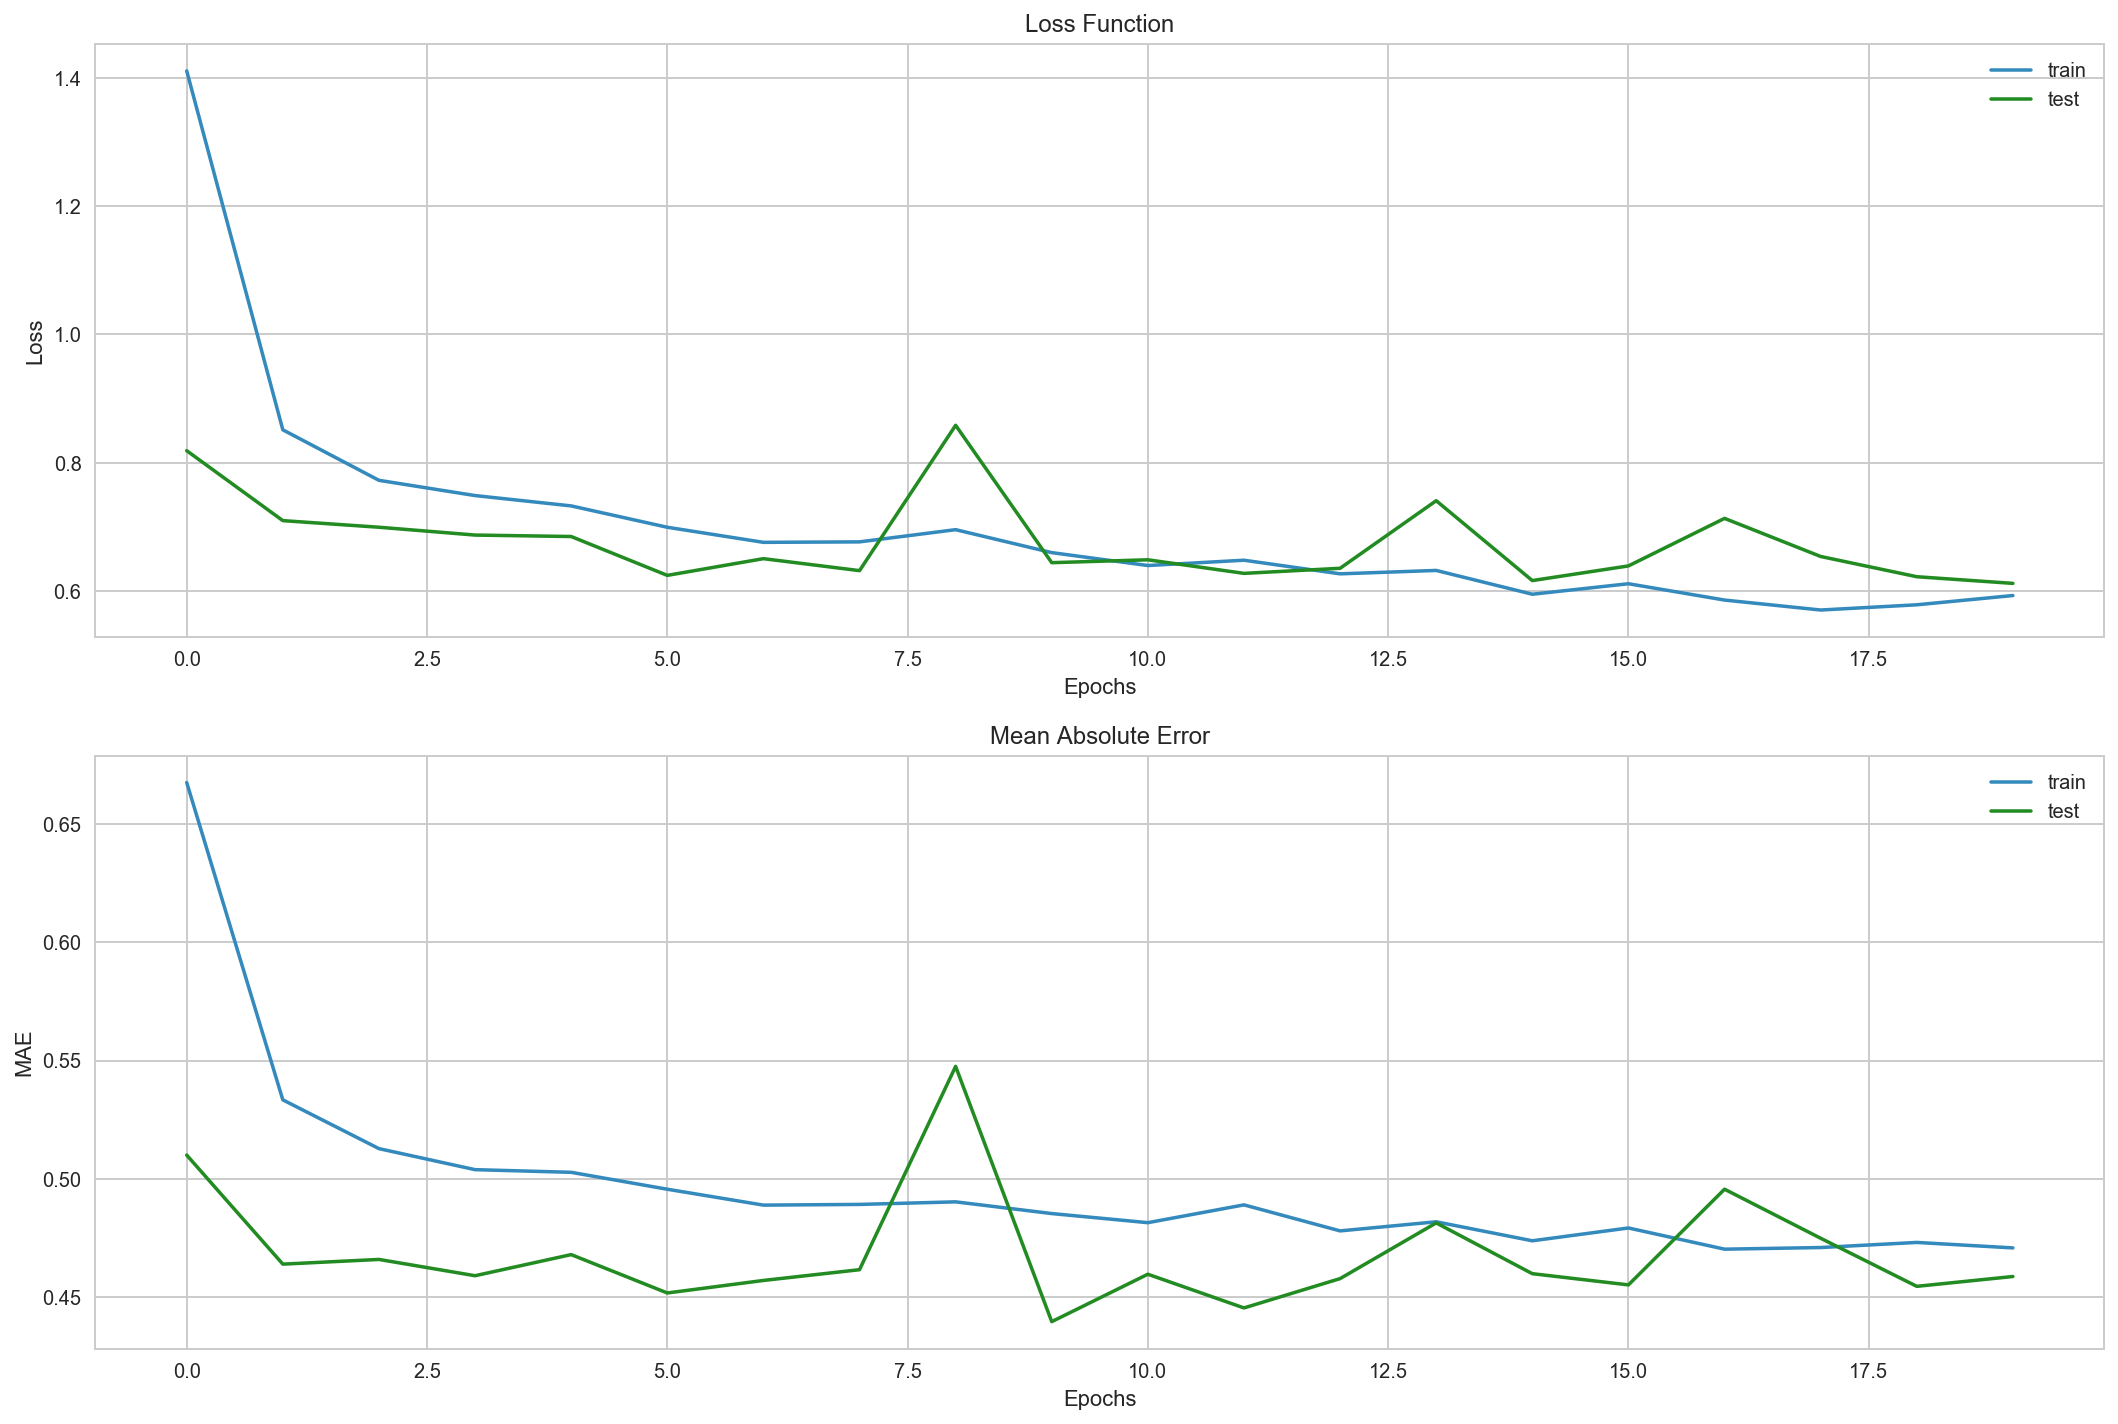

In [95]:
hide_code
# Plot the fitting history
history_plot(cnn_cat_enc_history)

In [96]:
hide_code
# Load the best model results
cnn_cat_enc_model.load_weights('weights.best.cnn_cat_enc.hdf5')
# Create predictions
y_train_cat_enc_cnn = cnn_cat_enc_model.predict(X_train_cat_enc.reshape(-1, 636, 1))
y_test_cat_enc_cnn = cnn_cat_enc_model.predict(X_test_cat_enc.reshape(-1, 636, 1))
# Save the model
cnn_cat_enc_model.save('cnn_cat_enc_model_p6.h5')
# Display metrics
print(separator, '\nNumeric and Encoded Categorical Features')
scores('CNN Model', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_cnn, y_test_cat_enc_cnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.740213985021
EV score. Test:  0.694149939998
----------
R2 score. Train:  0.739713011479
R2 score. Test:  0.694042040196
----------
MSE score. Train:  0.473352597069
MSE score. Test:  0.612192470599
----------
MAE score. Train:  0.425695059869
MAE score. Test:  0.458683661309
----------
MdAE score. Train:  0.235702102509
MdAE score. Test:  0.248886428756


#### RNN

In [101]:
hide_code
# Create the sequential model
def rnn_model():
    model = Sequential()
    
    model.add(LSTM(144, return_sequences=True, input_shape=(1, 36)))
    model.add(LSTM(576, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_model = rnn_model()
# Create the checkpointer for saving the best results
rnn_checkpointer = ModelCheckpoint(filepath='weights.best.rnn.hdf5', 
                                   verbose=2, save_best_only=True)
# Fit the model
rnn_history = rnn_model.fit(X_train.reshape(-1, 1, 36), y_train.reshape(-1), 
                            epochs=7, verbose=0, callbacks=[rnn_checkpointer],
                            validation_data=(X_test.reshape(-1, 1, 36), y_test.reshape(-1)))

Epoch 00000: val_loss improved from inf to 0.69946, saving model to weights.best.rnn.hdf5
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 0.69946 to 0.62356, saving model to weights.best.rnn.hdf5
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve


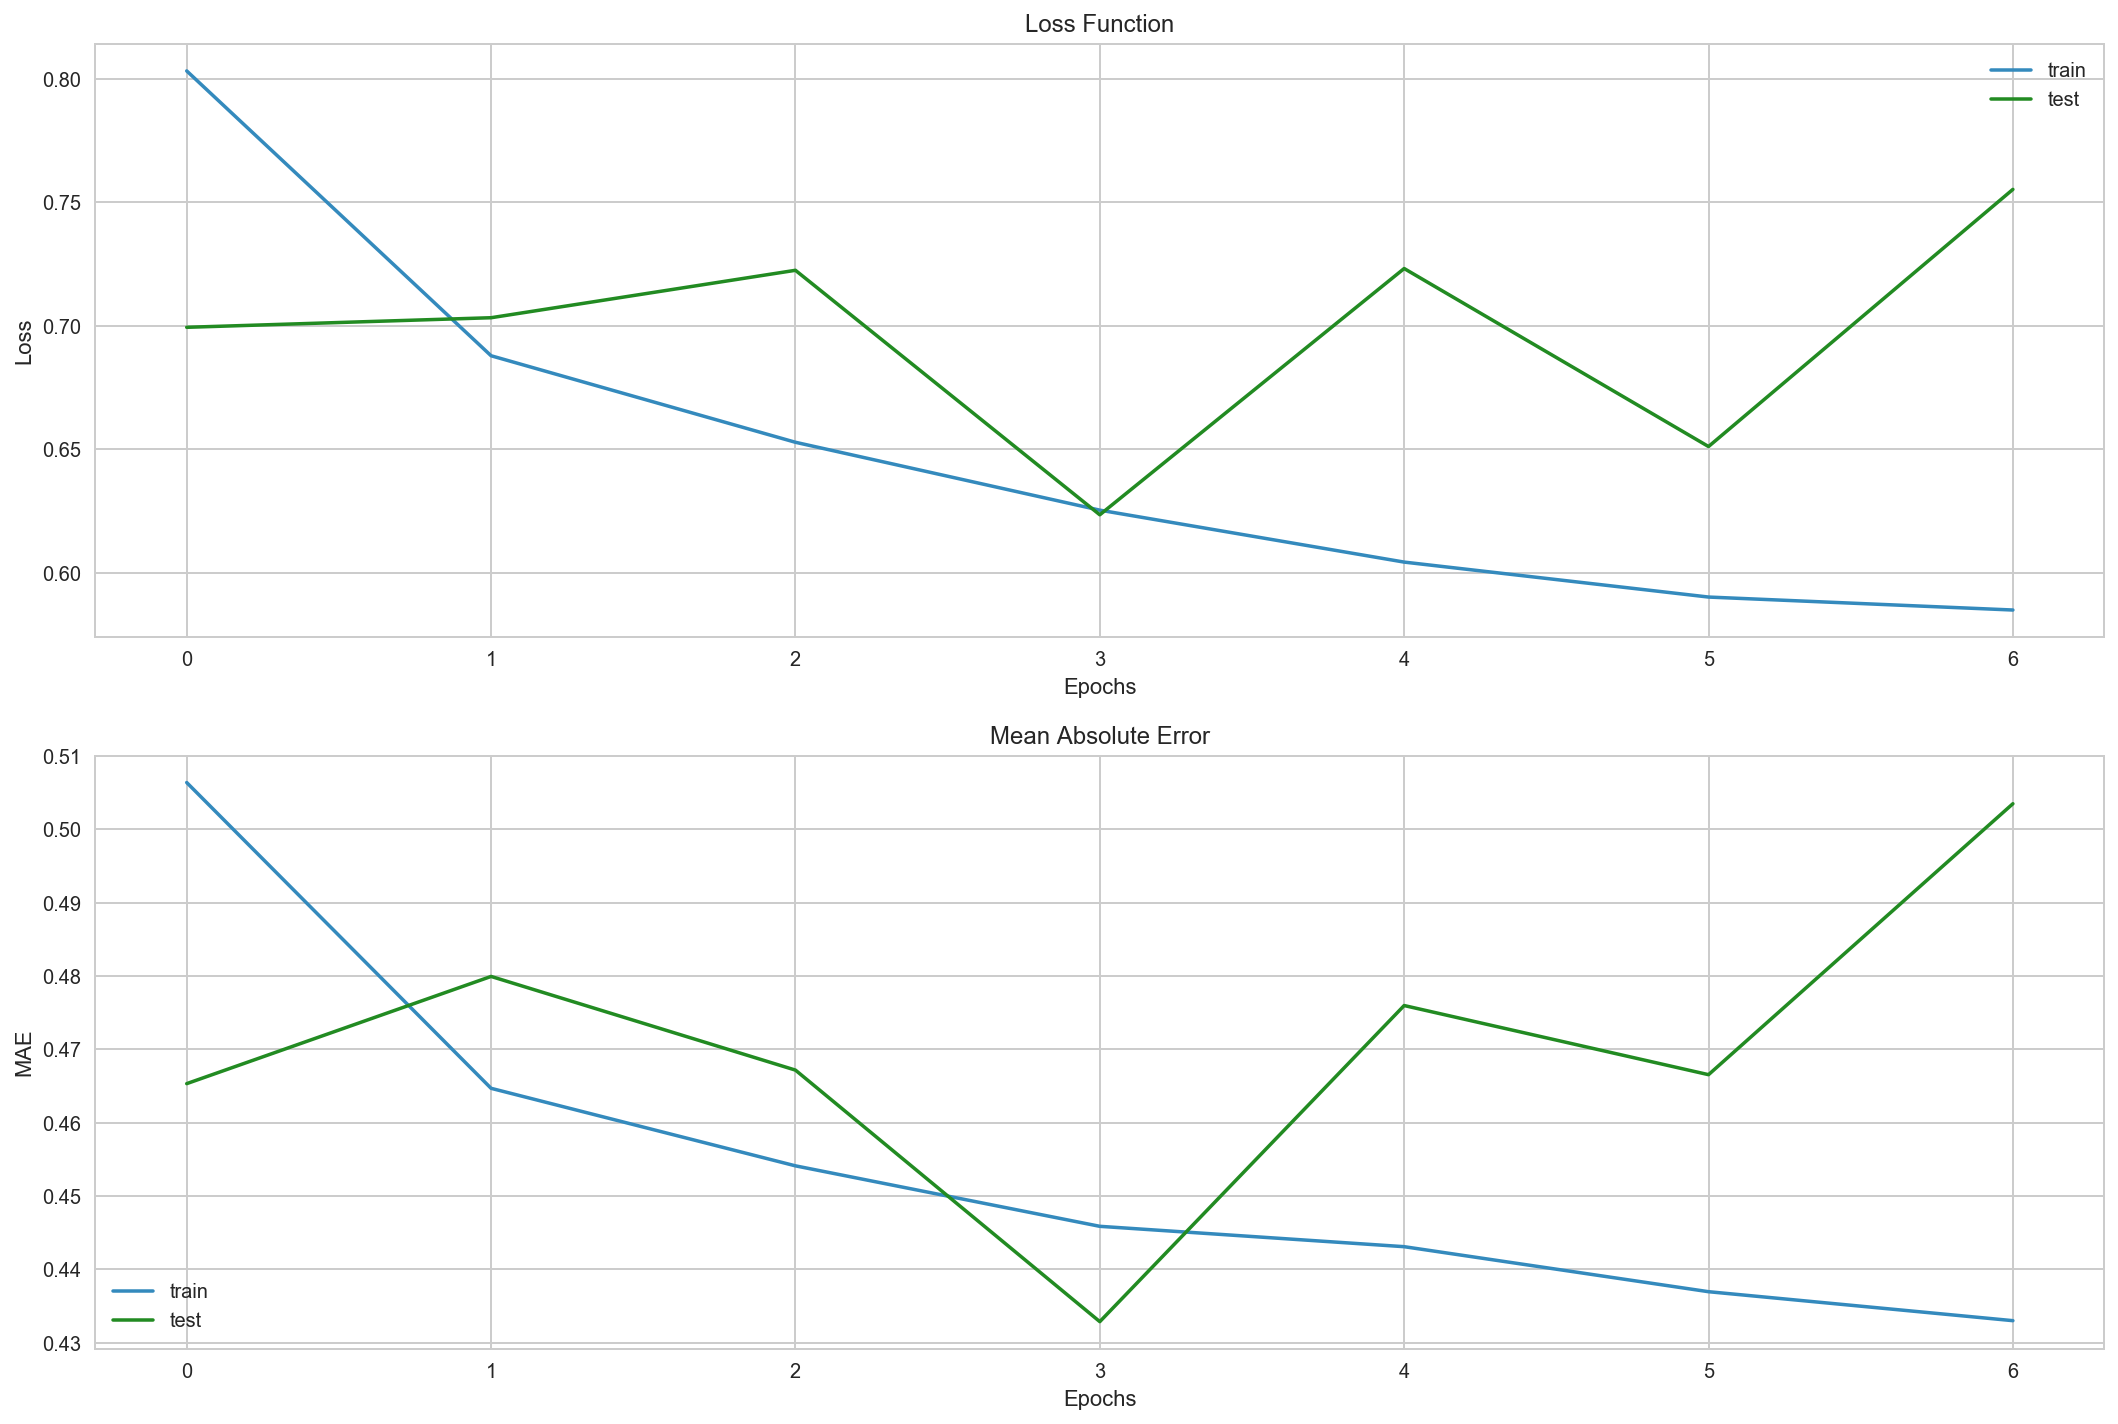

In [102]:
hide_code
# Plot the fitting history
history_plot(rnn_history)

In [103]:
hide_code
# Load the best model results
rnn_model.load_weights('weights.best.rnn.hdf5')
# Create predictions
y_train_rnn = rnn_model.predict(X_train.reshape(-1, 1, 36))
y_test_rnn = rnn_model.predict(X_test.reshape(-1, 1, 36))
# Save the model
rnn_model.save('rnn_model_p6.h5')
# Display metrics
print(separator, '\nNumeric Features')
scores('RNN Model', y_train, y_test, y_train_rnn, y_test_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.67405305021
EV score. Test:  0.689598519092
----------
R2 score. Train:  0.672047755897
R2 score. Test:  0.688359804367
----------
MSE score. Train:  0.596407247794
MSE score. Test:  0.623562078348
----------
MAE score. Train:  0.426937247509
MAE score. Test:  0.432891197263
----------
MdAE score. Train:  0.2195100779
MdAE score. Test:  0.21540676839


In [104]:
hide_code
# Create the sequential model
def rnn_cat_model():
    model = Sequential()
    
    model.add(LSTM(156, return_sequences=True, input_shape=(1, 44)))
    model.add(LSTM(624, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_model = rnn_cat_model()
# Create the checkpointer for saving the best results
rnn_cat_checkpointer = ModelCheckpoint(filepath='weights.best.rnn_cat.hdf5', 
                                       verbose=2, save_best_only=True)
# Fit the model
rnn_cat_history = rnn_cat_model.fit(X_train_cat.reshape(-1, 1, 44), y_train_cat.reshape(-1), 
                                    epochs=10, verbose=0, callbacks=[rnn_cat_checkpointer],
                                    validation_data=(X_test_cat.reshape(-1, 1, 44), y_test_cat.reshape(-1)))

Epoch 00000: val_loss improved from inf to 0.65782, saving model to weights.best.rnn_cat.hdf5
Epoch 00001: val_loss improved from 0.65782 to 0.63826, saving model to weights.best.rnn_cat.hdf5
Epoch 00002: val_loss improved from 0.63826 to 0.62570, saving model to weights.best.rnn_cat.hdf5
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss improved from 0.62570 to 0.61207, saving model to weights.best.rnn_cat.hdf5


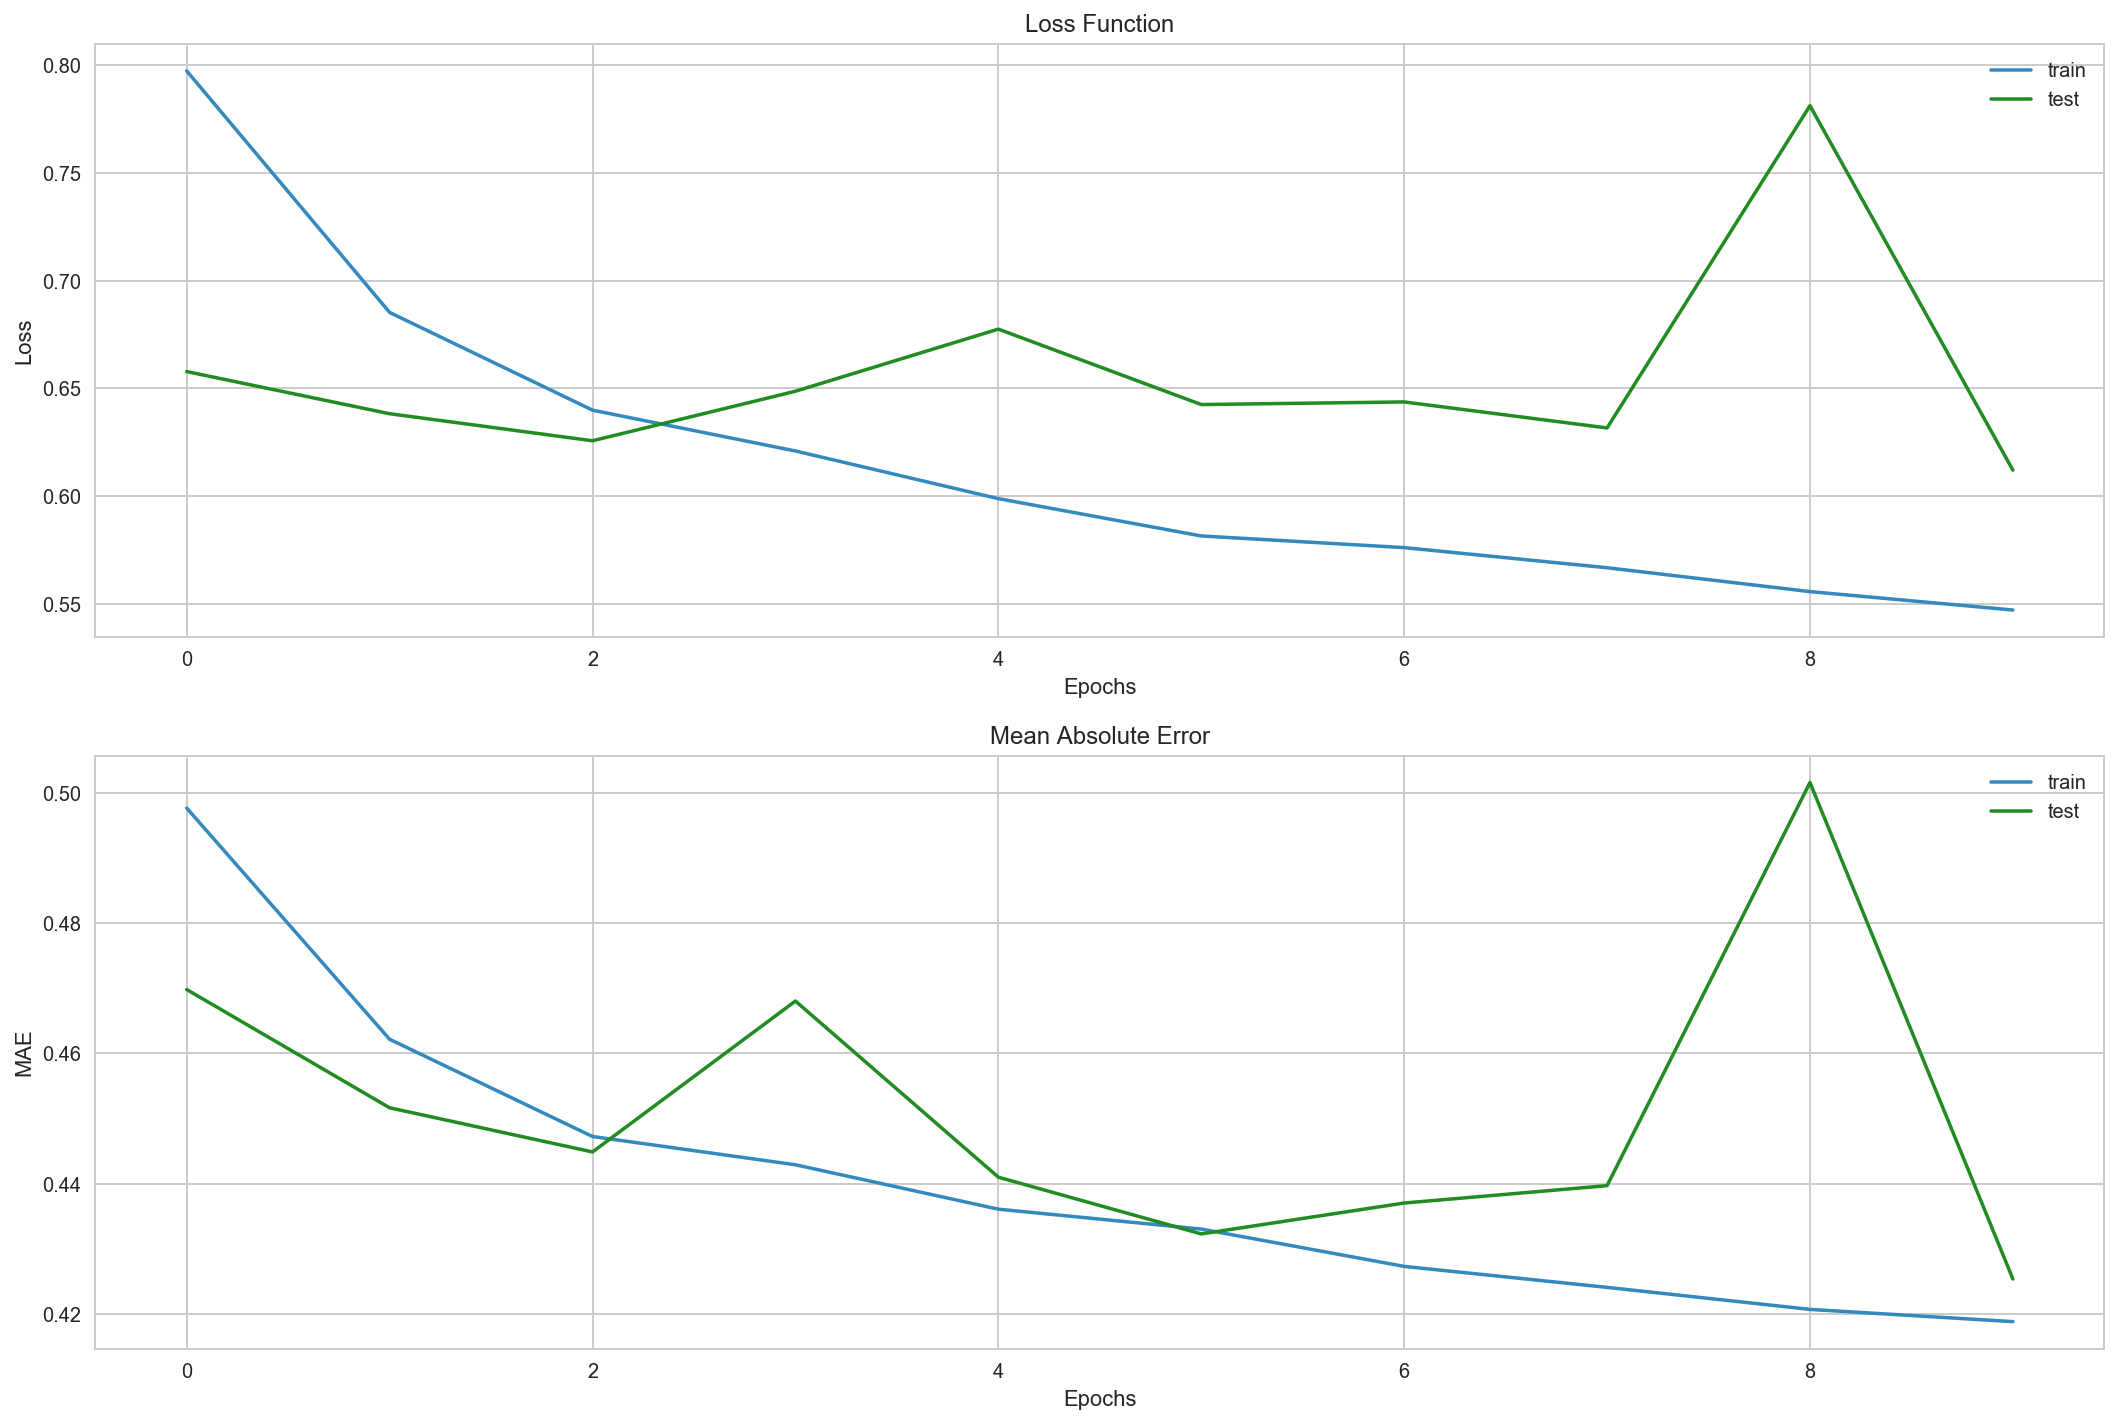

In [105]:
hide_code
# Plot the fitting history
history_plot(rnn_cat_history)

In [106]:
hide_code
# Load the best model results
rnn_cat_model.load_weights('weights.best.rnn_cat.hdf5')
# Create predictions
y_train_cat_rnn = rnn_cat_model.predict(X_train_cat.reshape(-1, 1, 44))
y_test_cat_rnn = rnn_cat_model.predict(X_test_cat.reshape(-1, 1, 44))
# Save the model
rnn_cat_model.save('rnn_cat_model_p6.h5')
# Display metrics
print(separator, '\nNumeric and Categorical Features')
scores('RNN Model', 
       y_train_cat, y_test_cat, y_train_cat_rnn, y_test_cat_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.720378705729
EV score. Test:  0.694678442152
----------
R2 score. Train:  0.719266482075
R2 score. Test:  0.694105279262
----------
MSE score. Train:  0.510536237516
MSE score. Test:  0.612065935306
----------
MAE score. Train:  0.404334050848
MAE score. Test:  0.425333059647
----------
MdAE score. Train:  0.206248915328
MdAE score. Test:  0.219756308573


In [113]:
hide_code
# Create the sequential model
def rnn_cat_enc_model():
    model = Sequential()
    
    model.add(LSTM(159, return_sequences=True, input_shape=(1, 636)))
    model.add(LSTM(636, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model 

rnn_cat_enc_model = rnn_cat_enc_model()
# Create the checkpointer for saving the best results
rnn_cat_enc_checkpointer = ModelCheckpoint(filepath='weights.best.rnn_cat_enc.hdf5', 
                                           verbose=2, save_best_only=True)
# Fit the model
rnn_cat_enc_history = \
rnn_cat_enc_model.fit(X_train_cat_enc.reshape(-1, 1, 636), y_train_cat_enc.reshape(-1), 
                      epochs=10, verbose=0, callbacks=[rnn_cat_enc_checkpointer],
                      validation_data=(X_test_cat_enc.reshape(-1, 1, 636), y_test_cat_enc.reshape(-1)))

Epoch 00000: val_loss improved from inf to 0.67299, saving model to weights.best.rnn_cat_enc.hdf5
Epoch 00001: val_loss improved from 0.67299 to 0.60554, saving model to weights.best.rnn_cat_enc.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss improved from 0.60554 to 0.60045, saving model to weights.best.rnn_cat_enc.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.60045 to 0.59203, saving model to weights.best.rnn_cat_enc.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss improved from 0.59203 to 0.58162, saving model to weights.best.rnn_cat_enc.hdf5


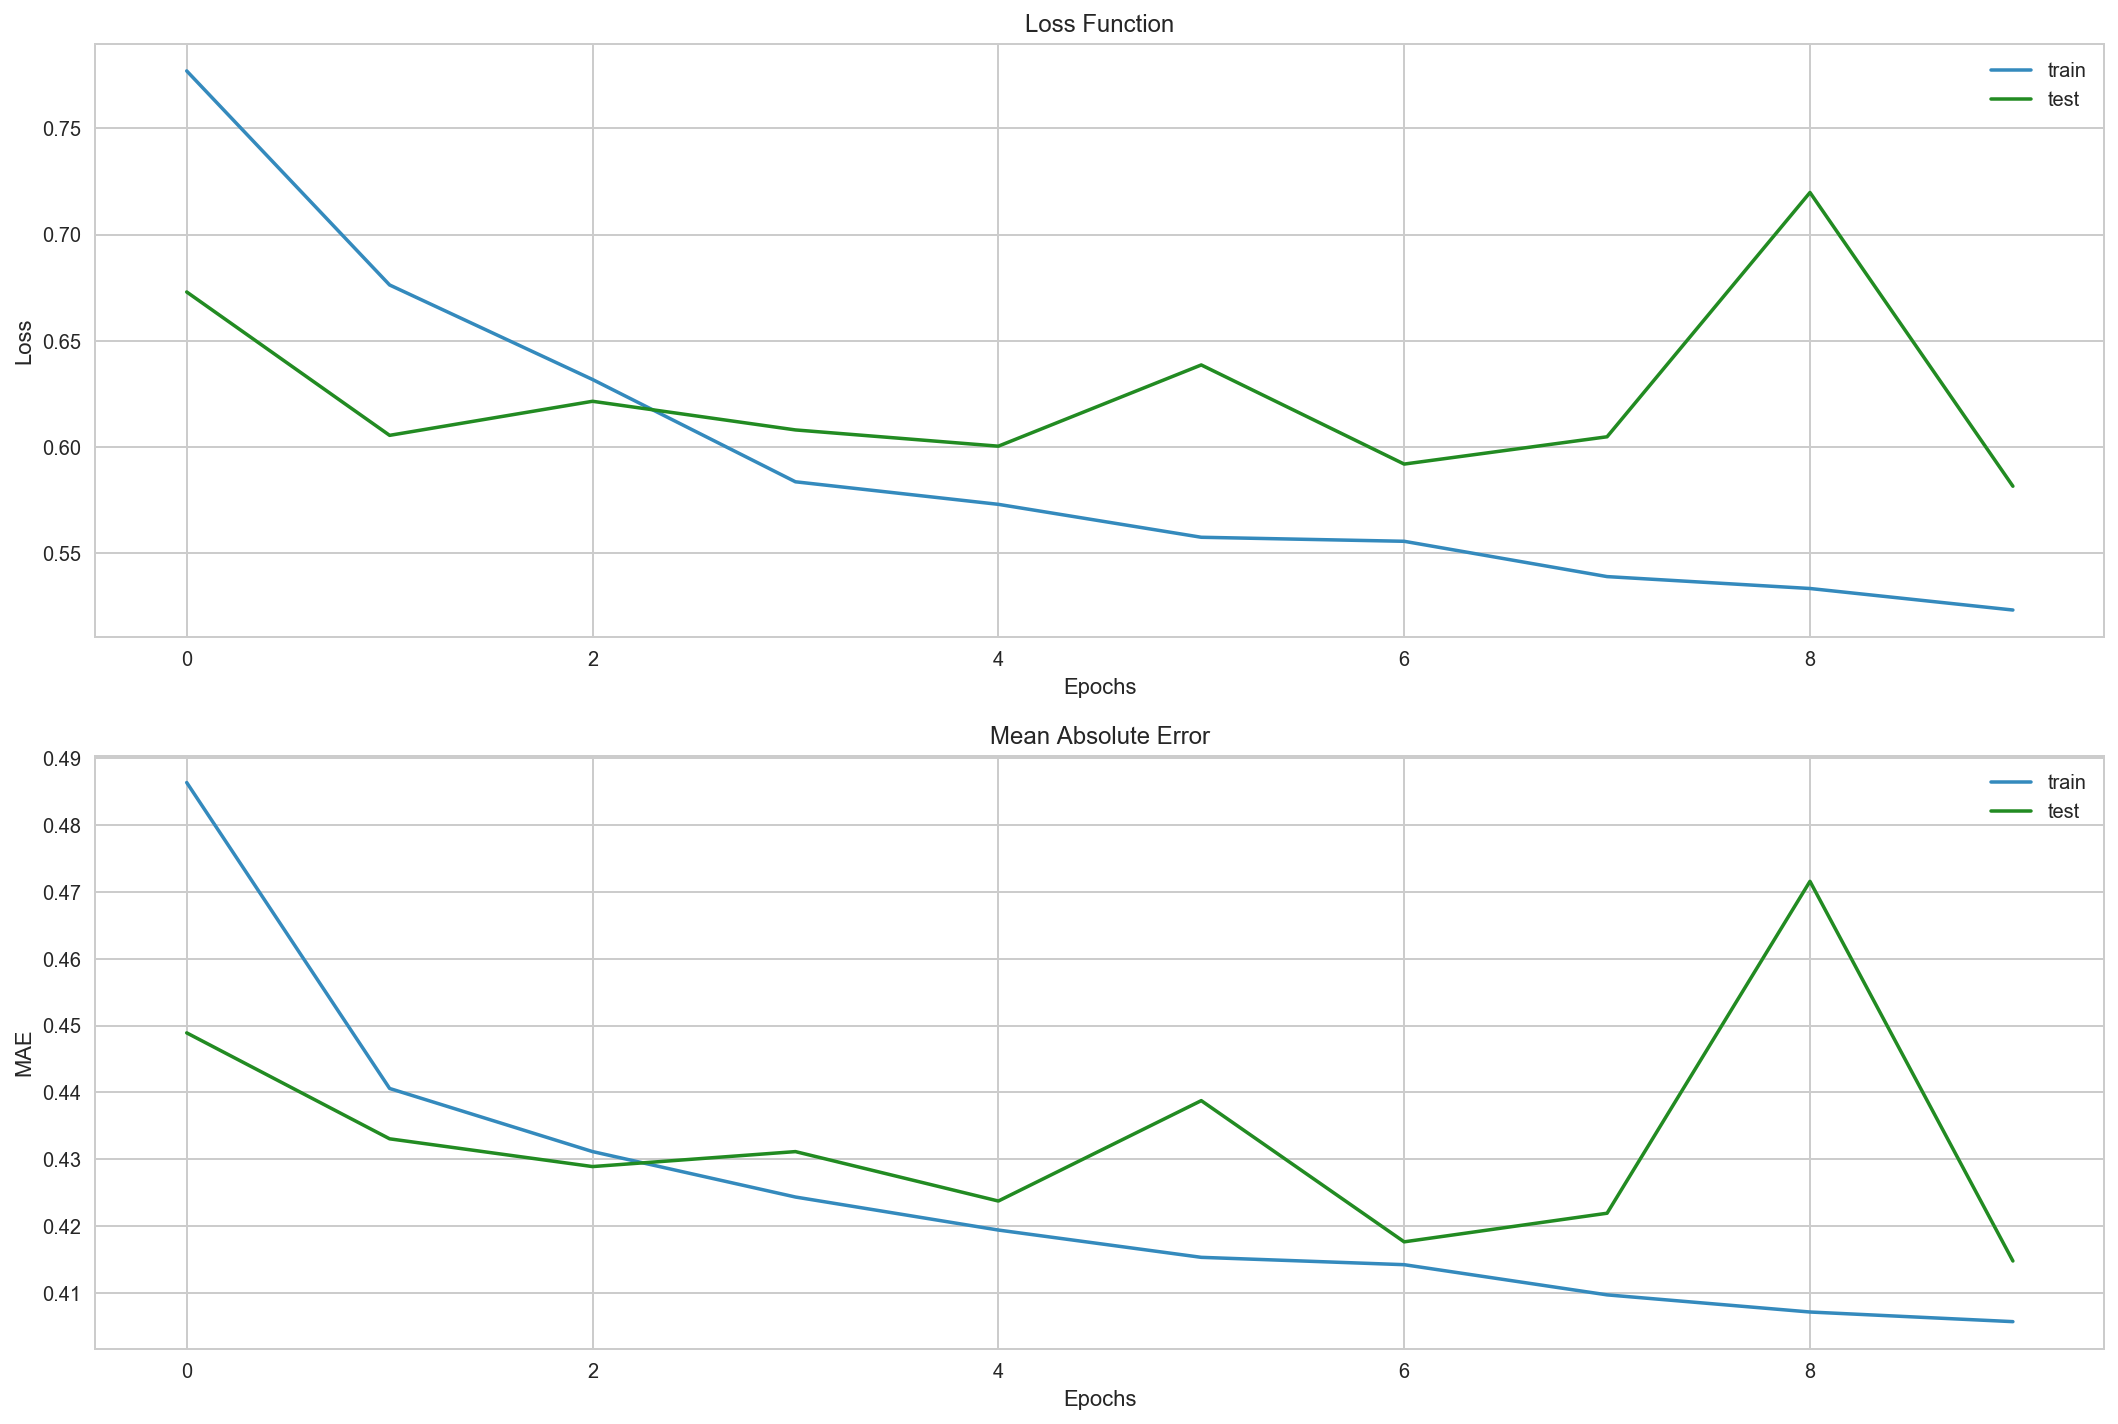

In [114]:
hide_code
# Plot the fitting history
history_plot(rnn_cat_enc_history)

In [115]:
hide_code
# Load the best model results
rnn_cat_enc_model.load_weights('weights.best.rnn_cat_enc.hdf5')
# Create predictions
y_train_cat_enc_rnn = rnn_cat_enc_model.predict(X_train_cat_enc.reshape(-1, 1, 636))
y_test_cat_enc_rnn = rnn_cat_enc_model.predict(X_test_cat_enc.reshape(-1, 1, 636))
# Save the model
rnn_cat_enc_model.save('rnn_cat_enc_model_p6.h5')
# Display metrics
print(separator, '\nNumeric and Encoded Categorical Features')
scores('RNN Model', 
       y_train_cat_enc, y_test_cat_enc, y_train_cat_enc_rnn, y_test_cat_enc_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN Model 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train:  0.739230103807
EV score. Test:  0.70940135106
----------
R2 score. Train:  0.739226532816
R2 score. Test:  0.709323171628
----------
MSE score. Train:  0.474237297221
MSE score. Test:  0.581616395342
----------
MAE score. Train:  0.383939769297
MAE score. Test:  0.414738278504
----------
MdAE score. Train:  0.193722330332
MdAE score. Test:  0.20408428843


#### Display Predictions

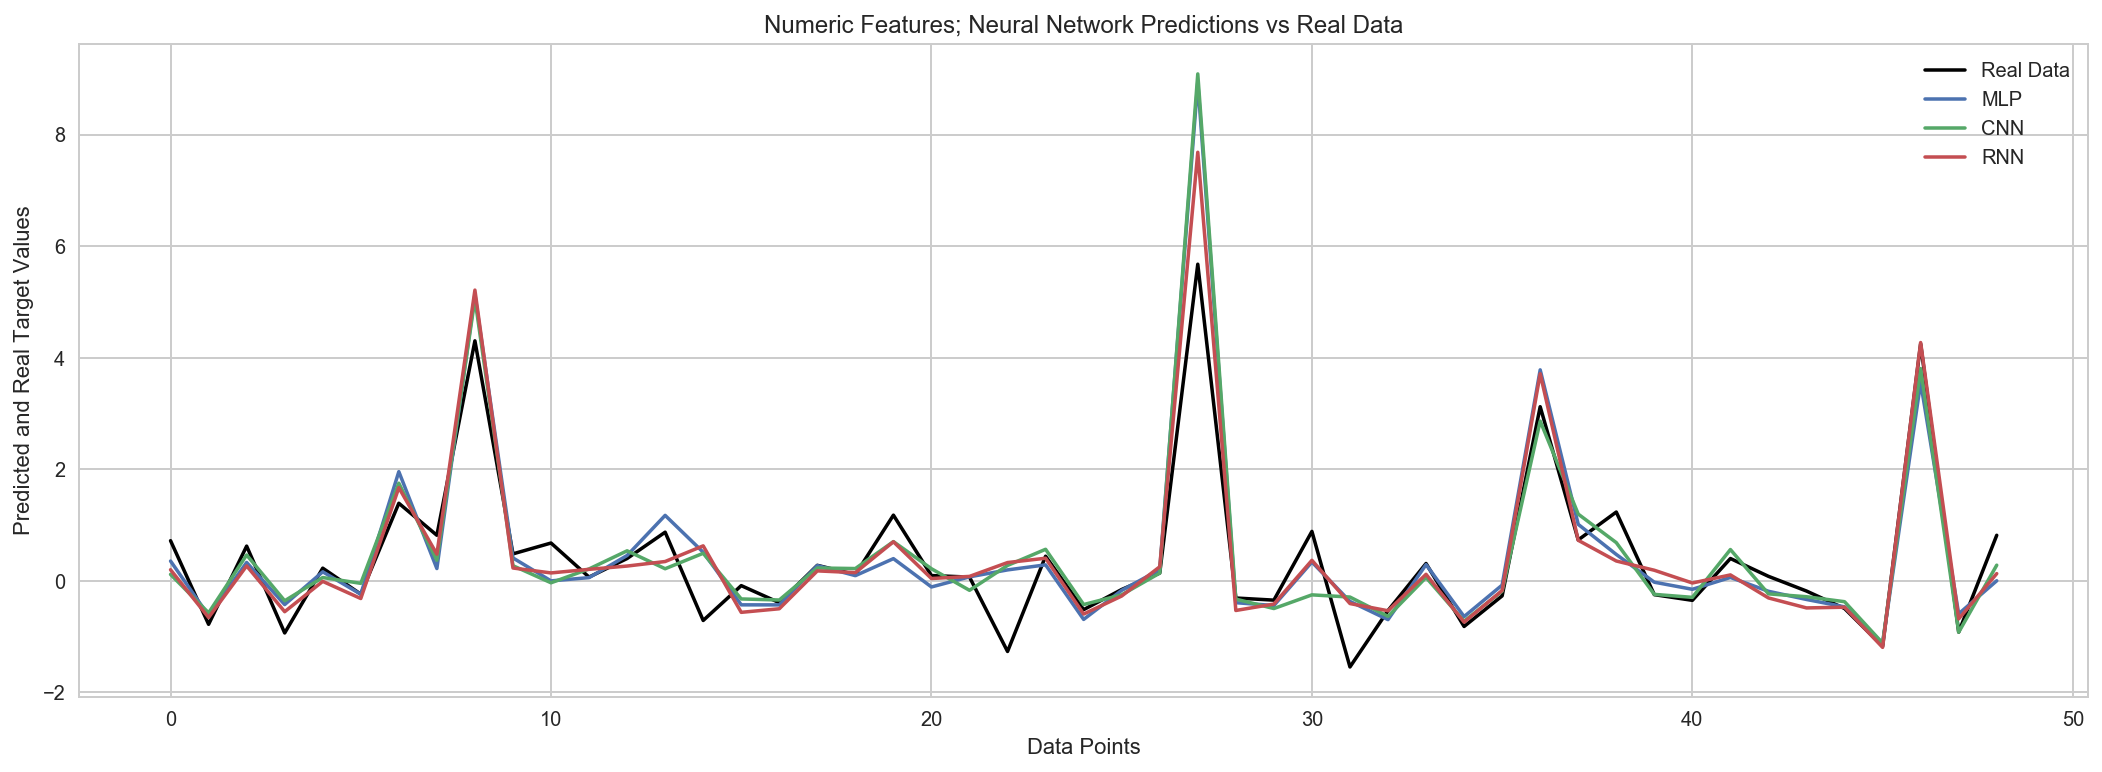

In [107]:
hide_code
# Plot predicted values and real data points
plt.figure(figsize = (18, 6))
plt.plot(y_test[1:50], color = 'black', label='Real Data')

plt.plot(y_test_mlp[1:50], label='MLP')
plt.plot(y_test_cnn[1:50], label='CNN')
plt.plot(y_test_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric Features; Neural Network Predictions vs Real Data");

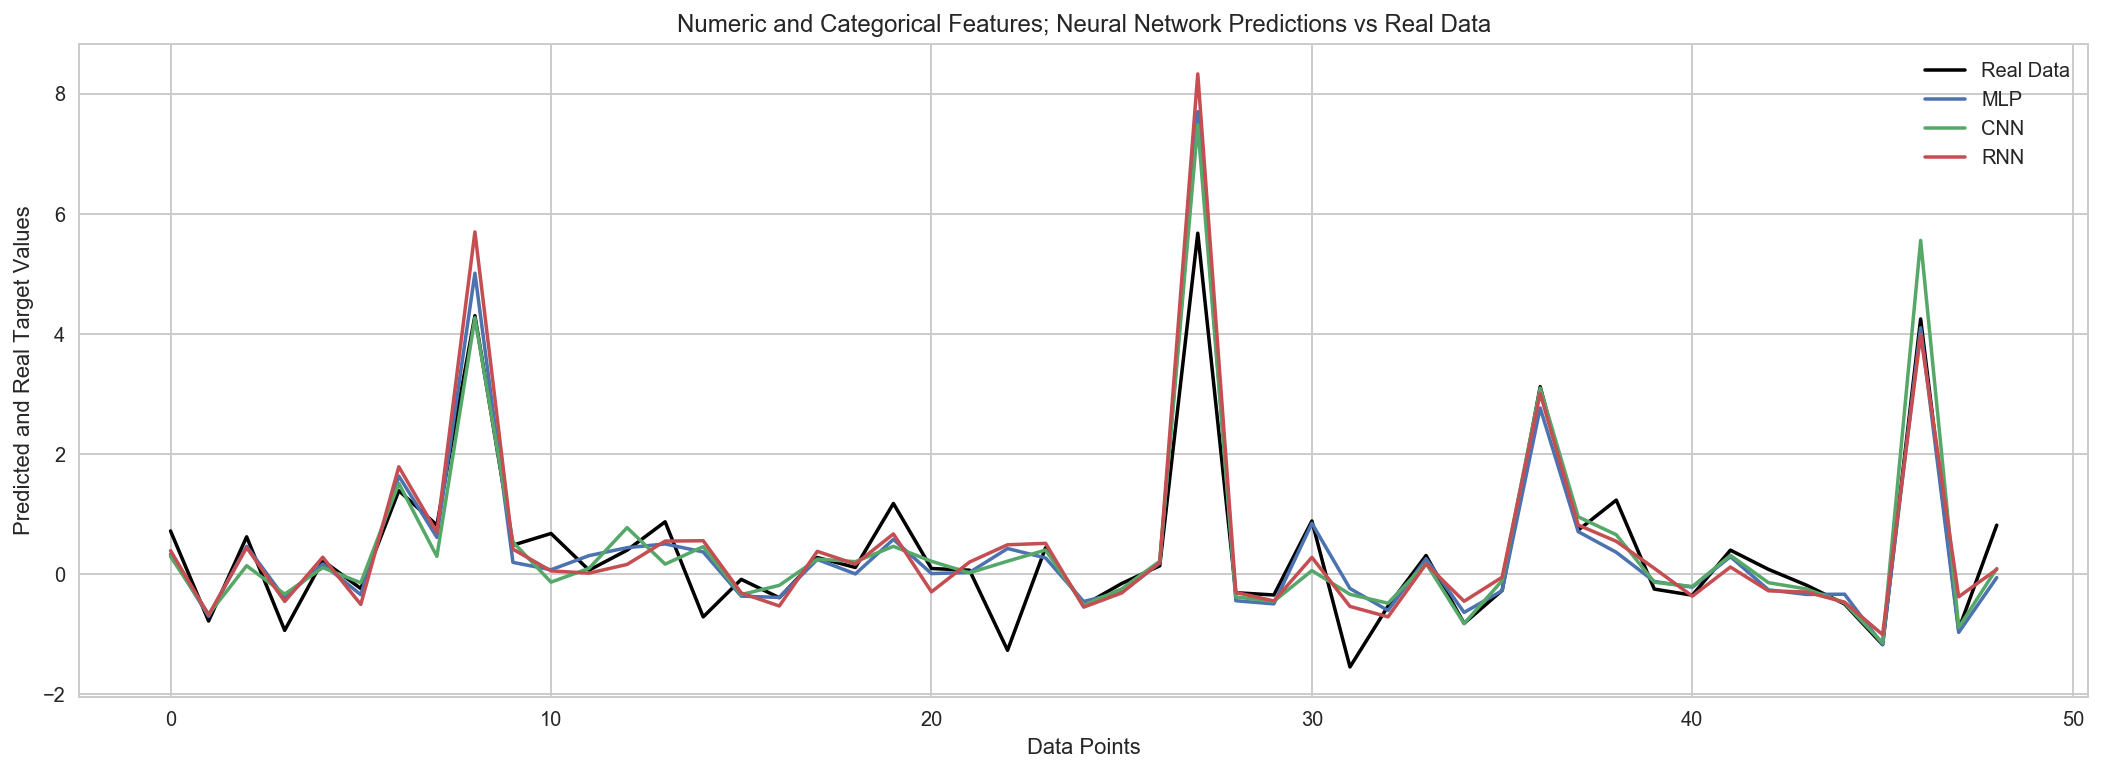

In [108]:
hide_code
# Plot predicted values and real data points
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_mlp[1:50], label='MLP')
plt.plot(y_test_cat_cnn[1:50], label='CNN')
plt.plot(y_test_cat_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric and Categorical Features; Neural Network Predictions vs Real Data");

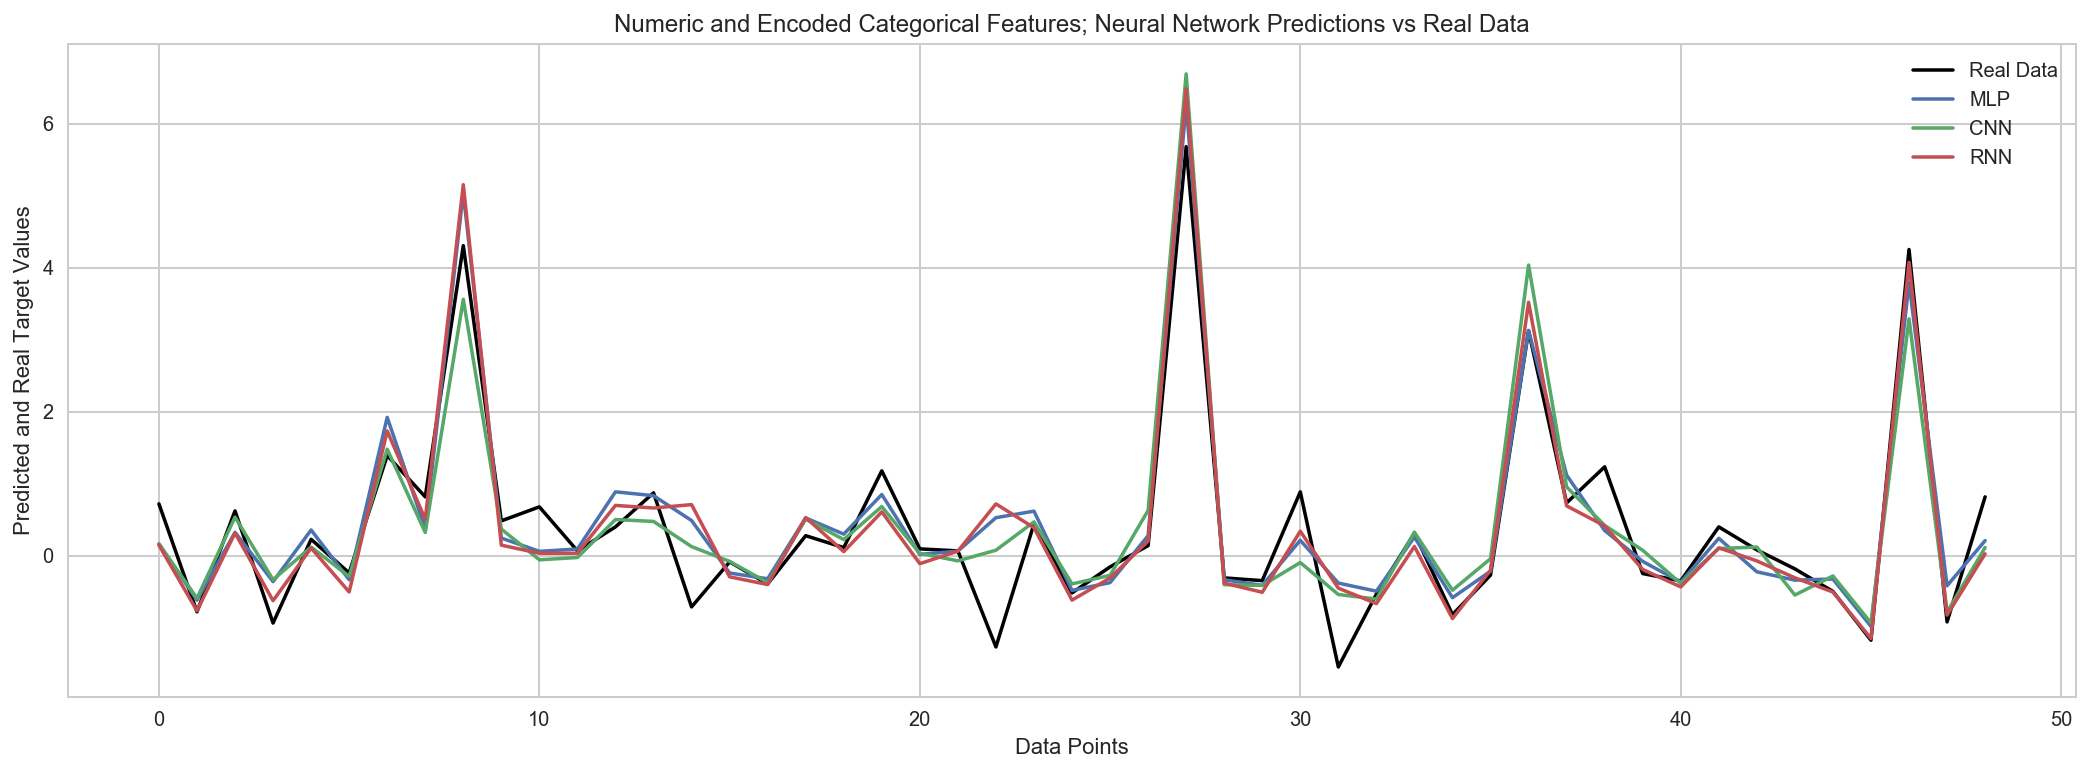

In [116]:
hide_code
# Plot predicted values and real data points
plt.figure(figsize = (18, 6))
plt.plot(y_test_cat[1:50], color = 'black', label='Real Data')

plt.plot(y_test_cat_enc_mlp[1:50], label='MLP')
plt.plot(y_test_cat_enc_cnn[1:50], label='CNN')
plt.plot(y_test_cat_enc_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric and Encoded Categorical Features; Neural Network Predictions vs Real Data");

## Evaluation Metrics and Predictions
- [`explained variance regression score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score)
- [`coefficient of determination`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)
- [`mean squared error`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
- [`mean absolute error`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
- [`median absolute error`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error)

Evaluation metrics capture different properties of the prediction performance: how well the model explains the target variance and makes predictions, how far the predictions are from the real values. It allows us to choose the best algorithm by comparing many indicators. 

In [109]:
hide_code
# Scale the whole dataset
target_scale = RobustScaler()
s_target_train = target_scale.fit_transform(target_train.reshape(-1,1))
######################################################################################
feature_scale = RobustScaler()
s_features_train = feature_scale.fit_transform(features_train)
s_features_test = feature_scale.transform(features_test)
######################################################################################
feature_cat_scale = RobustScaler()
s_features_train_cat = feature_cat_scale.fit_transform(features_train_cat)
s_features_test_cat = feature_cat_scale.transform(features_test_cat)
######################################################################################
feature_cat_enc_scale = RobustScaler()
s_features_train_cat_enc = feature_cat_enc_scale.fit_transform(features_train_cat_enc)
s_features_test_cat_enc = feature_cat_enc_scale.transform(features_test_cat_enc)

### Regressors; Scikit-Learn
#### Numeric Features

In [110]:
hide_code
# Fit the Regressors
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=360)
gbr.fit(s_features_train, s_target_train)
br = BaggingRegressor(n_estimators=360)
br.fit(s_features_train, s_target_train)
# Create predictions
s_target_train_gbr = gbr.predict(s_features_train)
s_target_test_gbr = gbr.predict(s_features_test)
s_target_train_br = br.predict(s_features_train)
s_target_test_br = br.predict(s_features_test)
s_target_train_mlpr = mlpr.predict(s_features_train)
s_target_test_mlpr = mlpr.predict(s_features_test)
# Display metrics
scores2('Gradient Boosting Regressor', s_target_train, s_target_train_gbr)
scores2('Bagging Regressor', s_target_train, s_target_train_br)
scores2('MLP Regressor', s_target_train, s_target_train_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Gradient Boosting Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.851729559483
----------
R2 score: 0.851729559483
----------
MSE score: 0.273663122104
----------
MAE score: 0.324355312761
----------
MdAE score: 0.17539487972
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Bagging Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.95850393243
----------
R2 score: 0.958479485667
----------
MSE score: 0.0766345169276
----------
MAE score: 0.144299144987
----------
MdAE score: 0.0632429903765
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.692064614945
----------
R2 score: 0.692053341016
----------
MSE score: 0.568377917035
----------
MAE score: 0.430736932351
----------
MdAE score: 0.238839315412


#### Numeric and Categorical Features

In [111]:
hide_code
# Fit the Regressors
gbr_cat = GradientBoostingRegressor(max_depth=3, n_estimators=396)
gbr_cat.fit(s_features_train_cat, s_target_train)
br_cat = BaggingRegressor(n_estimators=308)
br_cat.fit(s_features_train_cat, s_target_train)
# Create predictions
s_target_train_cat_gbr = gbr_cat.predict(s_features_train_cat)
s_target_test_cat_gbr = gbr_cat.predict(s_features_test_cat)
s_target_train_cat_br = br_cat.predict(s_features_train_cat)
s_target_test_cat_br = br_cat.predict(s_features_test_cat)
s_target_train_cat_mlpr = mlpr_cat.predict(s_features_train_cat)
s_target_test_cat_mlpr = mlpr_cat.predict(s_features_test_cat)
# Display metrics
scores2('Gradient Boosting Regressor', s_target_train, s_target_train_cat_gbr)
scores2('Bagging Regressor', s_target_train, s_target_train_cat_br)
scores2('MLP Regressor', s_target_train, s_target_train_cat_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Gradient Boosting Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.813227343634
----------
R2 score: 0.813227343634
----------
MSE score: 0.344726757987
----------
MAE score: 0.357167721423
----------
MdAE score: 0.190744564286
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Bagging Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.957835071358
----------
R2 score: 0.957808762631
----------
MSE score: 0.0778724721096
----------
MAE score: 0.144510376607
----------
MdAE score: 0.0627813967251
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.712414402875
----------
R2 score: 0.712257005057
----------
MSE score: 0.531087963892
----------
MAE score: 0.417796926189
----------
MdAE score: 0.229585027349


#### Numeric and Encoded Categorical Features

In [112]:
hide_code
# Fit the Regressors
gbr_cat_enc = GradientBoostingRegressor(max_depth=4, n_estimators=318)
gbr_cat_enc.fit(s_features_train_cat_enc, s_target_train)
br_cat_enc = BaggingRegressor(n_estimators=159)
br_cat_enc.fit(s_features_train_cat_enc, s_target_train)
# Create predictions
s_target_train_cat_enc_gbr = gbr_cat_enc.predict(s_features_train_cat_enc)
s_target_test_cat_enc_gbr = gbr_cat_enc.predict(s_features_test_cat_enc)
s_target_train_cat_enc_br = br_cat.predict(s_features_train_cat_enc)
s_target_test_cat_enc_br = br_cat.predict(s_features_test_cat_enc)
s_target_train_cat_enc_mlpr = mlpr_cat_enc.predict(s_features_train_cat_enc)
s_target_test_cat_enc_mlpr = mlpr_cat_enc.predict(s_features_test_cat_enc)
# Display metrics
scores2('Gradient Boosting Regressor', s_target_train, s_target_train_cat_enc_gbr)
scores2('Bagging Regressor', s_target_train, s_target_train_cat_enc_br)
scores2('MLP Regressor', s_target_train, s_target_train_cat_enc_mlpr)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Gradient Boosting Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.835548897222
----------
R2 score: 0.835548897222
----------
MSE score: 0.303527810822
----------
MAE score: 0.339775897345
----------
MdAE score: 0.183338754074
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 Bagging Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.922628968835
----------
R2 score: 0.922477330417
----------
MSE score: 0.143083784723
----------
MAE score: 0.199528910545
----------
MdAE score: 0.0930322280142
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP Regressor 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.745053861238
----------
R2 score: 0.745050267713
----------
MSE score: 0.470561357165
----------
MAE score: 0.405331444166
----------
MdAE score: 0.220279470626


### Neural Networks; Keras
#### Numeric Features

In [117]:
hide_code
# Create predictions
s_target_train_mlp = mlp_model.predict(s_features_train)
s_target_test_mlp = mlp_model.predict(s_features_test)
s_target_train_cnn = cnn_model.predict(s_features_train.reshape(-1, 36, 1))
s_target_test_cnn = cnn_model.predict(s_features_test.reshape(-1, 36, 1))
s_target_train_rnn = rnn_model.predict(s_features_train.reshape(-1, 1, 36))
s_target_test_rnn = rnn_model.predict(s_features_test.reshape(-1, 1, 36))
# Display metrics
scores2('MLP', s_target_train, s_target_train_mlp)
scores2('CNN', s_target_train, s_target_train_cnn)
scores2('RNN', s_target_train, s_target_train_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.761783651615
----------
R2 score: 0.761563333271
----------
MSE score: 0.440083150853
----------
MAE score: 0.386517573074
----------
MdAE score: 0.197635491112
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.699149967226
----------
R2 score: 0.698797590823
----------
MSE score: 0.555930038334
----------
MAE score: 0.422961280799
----------
MdAE score: 0.214017019481
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.677314911302
----------
R2 score: 0.675630793764
----------
MSE score: 0.598689053484
----------
MAE score: 0.427292031551
----------
MdAE score: 0.219091205484


#### Numeric and Categorical Features

In [118]:
hide_code
# Create predictions
s_target_train_cat_mlp = mlp_cat_model.predict(s_features_train_cat)
s_target_test_cat_mlp = mlp_cat_model.predict(s_features_test_cat)
s_target_train_cat_cnn = cnn_cat_model.predict(s_features_train_cat.reshape(-1, 44, 1))
s_target_test_cat_cnn = cnn_cat_model.predict(s_features_test_cat.reshape(-1, 44, 1))
s_target_train_cat_rnn = rnn_cat_model.predict(s_features_train_cat.reshape(-1, 1, 44))
s_target_test_cat_rnn = rnn_cat_model.predict(s_features_test_cat.reshape(-1, 1, 44))
# Display metrics
scores2('MLP', s_target_train, s_target_train_cat_mlp)
scores2('CNN', s_target_train, s_target_train_cat_cnn)
scores2('RNN', s_target_train, s_target_train_cat_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.700075627798
----------
R2 score: 0.698330432113
----------
MSE score: 0.556792274332
----------
MAE score: 0.40979485907
----------
MdAE score: 0.202451247452
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.722221568176
----------
R2 score: 0.722179013791
----------
MSE score: 0.512774887609
----------
MAE score: 0.426531735321
----------
MdAE score: 0.214306339162
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.714754260049
----------
R2 score: 0.71384778339
----------
MSE score: 0.528151860352
----------
MAE score: 0.407582791011
----------
MdAE score: 0.208528225119


#### Numeric and Encoded Categorical Features

In [119]:
hide_code
# Create predictions
s_target_train_cat_enc_mlp = mlp_cat_enc_model.predict(s_features_train_cat_enc)
s_target_test_cat_enc_mlp = mlp_cat_enc_model.predict(s_features_test_cat_enc)
s_target_train_cat_enc_cnn = cnn_cat_enc_model.predict(s_features_train_cat_enc.reshape(-1, 636, 1))
s_target_test_cat_enc_cnn = cnn_cat_enc_model.predict(s_features_test_cat_enc.reshape(-1, 636, 1))
s_target_train_cat_enc_rnn = rnn_cat_enc_model.predict(s_features_train_cat_enc.reshape(-1, 1, 636))
s_target_test_cat_enc_rnn = rnn_cat_enc_model.predict(s_features_test_cat_enc.reshape(-1, 1, 636))
# Display metrics
scores2('MLP', s_target_train, s_target_train_cat_enc_mlp)
scores2('CNN', s_target_train, s_target_train_cat_enc_cnn)
scores2('RNN', s_target_train, s_target_train_cat_enc_rnn)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 MLP 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.725615039028
----------
R2 score: 0.723263915486
----------
MSE score: 0.510772481843
----------
MAE score: 0.392063855341
----------
MdAE score: 0.192621934785
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 CNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.730510512817
----------
R2 score: 0.730088194793
----------
MSE score: 0.498176892494
----------
MAE score: 0.431014259236
----------
MdAE score: 0.237569146774
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_> 
 RNN 
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score: 0.732861645547
----------
R2 score: 0.732852866767
----------
MSE score: 0.493074130533
----------
MAE score: 0.390074103896
----------
MdAE score: 0.197011383602


### Display All Predictions

In [120]:
hide_code
# Rescale regressor predictions
target_train_gbr = target_scale.inverse_transform(s_target_train_gbr.reshape(-1,1))
target_test_gbr = target_scale.inverse_transform(s_target_test_gbr.reshape(-1,1))
target_train_br = target_scale.inverse_transform(s_target_train_br.reshape(-1,1))
target_test_br = target_scale.inverse_transform(s_target_test_br.reshape(-1,1))
target_train_mlpr = target_scale.inverse_transform(s_target_train_mlpr.reshape(-1,1))
target_test_mlpr = target_scale.inverse_transform(s_target_test_mlpr.reshape(-1,1))
# Rescale neural network predictions
target_train_mlp = target_scale.inverse_transform(s_target_train_mlp)
target_test_mlp = target_scale.inverse_transform(s_target_test_mlp)
target_train_cnn = target_scale.inverse_transform(s_target_train_cnn)
target_test_cnn = target_scale.inverse_transform(s_target_test_cnn)
target_train_rnn = target_scale.inverse_transform(s_target_train_rnn)
target_test_rnn = target_scale.inverse_transform(s_target_test_rnn)

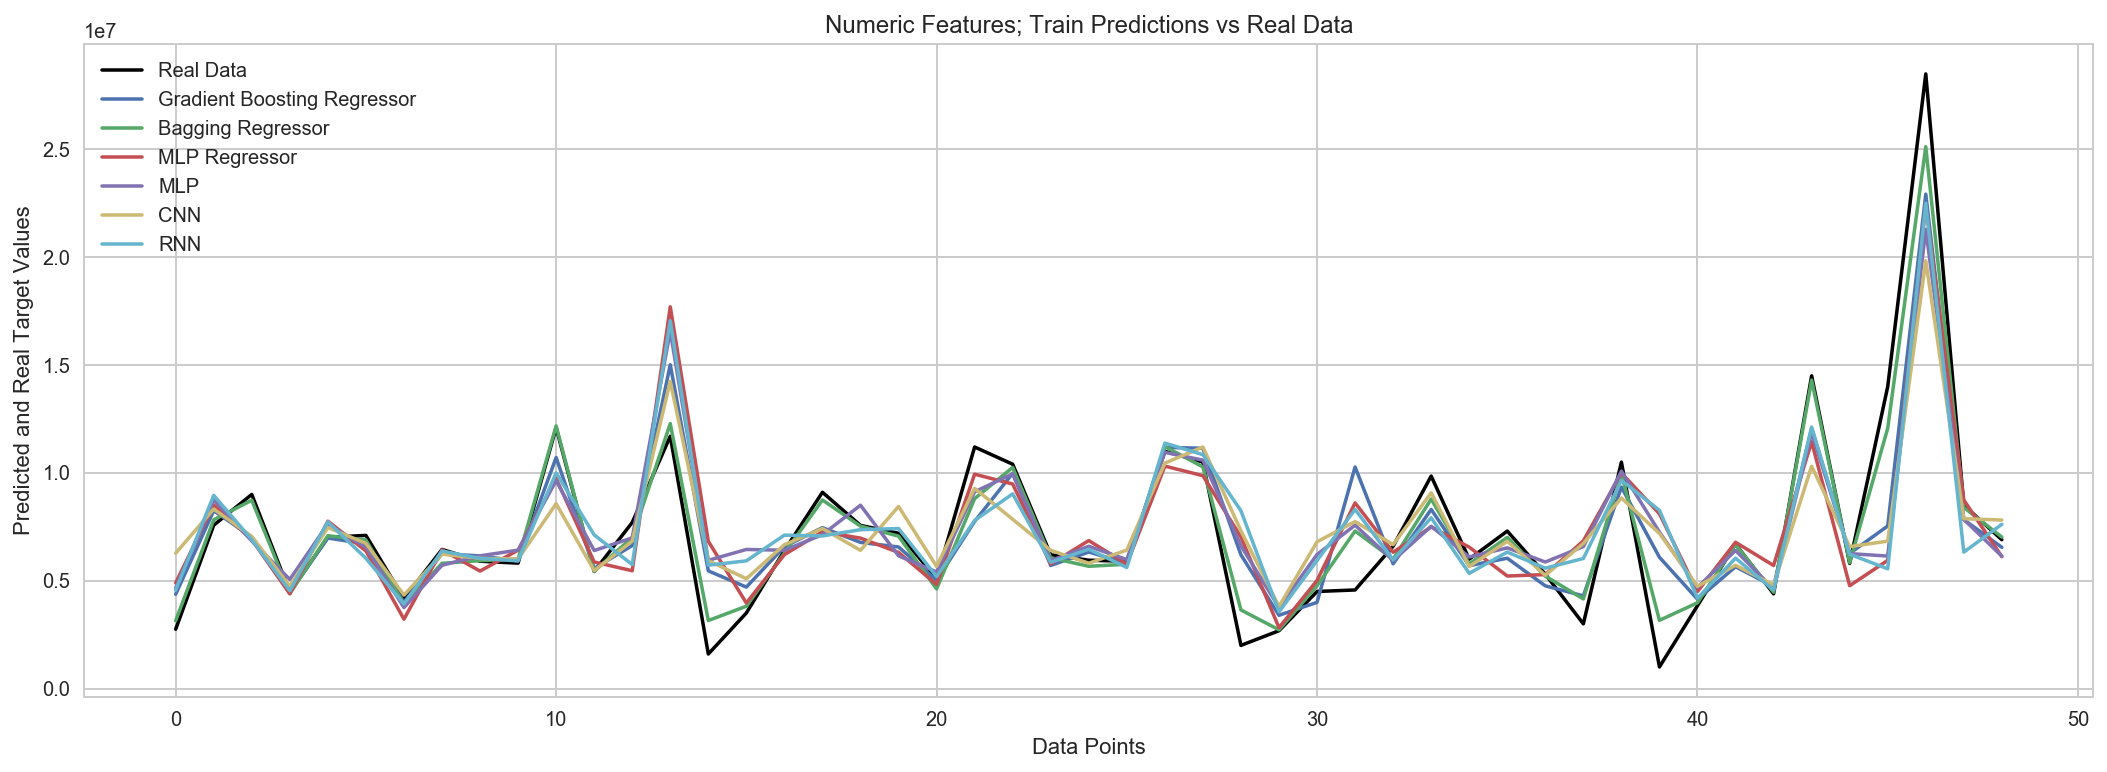

In [121]:
hide_code
# Plot predictions and real target values
plt.figure(figsize = (18, 6))
plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_br[1:50], label='Bagging Regressor')
plt.plot(target_train_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_mlp[1:50], label='MLP')
plt.plot(target_train_cnn[1:50], label='CNN')
plt.plot(target_train_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric Features; Train Predictions vs Real Data");

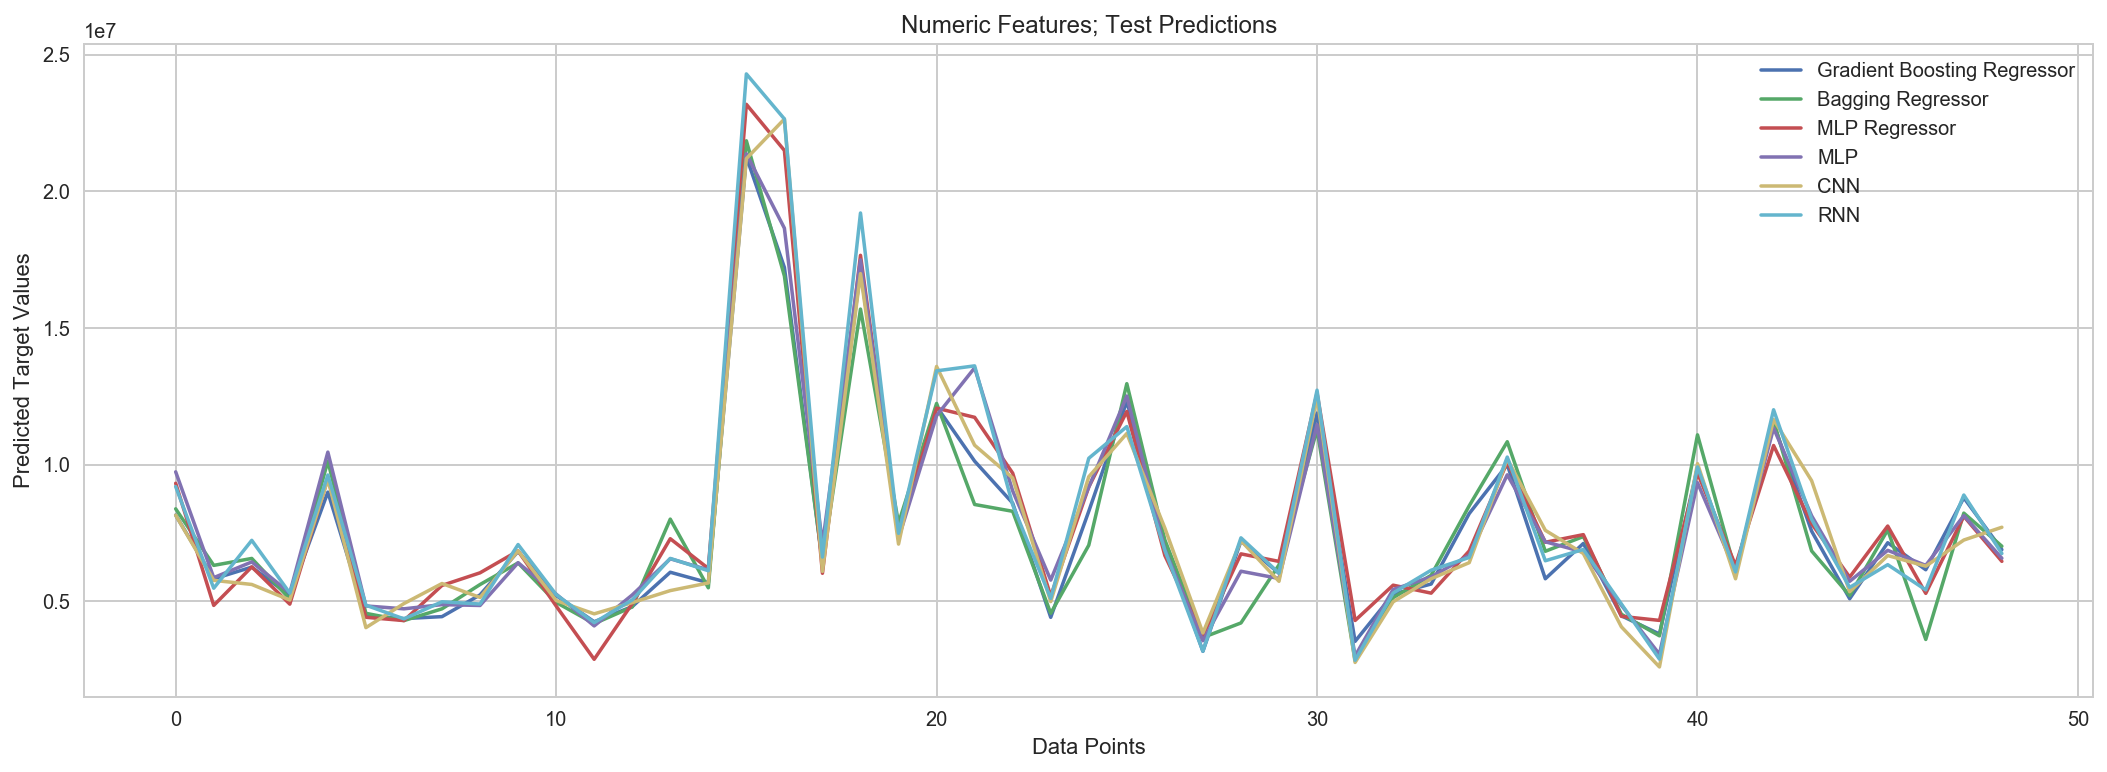

In [122]:
hide_code
# Plot test predictions 
plt.figure(figsize = (18, 6))

plt.plot(target_test_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_br[1:50], label='Bagging Regressor')
plt.plot(target_test_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_mlp[1:50], label='MLP')
plt.plot(target_test_cnn[1:50], label='CNN')
plt.plot(target_test_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted Target Values")
plt.legend()
plt.title("Numeric Features; Test Predictions");

In [123]:
hide_code
# Rescale regressor redictions
target_train_cat_gbr = target_scale.inverse_transform(s_target_train_cat_gbr.reshape(-1,1))
target_test_cat_gbr = target_scale.inverse_transform(s_target_test_cat_gbr.reshape(-1,1))
target_train_cat_br = target_scale.inverse_transform(s_target_train_cat_br.reshape(-1,1))
target_test_cat_br = target_scale.inverse_transform(s_target_test_cat_br.reshape(-1,1))
target_train_cat_mlpr = target_scale.inverse_transform(s_target_train_cat_mlpr.reshape(-1,1))
target_test_cat_mlpr = target_scale.inverse_transform(s_target_test_cat_mlpr.reshape(-1,1))
# Rescale neural network predictions
target_train_cat_mlp = target_scale.inverse_transform(s_target_train_cat_mlp.reshape(-1,1))
target_test_cat_mlp = target_scale.inverse_transform(s_target_test_cat_mlp.reshape(-1,1))
target_train_cat_cnn = target_scale.inverse_transform(s_target_train_cat_cnn.reshape(-1,1))
target_test_cat_cnn = target_scale.inverse_transform(s_target_test_cat_cnn.reshape(-1,1))
target_train_cat_rnn = target_scale.inverse_transform(s_target_train_cat_rnn.reshape(-1,1))
target_test_cat_rnn = target_scale.inverse_transform(s_target_test_cat_rnn.reshape(-1,1))

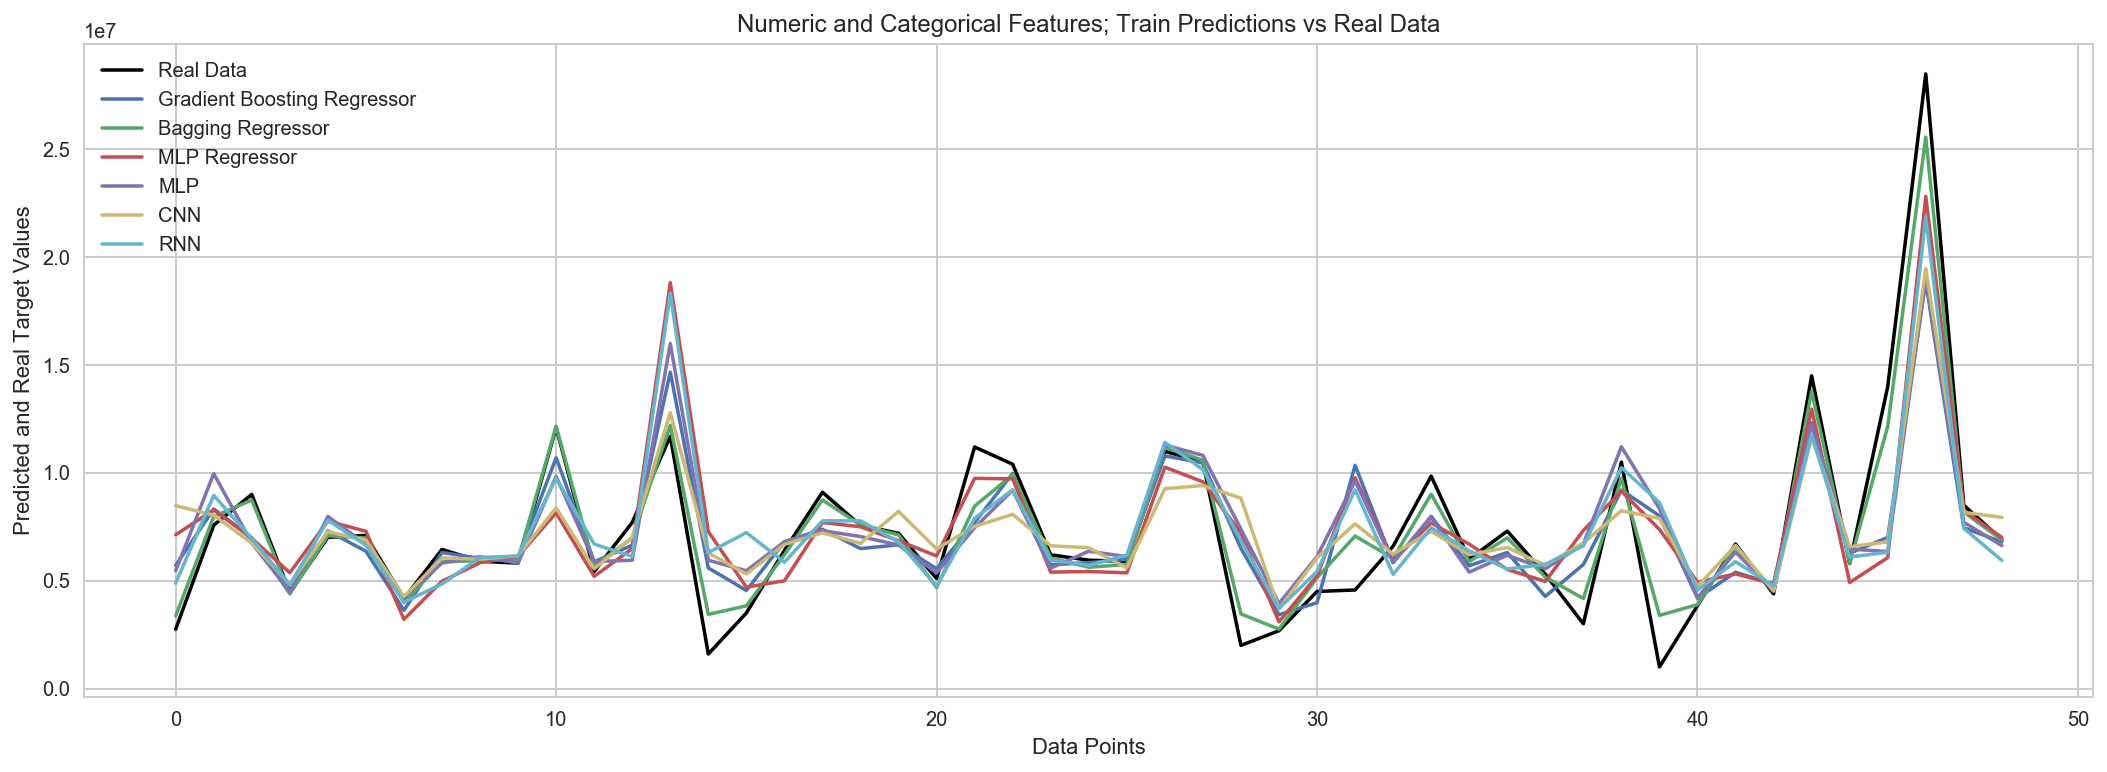

In [124]:
hide_code
# Plot predictions and real target values
plt.figure(figsize = (18, 6))
plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_cat_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_cat_br[1:50], label='Bagging Regressor')
plt.plot(target_train_cat_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_cat_mlp[1:50], label='MLP')
plt.plot(target_train_cat_cnn[1:50], label='CNN')
plt.plot(target_train_cat_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric and Categorical Features; Train Predictions vs Real Data");

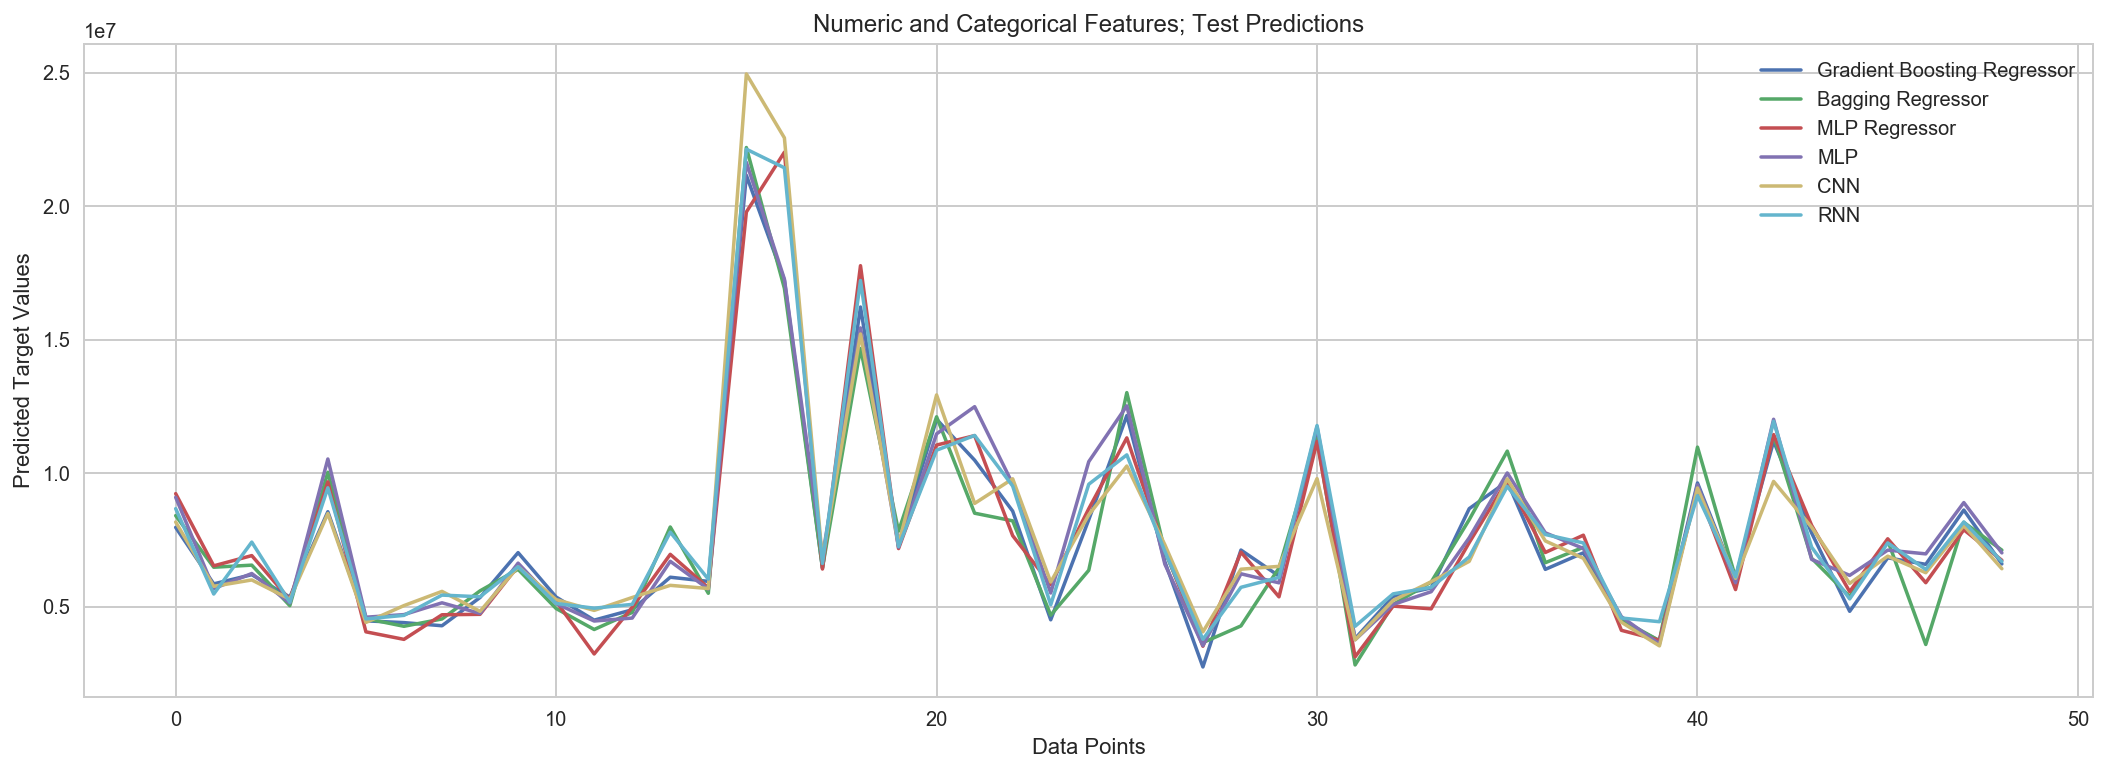

In [125]:
hide_code
# Plot test predictions
plt.figure(figsize = (18, 6))

plt.plot(target_test_cat_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_cat_br[1:50], label='Bagging Regressor')
plt.plot(target_test_cat_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_cat_mlp[1:50], label='MLP')
plt.plot(target_test_cat_cnn[1:50], label='CNN')
plt.plot(target_test_cat_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted Target Values")
plt.legend()
plt.title("Numeric and Categorical Features; Test Predictions");

In [126]:
hide_code
# Rescale regressor predictions
target_train_cat_enc_gbr = target_scale.inverse_transform(s_target_train_cat_enc_gbr.reshape(-1,1))
target_test_cat_enc_gbr = target_scale.inverse_transform(s_target_test_cat_enc_gbr.reshape(-1,1))
target_train_cat_enc_br = target_scale.inverse_transform(s_target_train_cat_enc_br.reshape(-1,1))
target_test_cat_enc_br = target_scale.inverse_transform(s_target_test_cat_enc_br.reshape(-1,1))
target_train_cat_enc_mlpr = target_scale.inverse_transform(s_target_train_cat_enc_mlpr.reshape(-1,1))
target_test_cat_enc_mlpr = target_scale.inverse_transform(s_target_test_cat_enc_mlpr.reshape(-1,1))
# Rescale neural network preditions
target_train_cat_enc_mlp = target_scale.inverse_transform(s_target_train_cat_enc_mlp.reshape(-1,1))
target_test_cat_enc_mlp = target_scale.inverse_transform(s_target_test_cat_enc_mlp.reshape(-1,1))
target_train_cat_enc_cnn = target_scale.inverse_transform(s_target_train_cat_enc_cnn.reshape(-1,1))
target_test_cat_enc_cnn = target_scale.inverse_transform(s_target_test_cat_enc_cnn.reshape(-1,1))
target_train_cat_enc_rnn = target_scale.inverse_transform(s_target_train_cat_enc_rnn.reshape(-1,1))
target_test_cat_enc_rnn = target_scale.inverse_transform(s_target_test_cat_enc_rnn.reshape(-1,1))

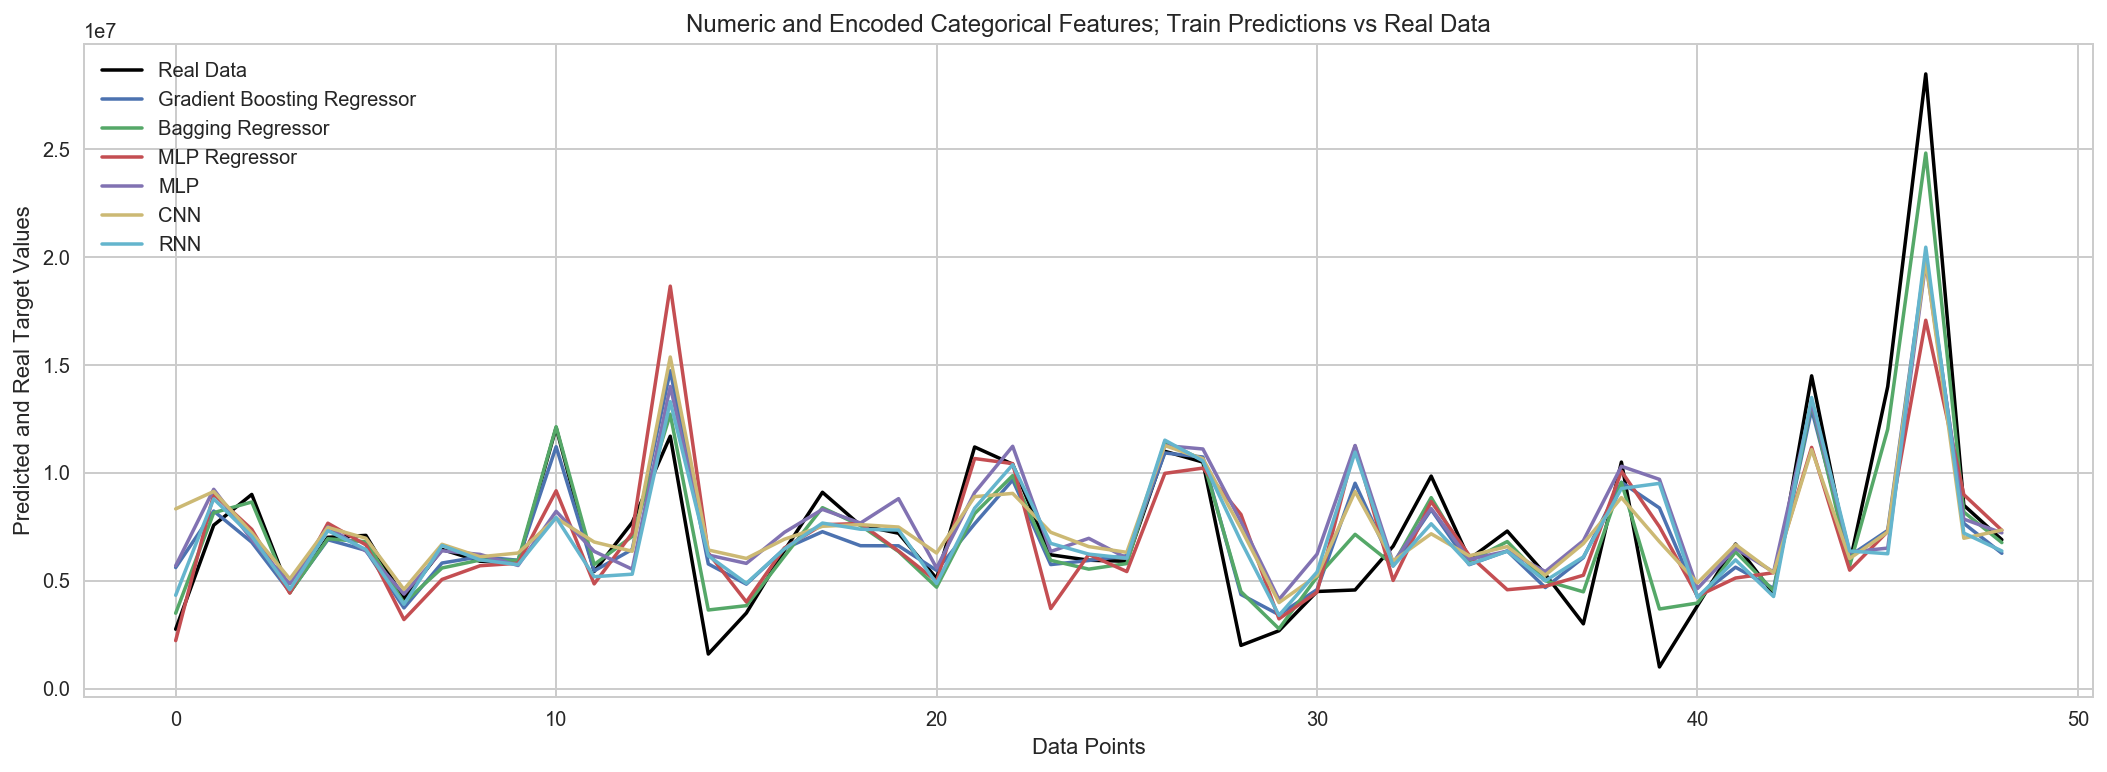

In [127]:
hide_code
# Plot predictions and real target values
plt.figure(figsize = (18, 6))
plt.plot(target_train[1:50], color = 'black', label='Real Data')

plt.plot(target_train_cat_enc_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_train_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(target_train_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.plot(target_train_cat_enc_mlp[1:50], label='MLP')
plt.plot(target_train_cat_enc_cnn[1:50], label='CNN')
plt.plot(target_train_cat_enc_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted and Real Target Values")
plt.legend()
plt.title("Numeric and Encoded Categorical Features; Train Predictions vs Real Data");

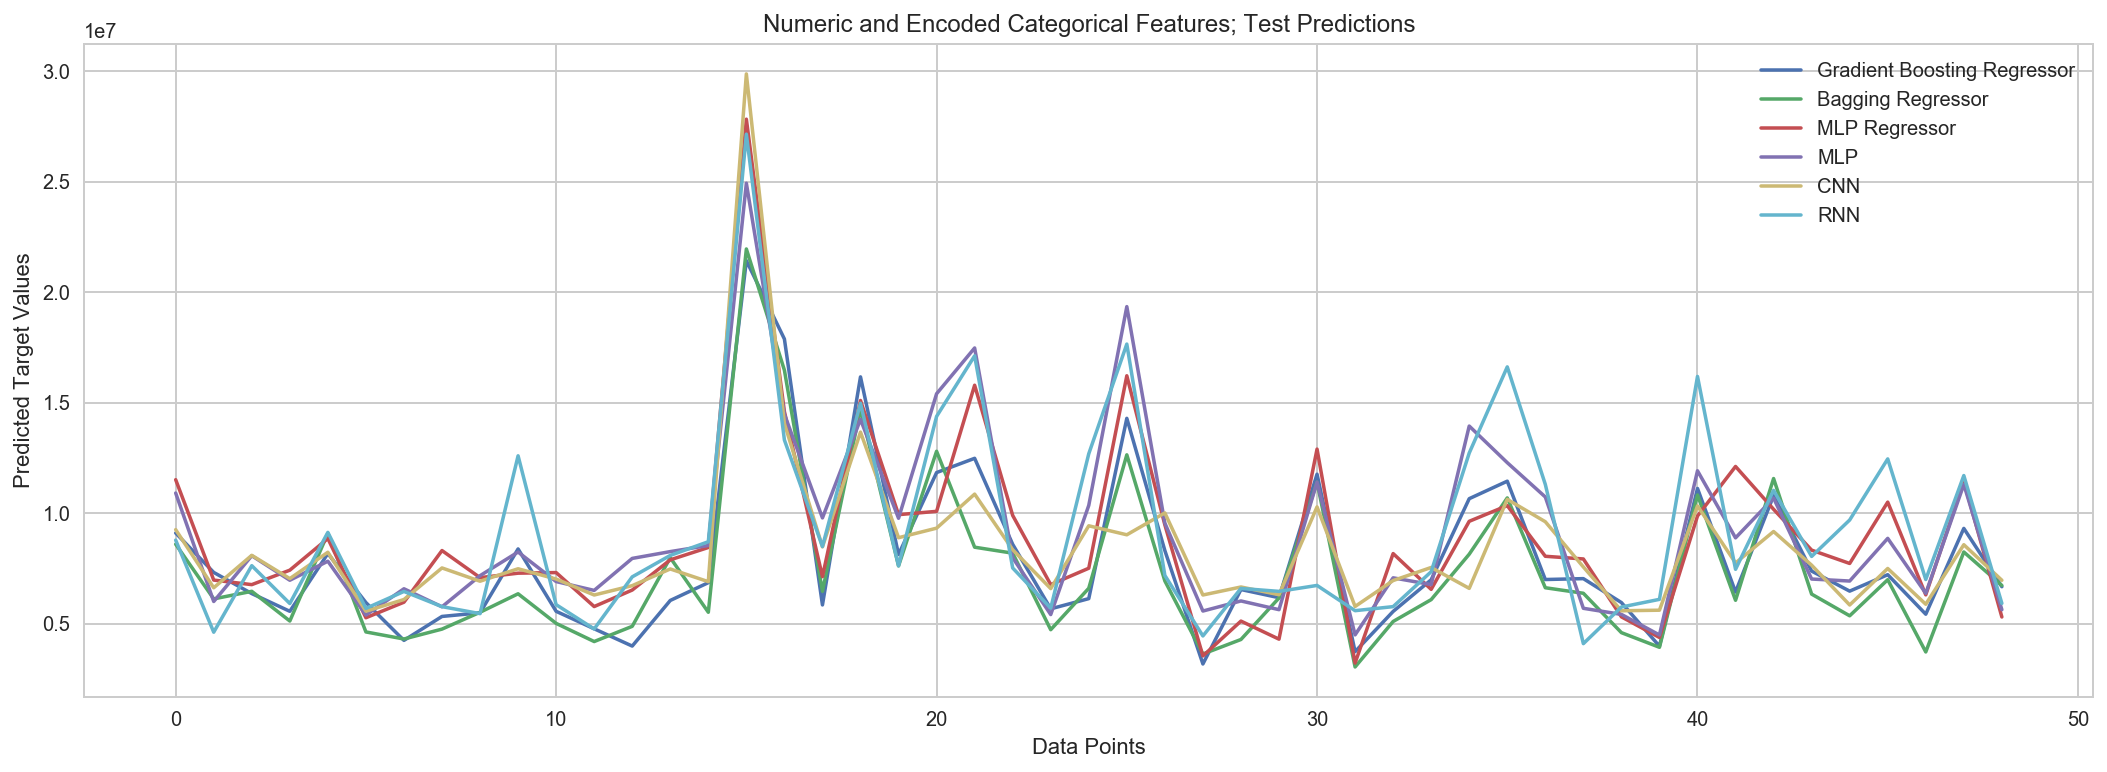

In [128]:
hide_code
# Plot test predictions
plt.figure(figsize = (18, 6))

plt.plot(target_test_cat_enc_gbr[1:50], label='Gradient Boosting Regressor')
plt.plot(target_test_cat_enc_br[1:50], label='Bagging Regressor')
plt.plot(target_test_cat_enc_mlpr[1:50], label='MLP Regressor')

plt.plot(target_test_cat_enc_mlp[1:50], label='MLP')
plt.plot(target_test_cat_enc_cnn[1:50], label='CNN')
plt.plot(target_test_cat_enc_rnn[1:50], label='RNN')

plt.xlabel("Data Points")
plt.ylabel("Predicted Target Values")
plt.legend()
plt.title("Numeric and Encoded Categorical Features; Test Predictions");

## Project Design

The project was built on the basis of the competition offered on the site https://www.kaggle.com.

The competition version of this notebook is avalible here: https://www.kaggle.com/olgabelitskaya/sberbank-russian-housing-market .

There are several popular resources (numpy, pandas, matplotlib, scikit-learn and keras) for regression models were used.

The most valuable side of this project is the investigation of real data and the attempt to approximate the predictions on them to the threshold of 0.7-0.8 for the coefficient of determination.